# External modules

In [21]:
library(tidyverse)
library("DataExplorer")
library(DescTools)
library(Hmisc)
library("scatterplot3d")
library(plotly)

In [22]:
options(repr.plot.width=19, repr.plot.height=12)

# Data 

In [23]:
path <- ".."

In [24]:
source <- "./04_experimentation_01/final_dataset.csv"

In [25]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [26]:
str(data)

'data.frame':	22846 obs. of  59 variables:
 $ timestamp             : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude    : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity              : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ lateral_error         : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error    : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ haversine_error       : num  0.576 0.572 0.569 0.6 0.579 ...
 $ latitude_error        : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error       : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ heading_error         : num  1.95 1.97 2.15 2.08 2.13 ...
 $ lateral_error_abs     : num  0.

# Summary

In [27]:
introduce(data)

rows  columns discrete_columns continuous_columns all_missing_columns
1 22846 59      0                59                 0                  
  total_missing_values complete_rows total_observations memory_usage
1 0                    22846         1347914            7050104

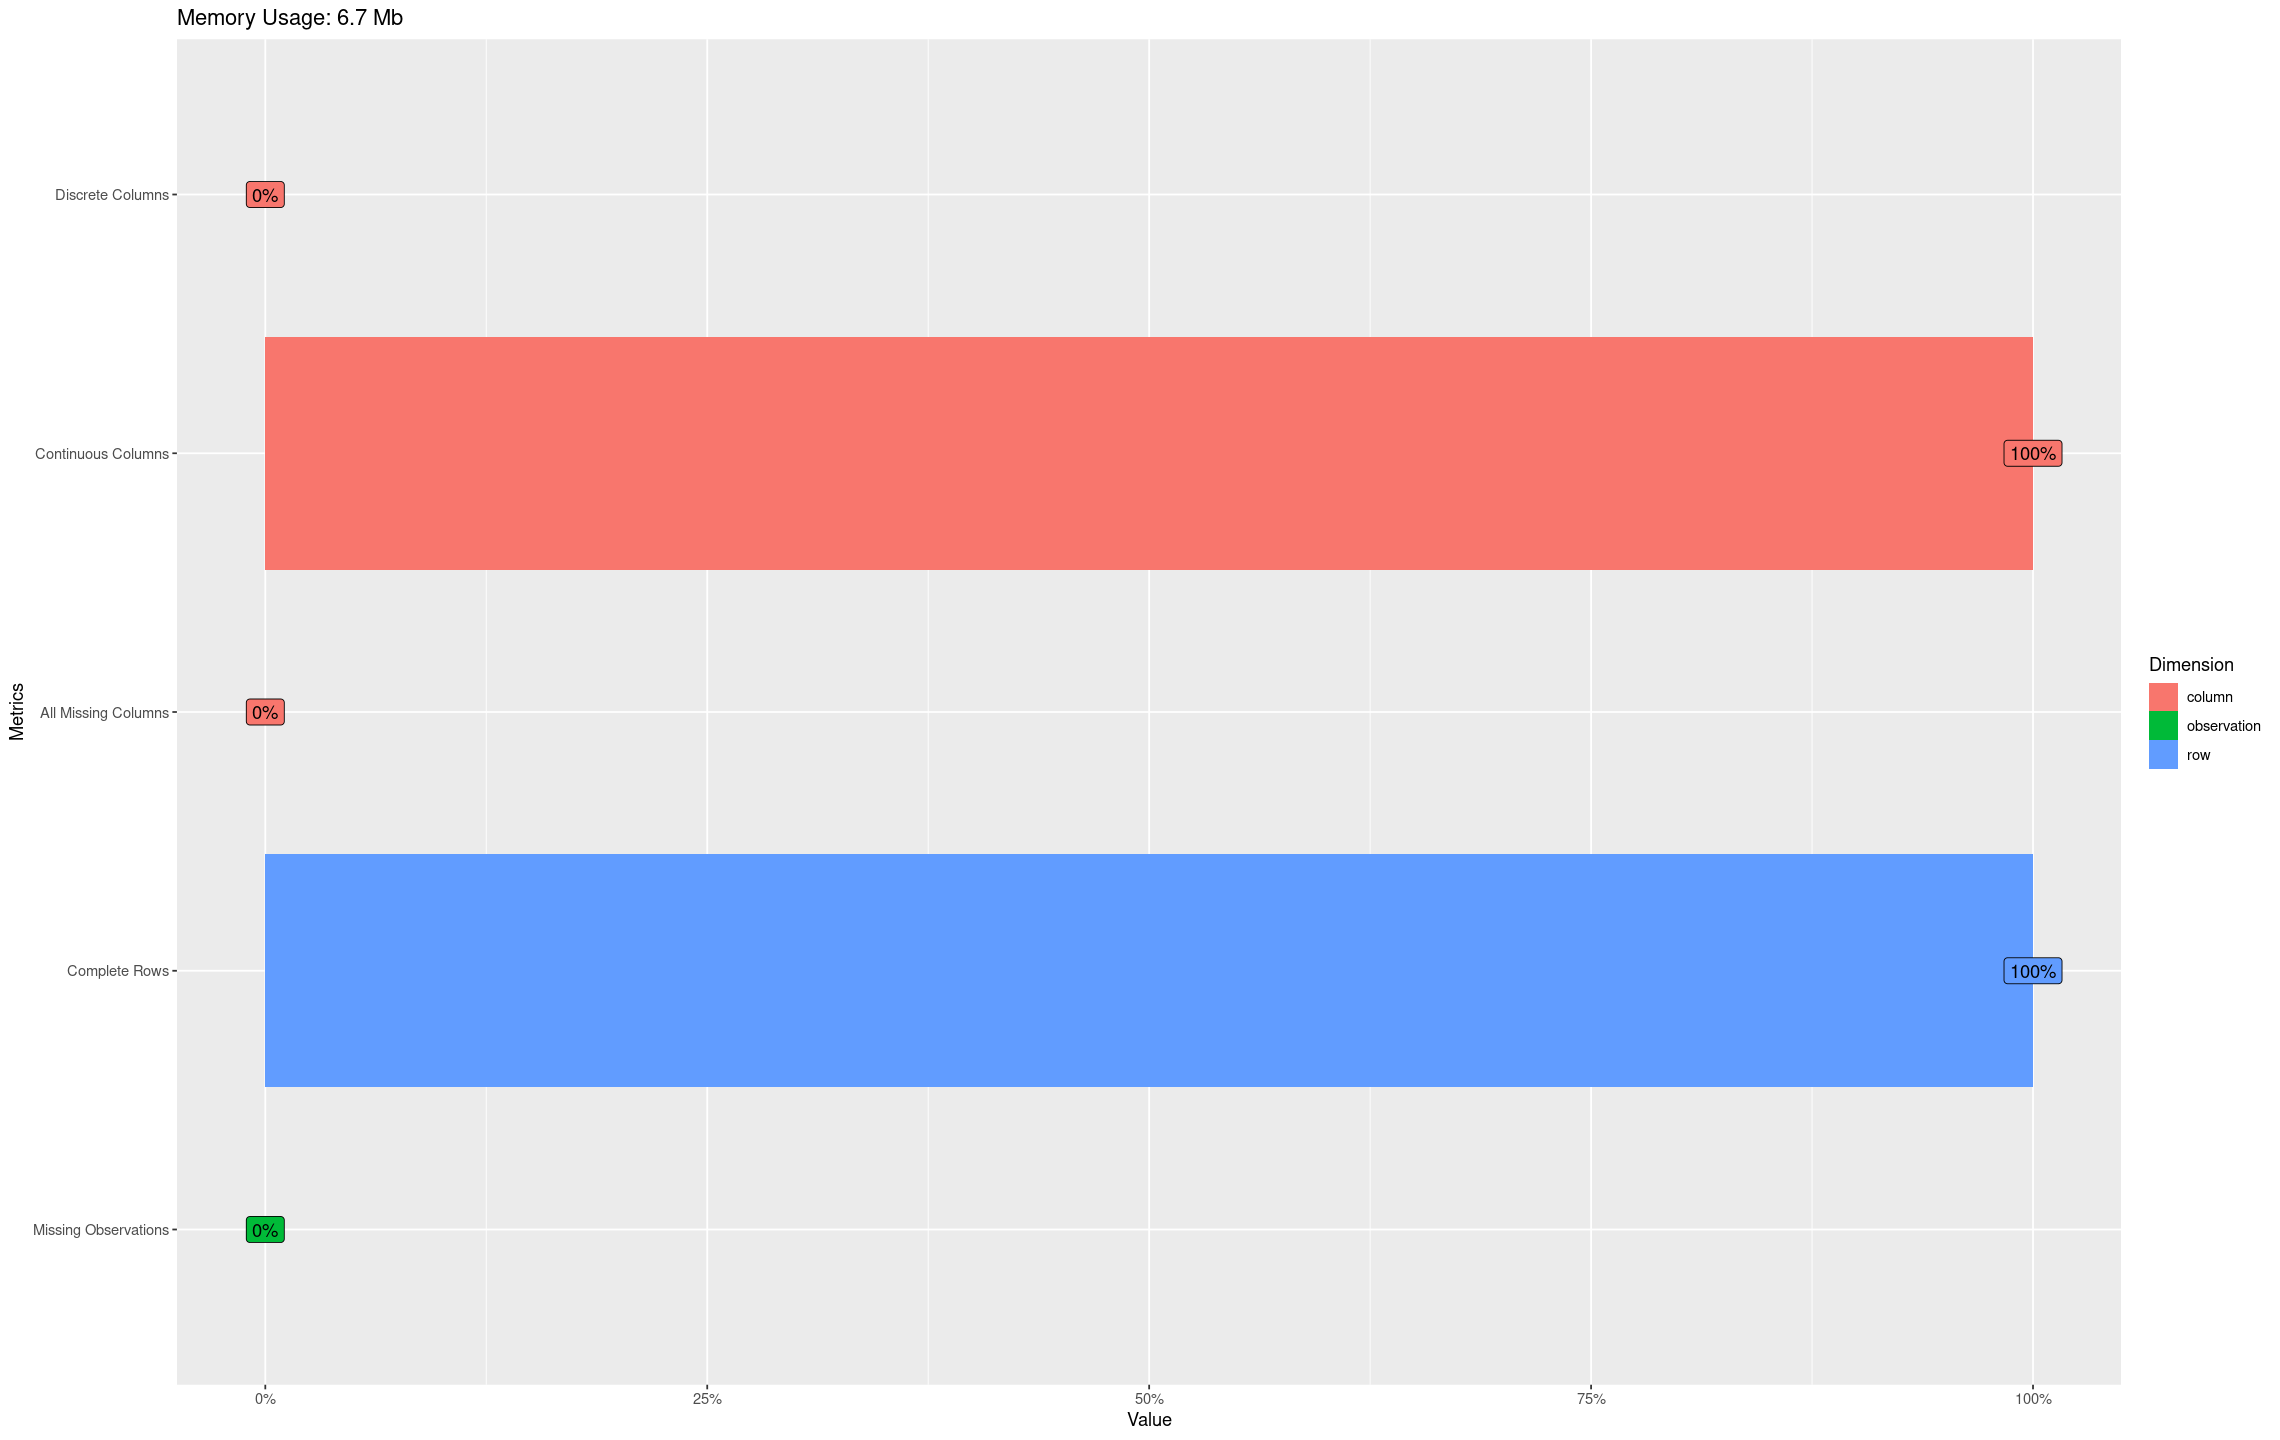

In [28]:
plot_intro(data)

In [29]:
describe(data)

Warning message in min(diff(uxinside)):
“no non-missing arguments to min; returning Inf”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“possible logic error 1 in spikecomp”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“program logic error 2 in spikecomp”
Warning message in xrange[freq != 0] <- xrnz:
“number of items to replace is not a multiple of replacement length”
Warning message in spikecomp(x, method = "grid", lumptails = lumptails, normalize = FALSE, :
“program logic error in spikecomp; lengths: 2 1”


data 

 59  Variables      22846  Observations
--------------------------------------------------------------------------------
timestamp 
        n   missing  distinct      Info      Mean       Gmd       .05       .10 
    22846         0     22846         1 512840146 329819787  66440774 115725964 
      .25       .50       .75       .90       .95 
260740480 517076896 759428846 906179513 953995599 

lowest :  17241310  17274219  17308103  17343083  17374951
highest: 998857661 998890590 998925458 999024250 999058151
--------------------------------------------------------------------------------
latitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22846        0    21896        1    48.77 0.005203    48.77    48.77 
     .25      .50      .75      .90      .95 
   48.77    48.77    48.78    48.78    48.78 

lowest : 48.7642 48.7642 48.7642 48.7642 48.7642
highest: 48.778  48.778  48.778  48.778  48.778 
--------------------------------------------------

# Histogram

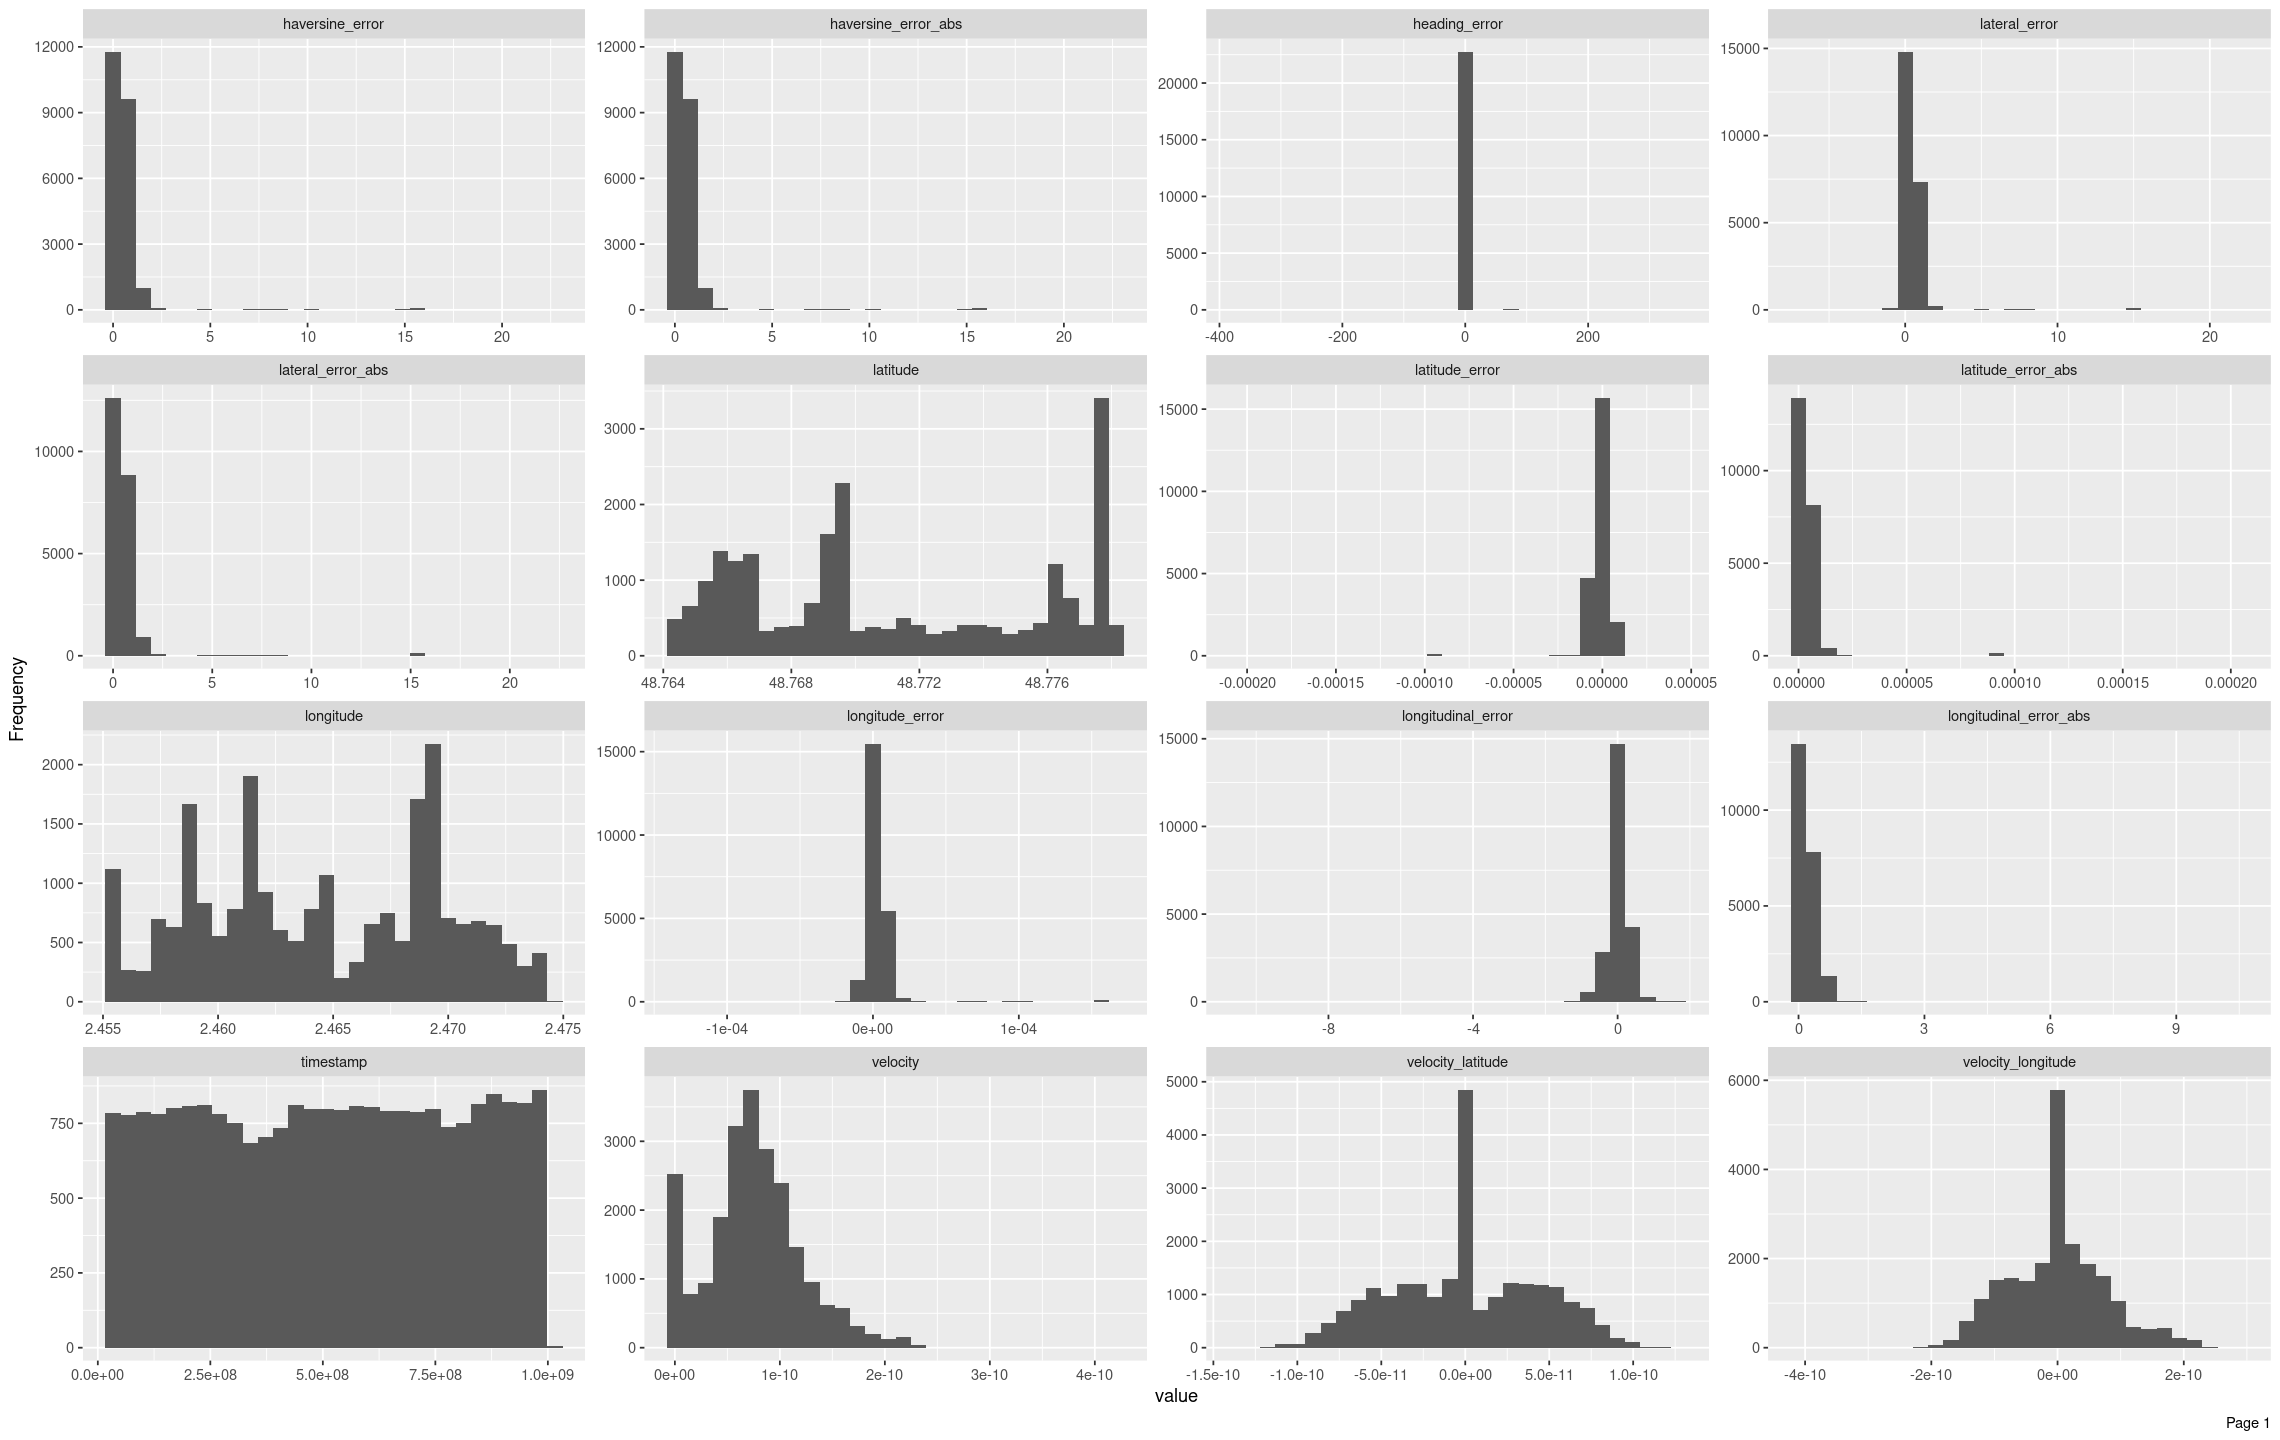

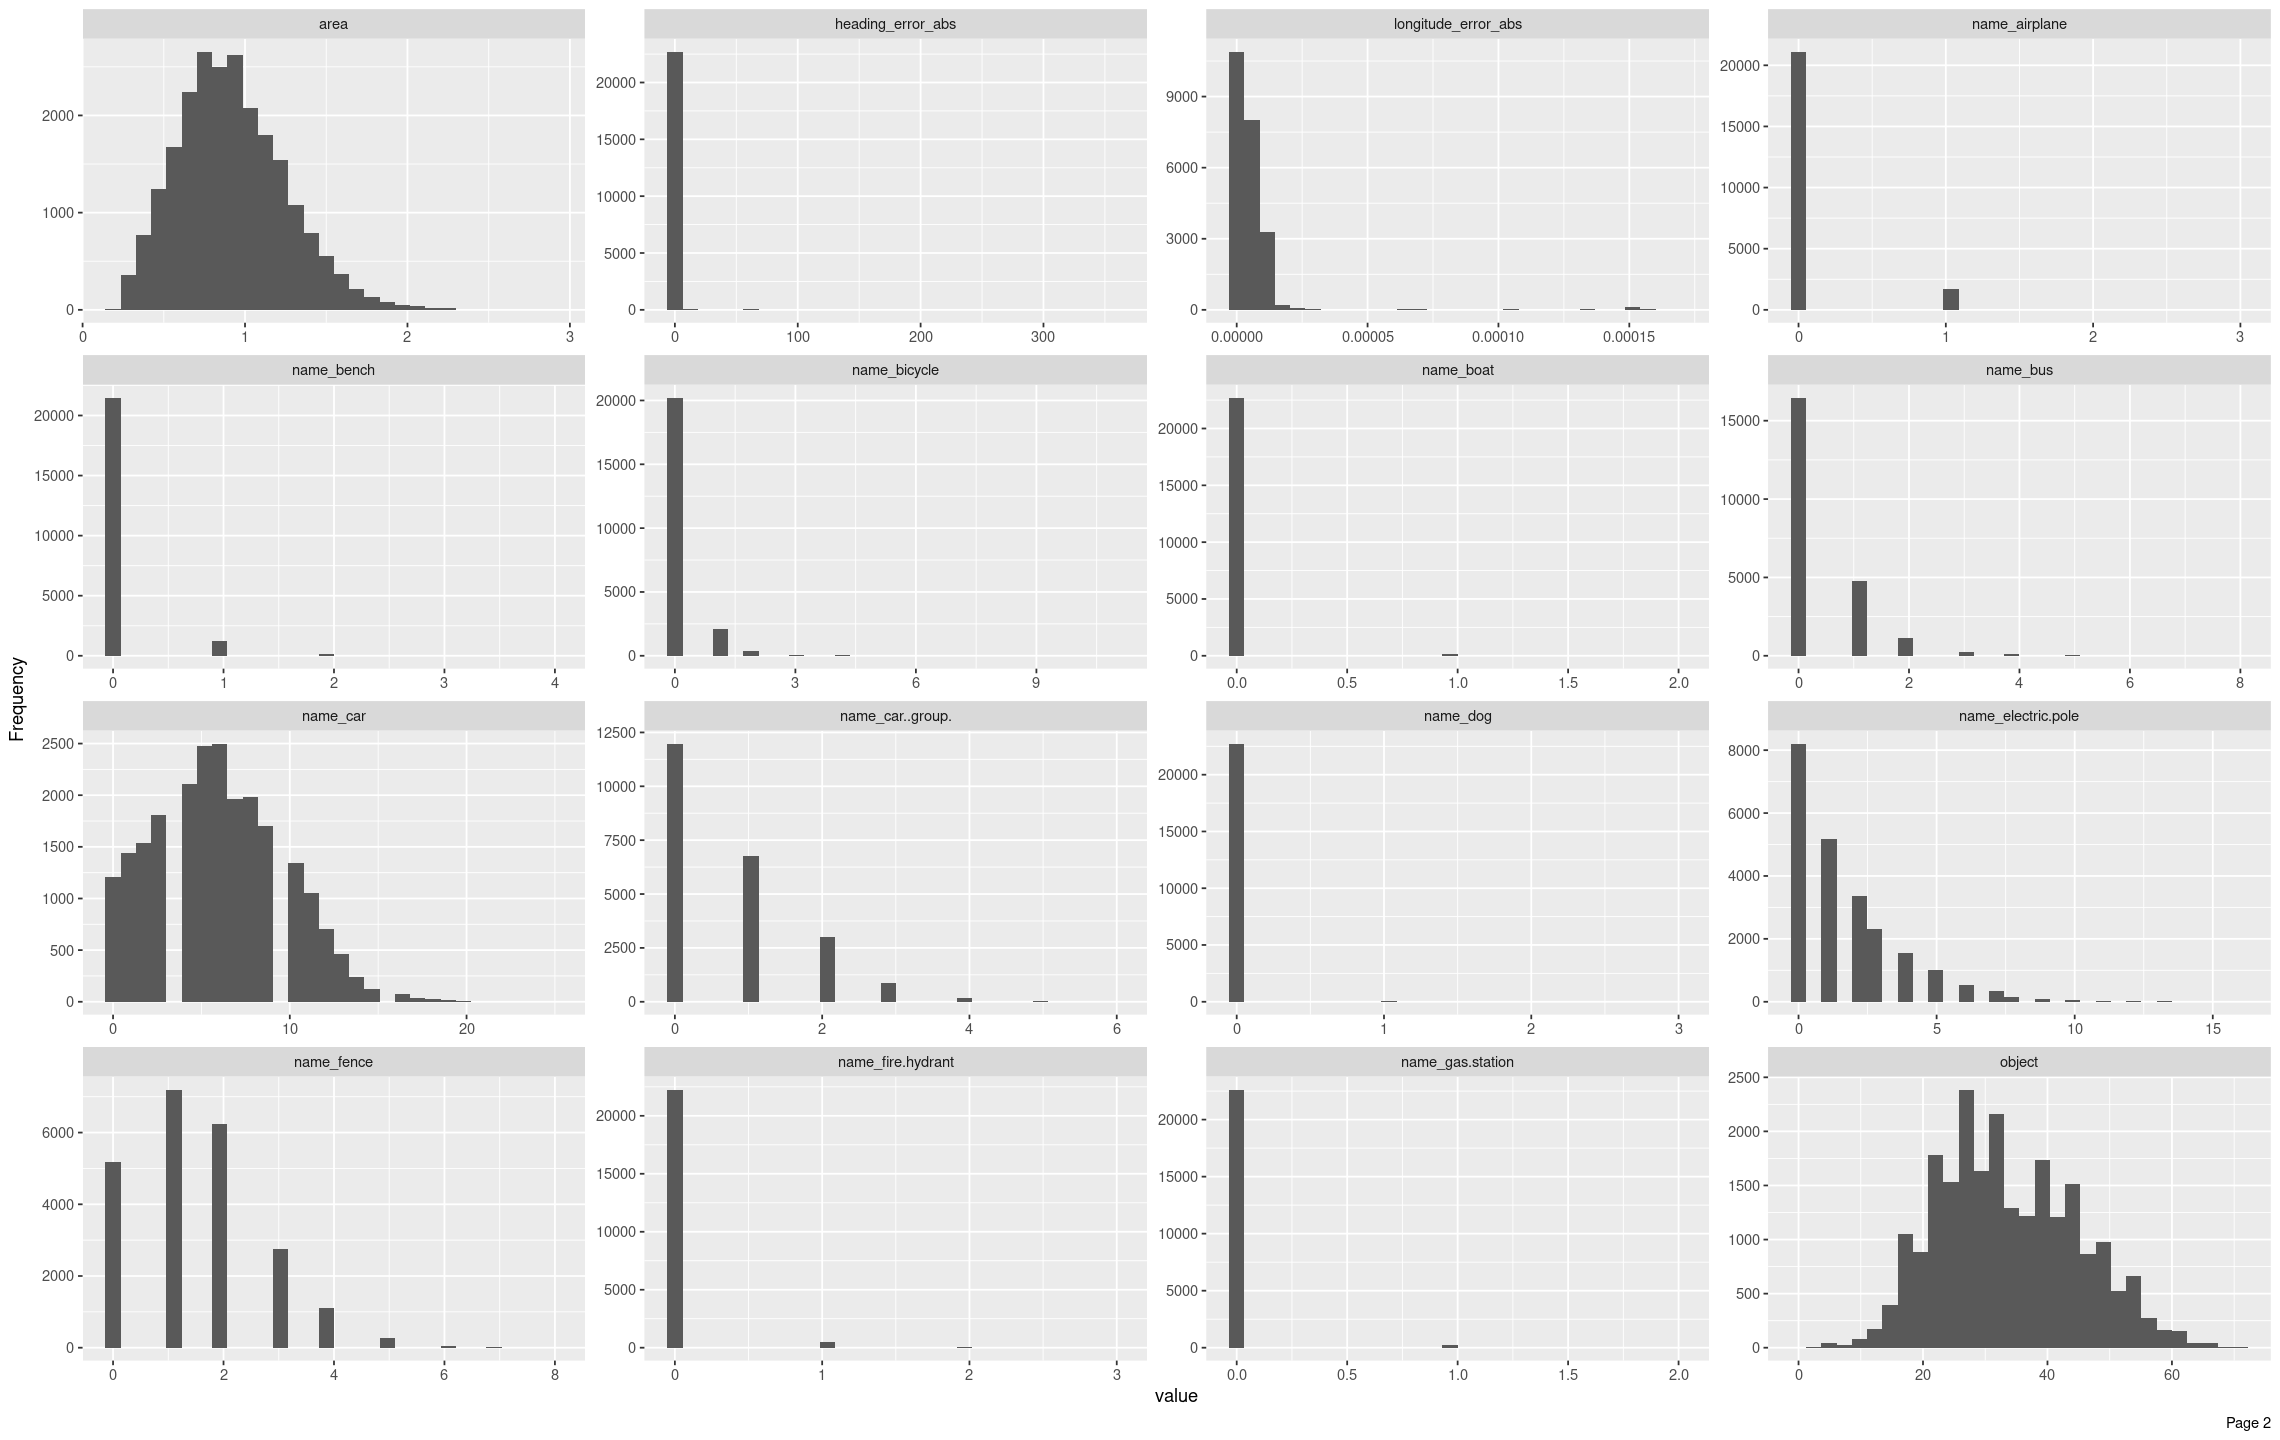

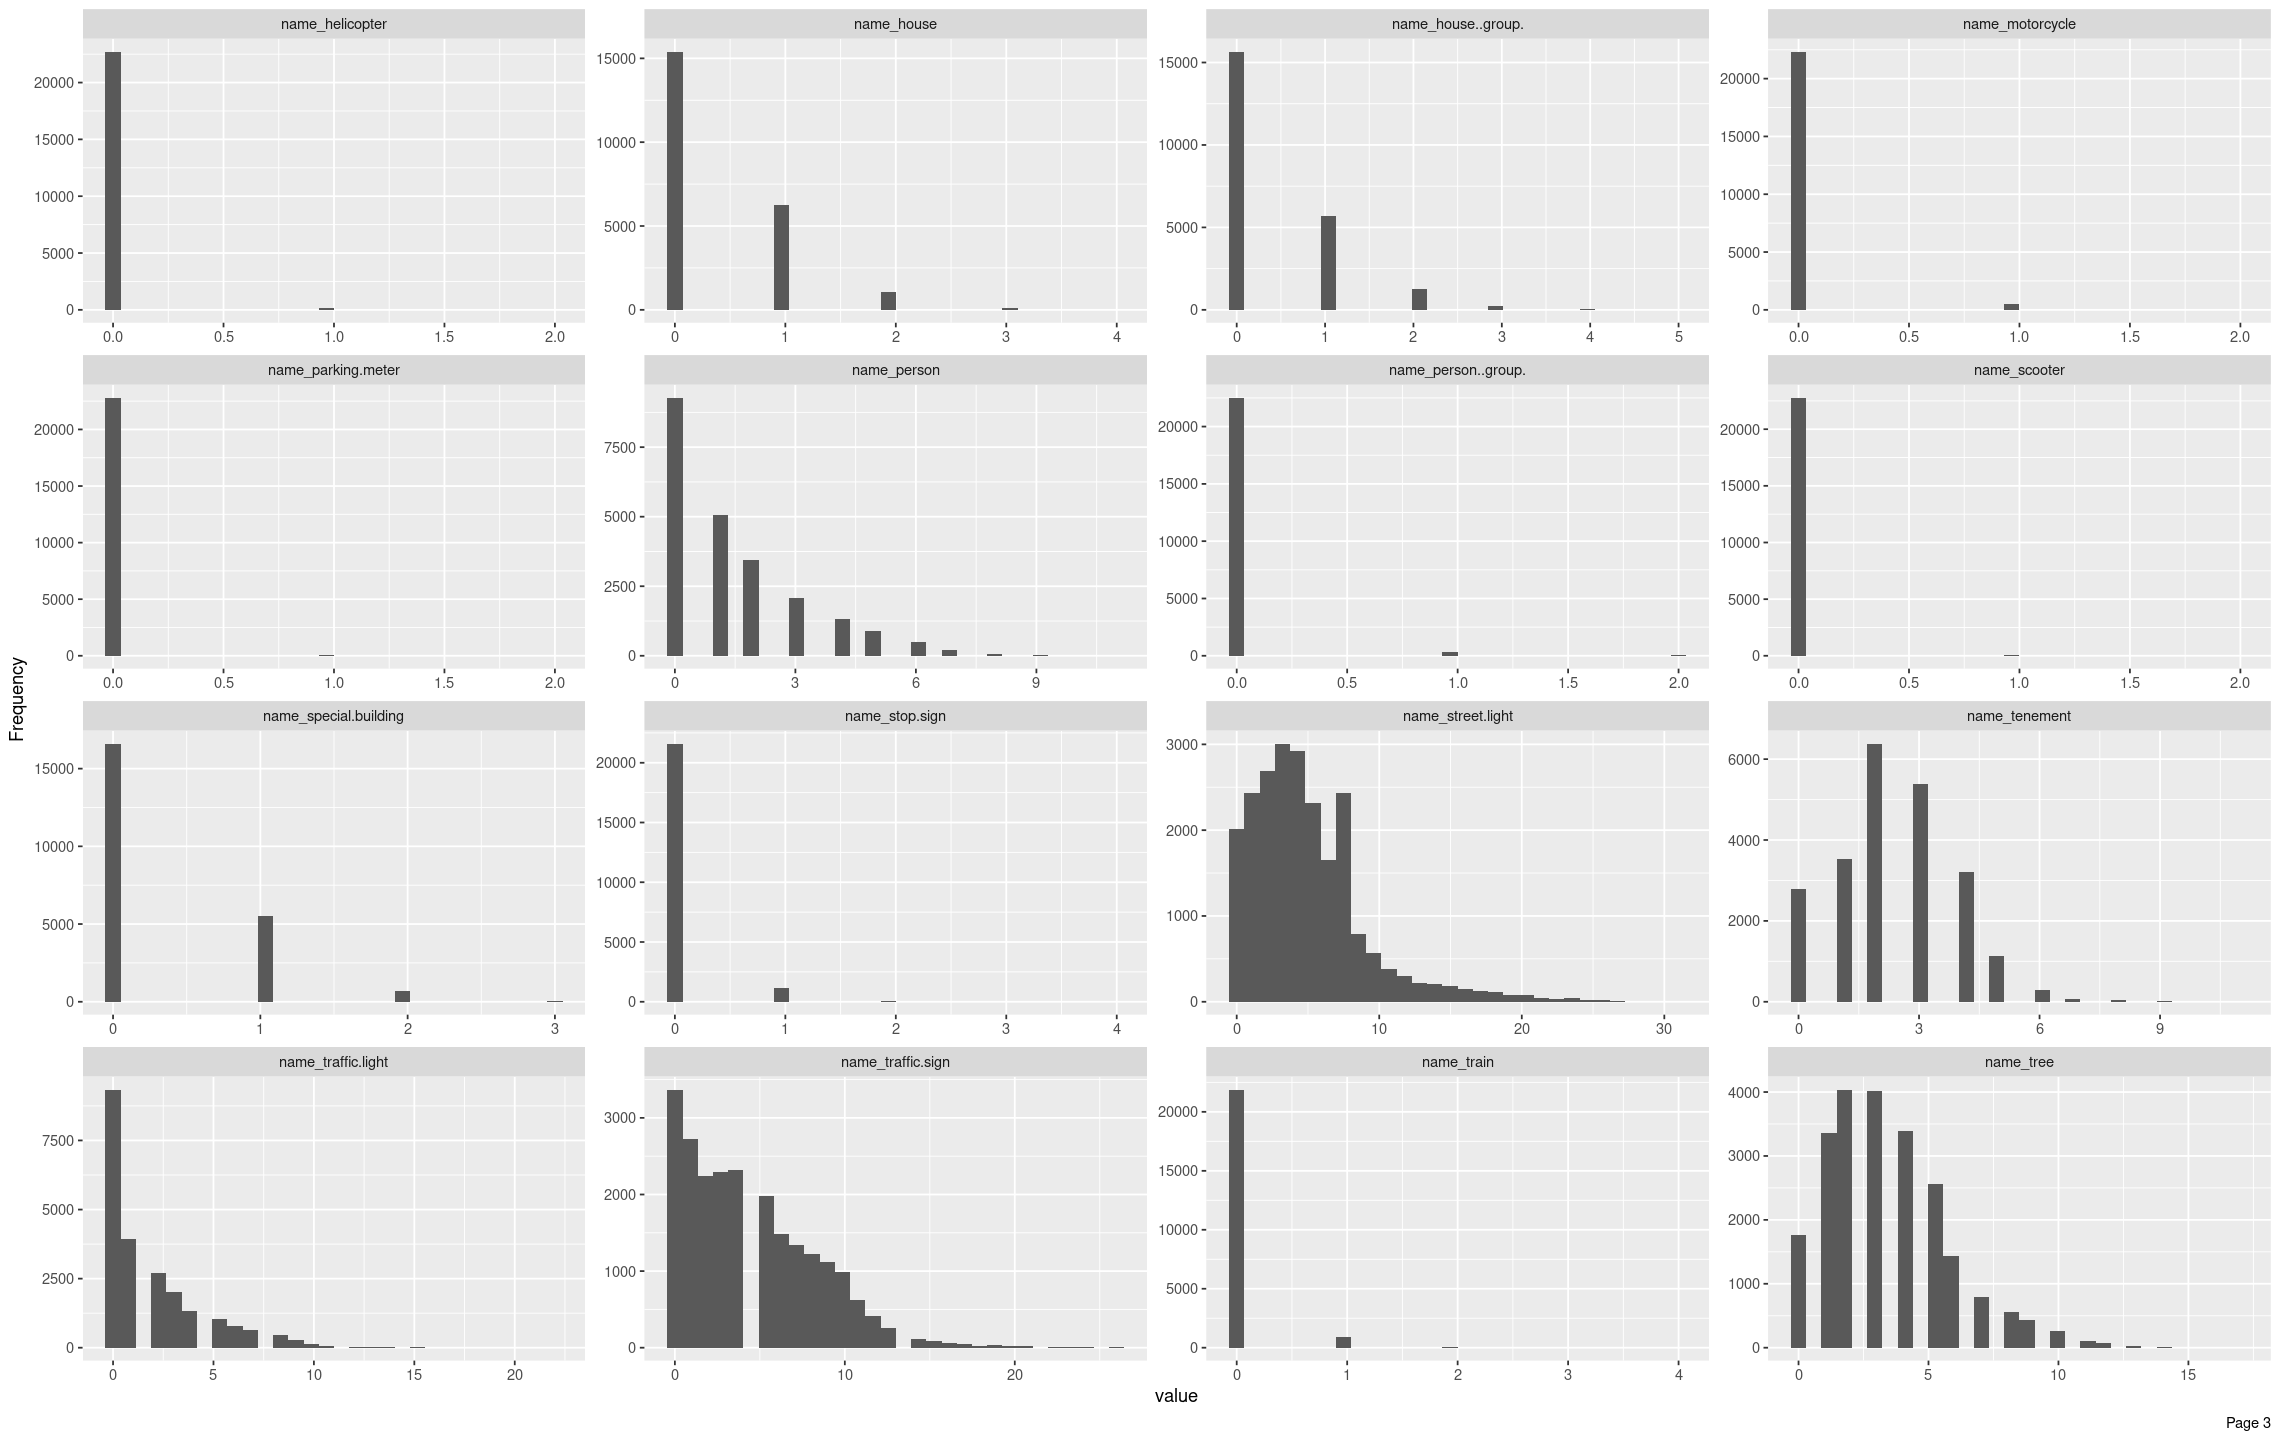

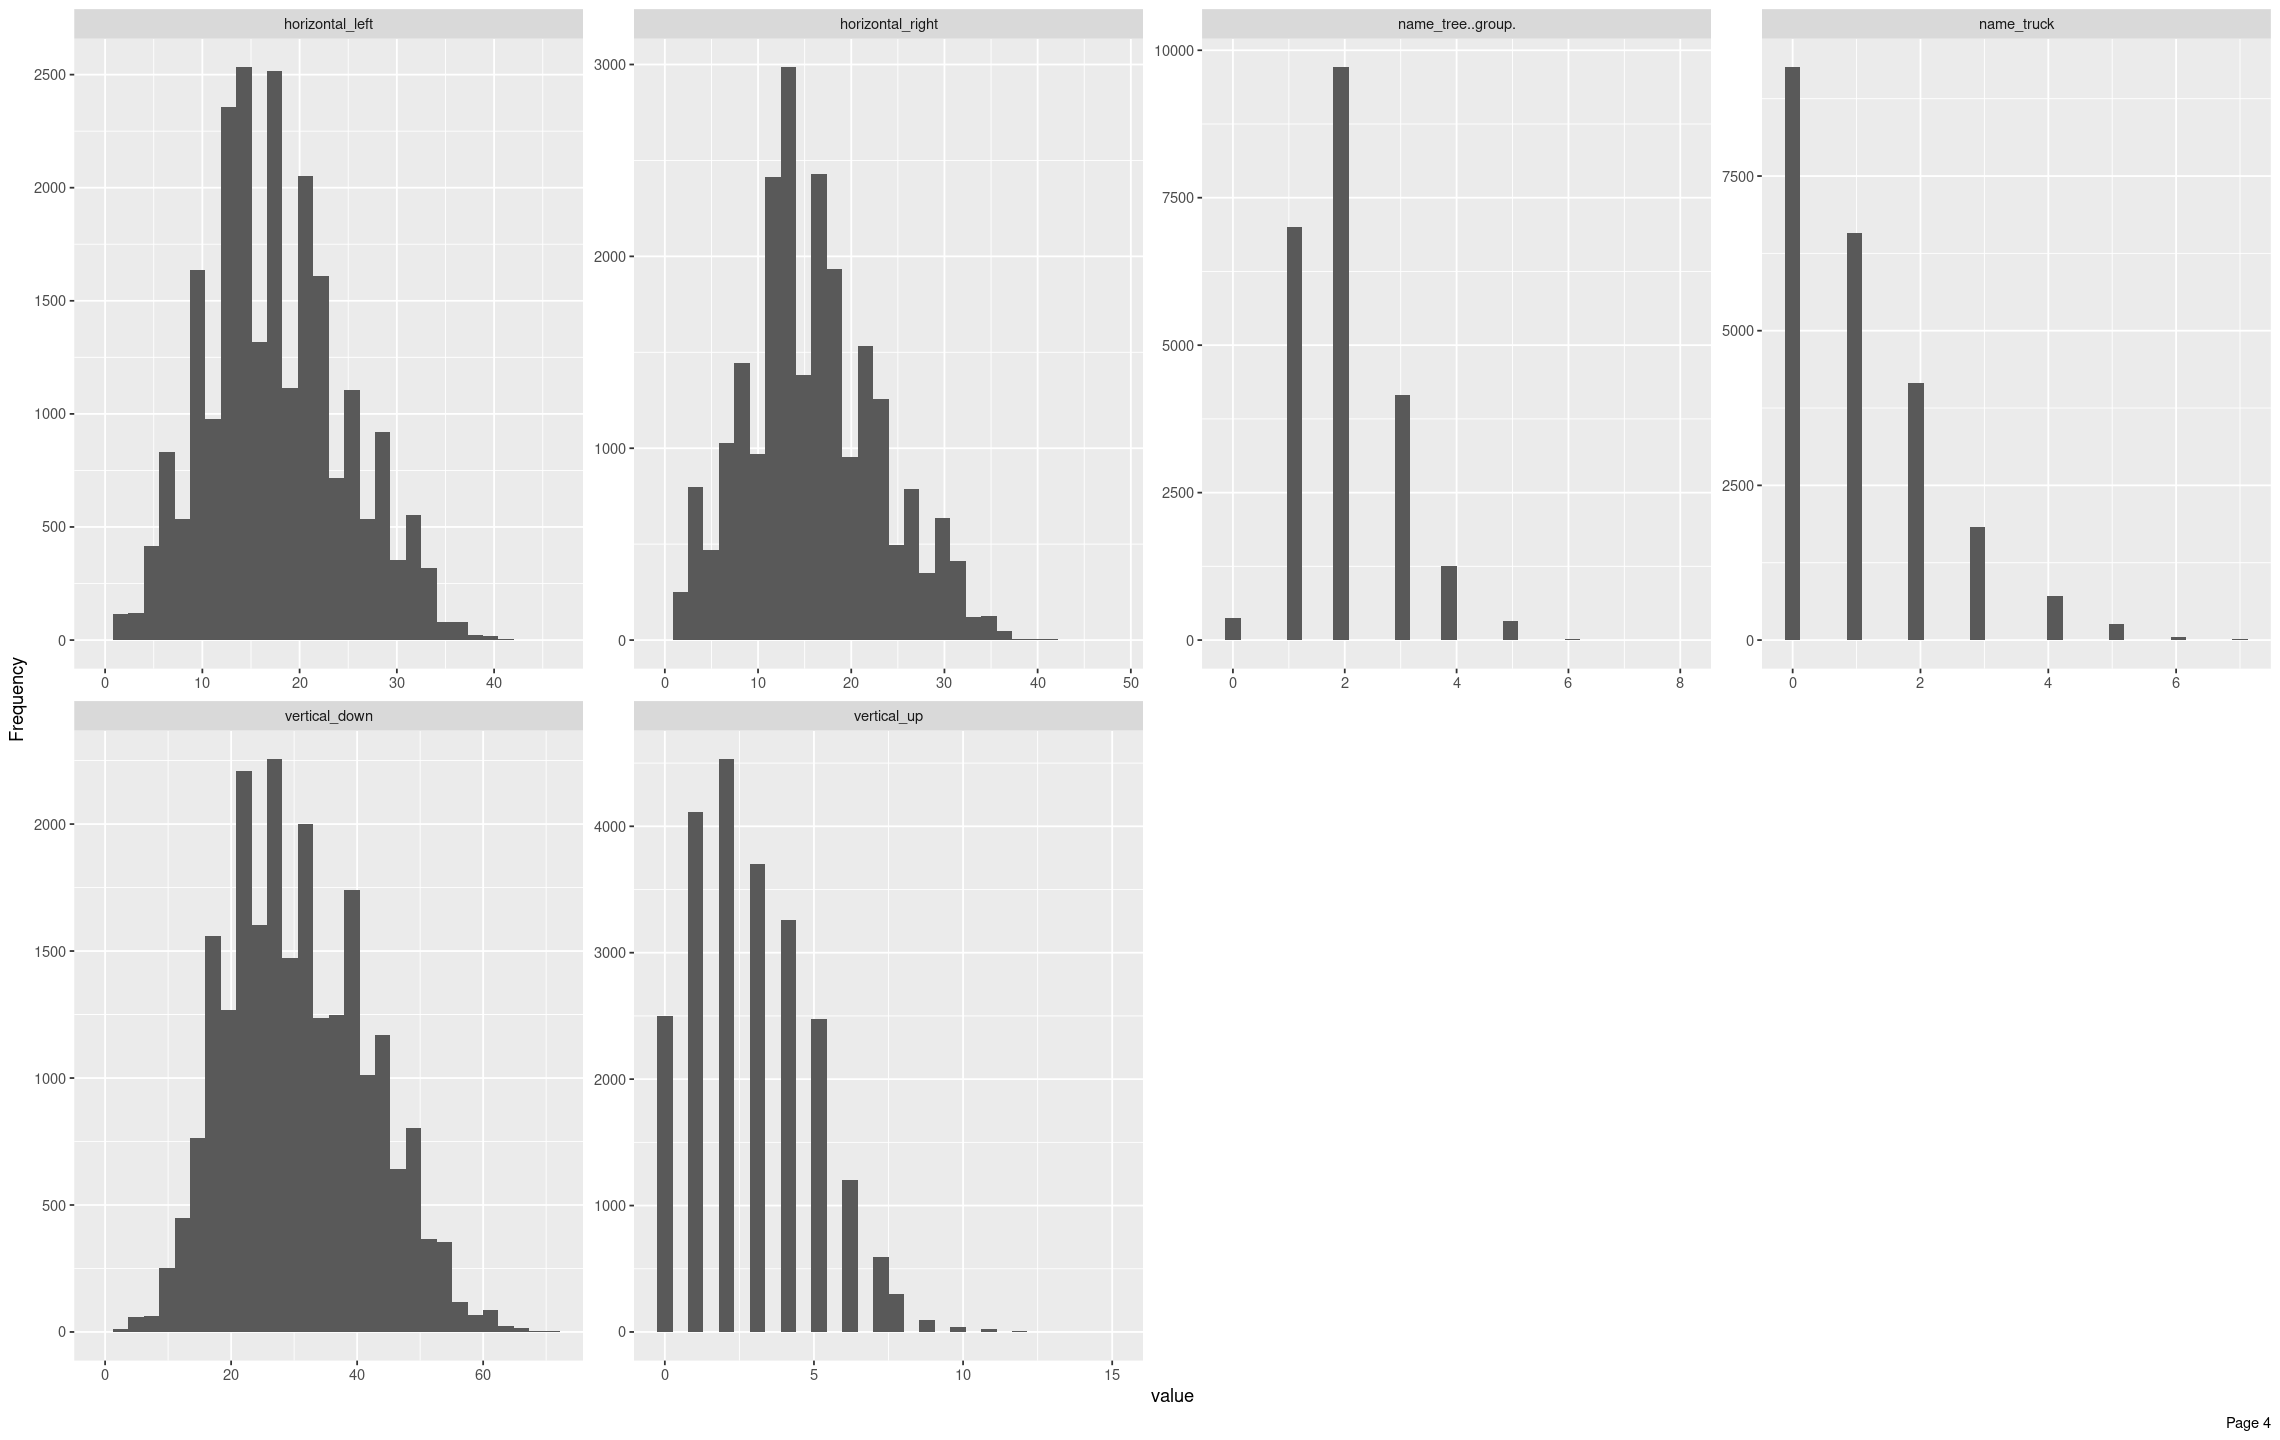

In [30]:
plot_histogram(data)

# Correlation

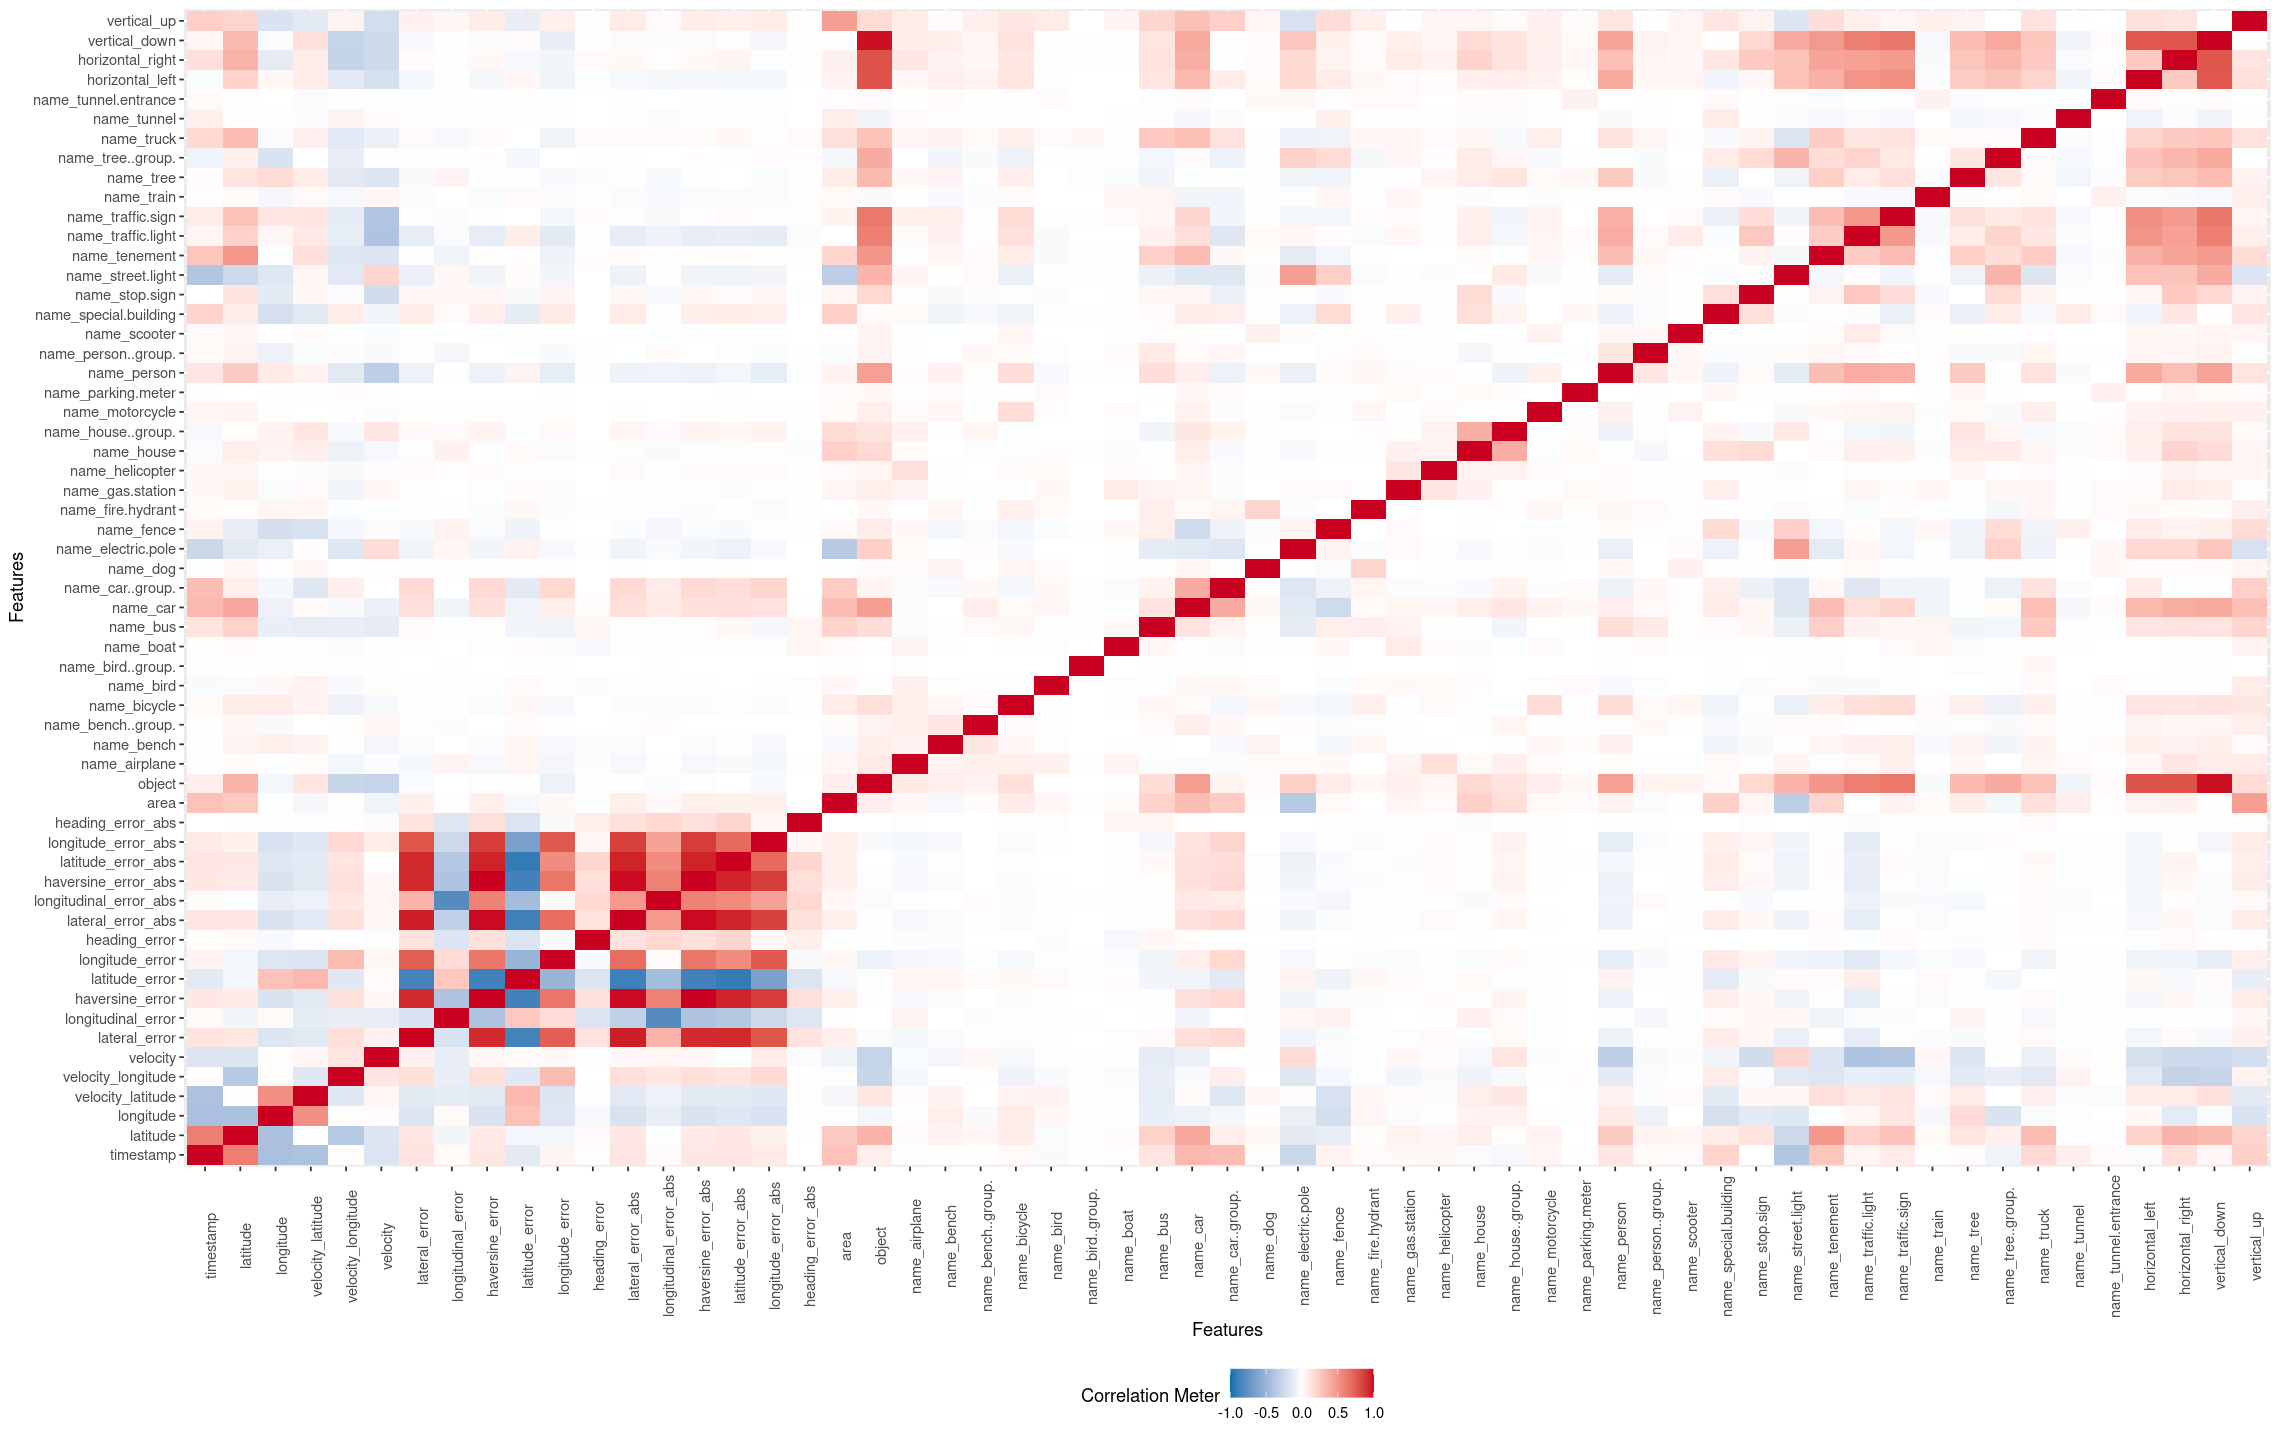

In [31]:
plot_correlation(data, cor_args = list("use" = "pairwise.complete.obs"), type="c")

# Box plot

## lateral_error

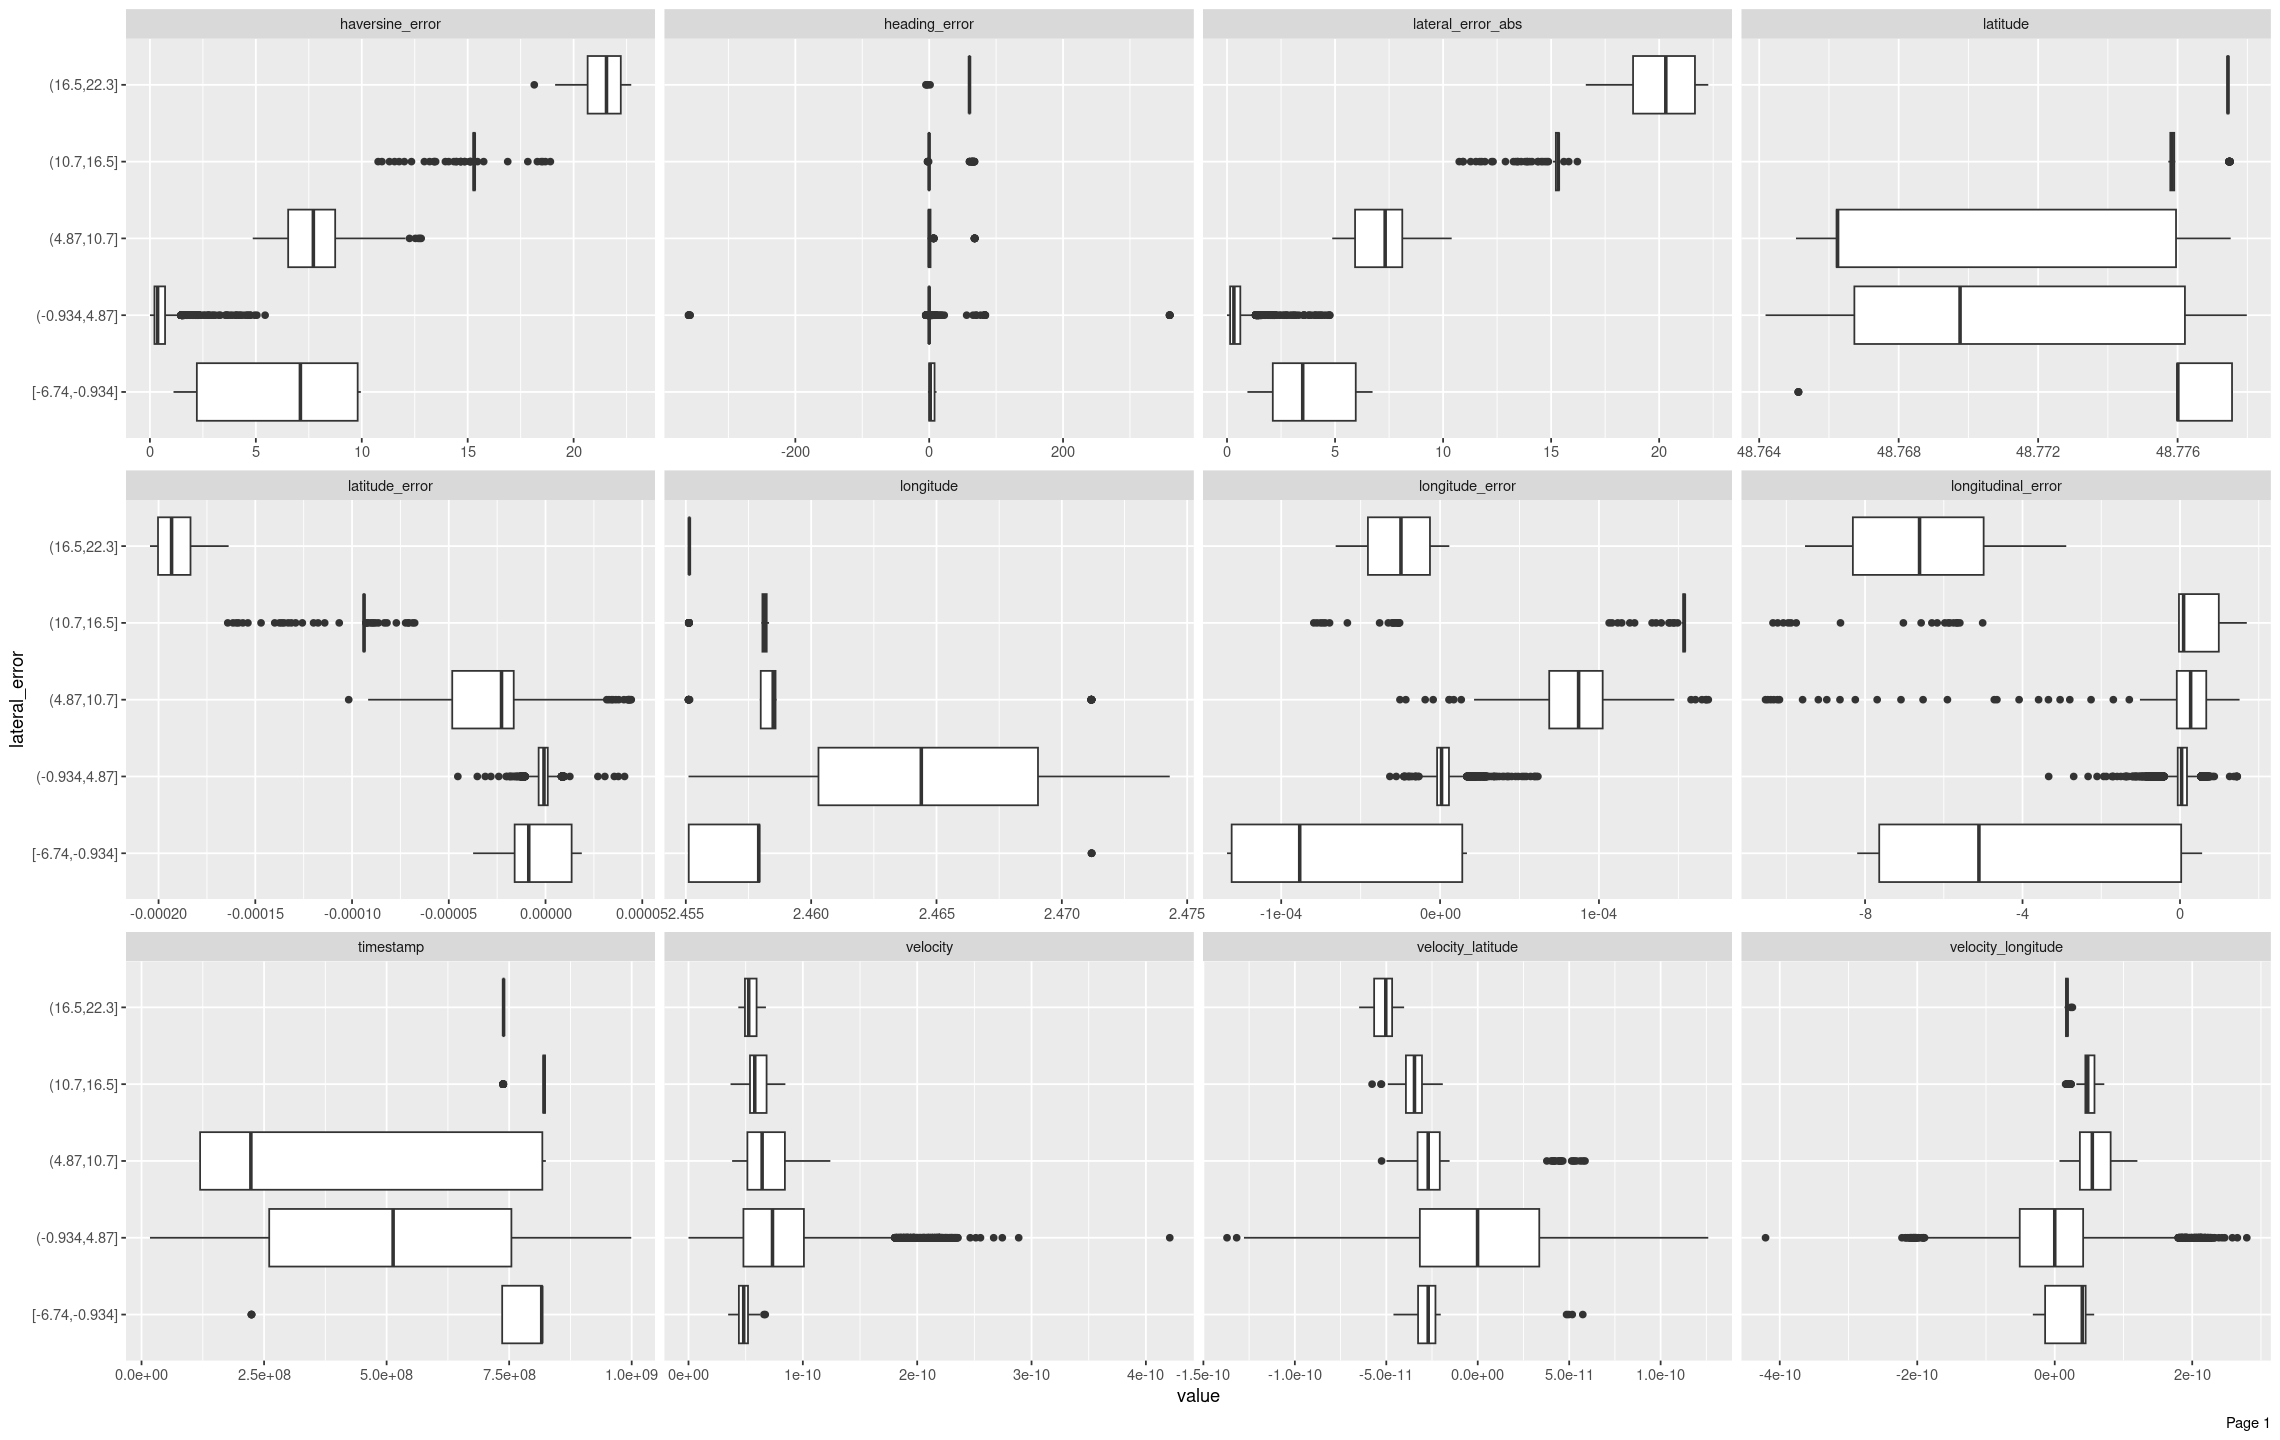

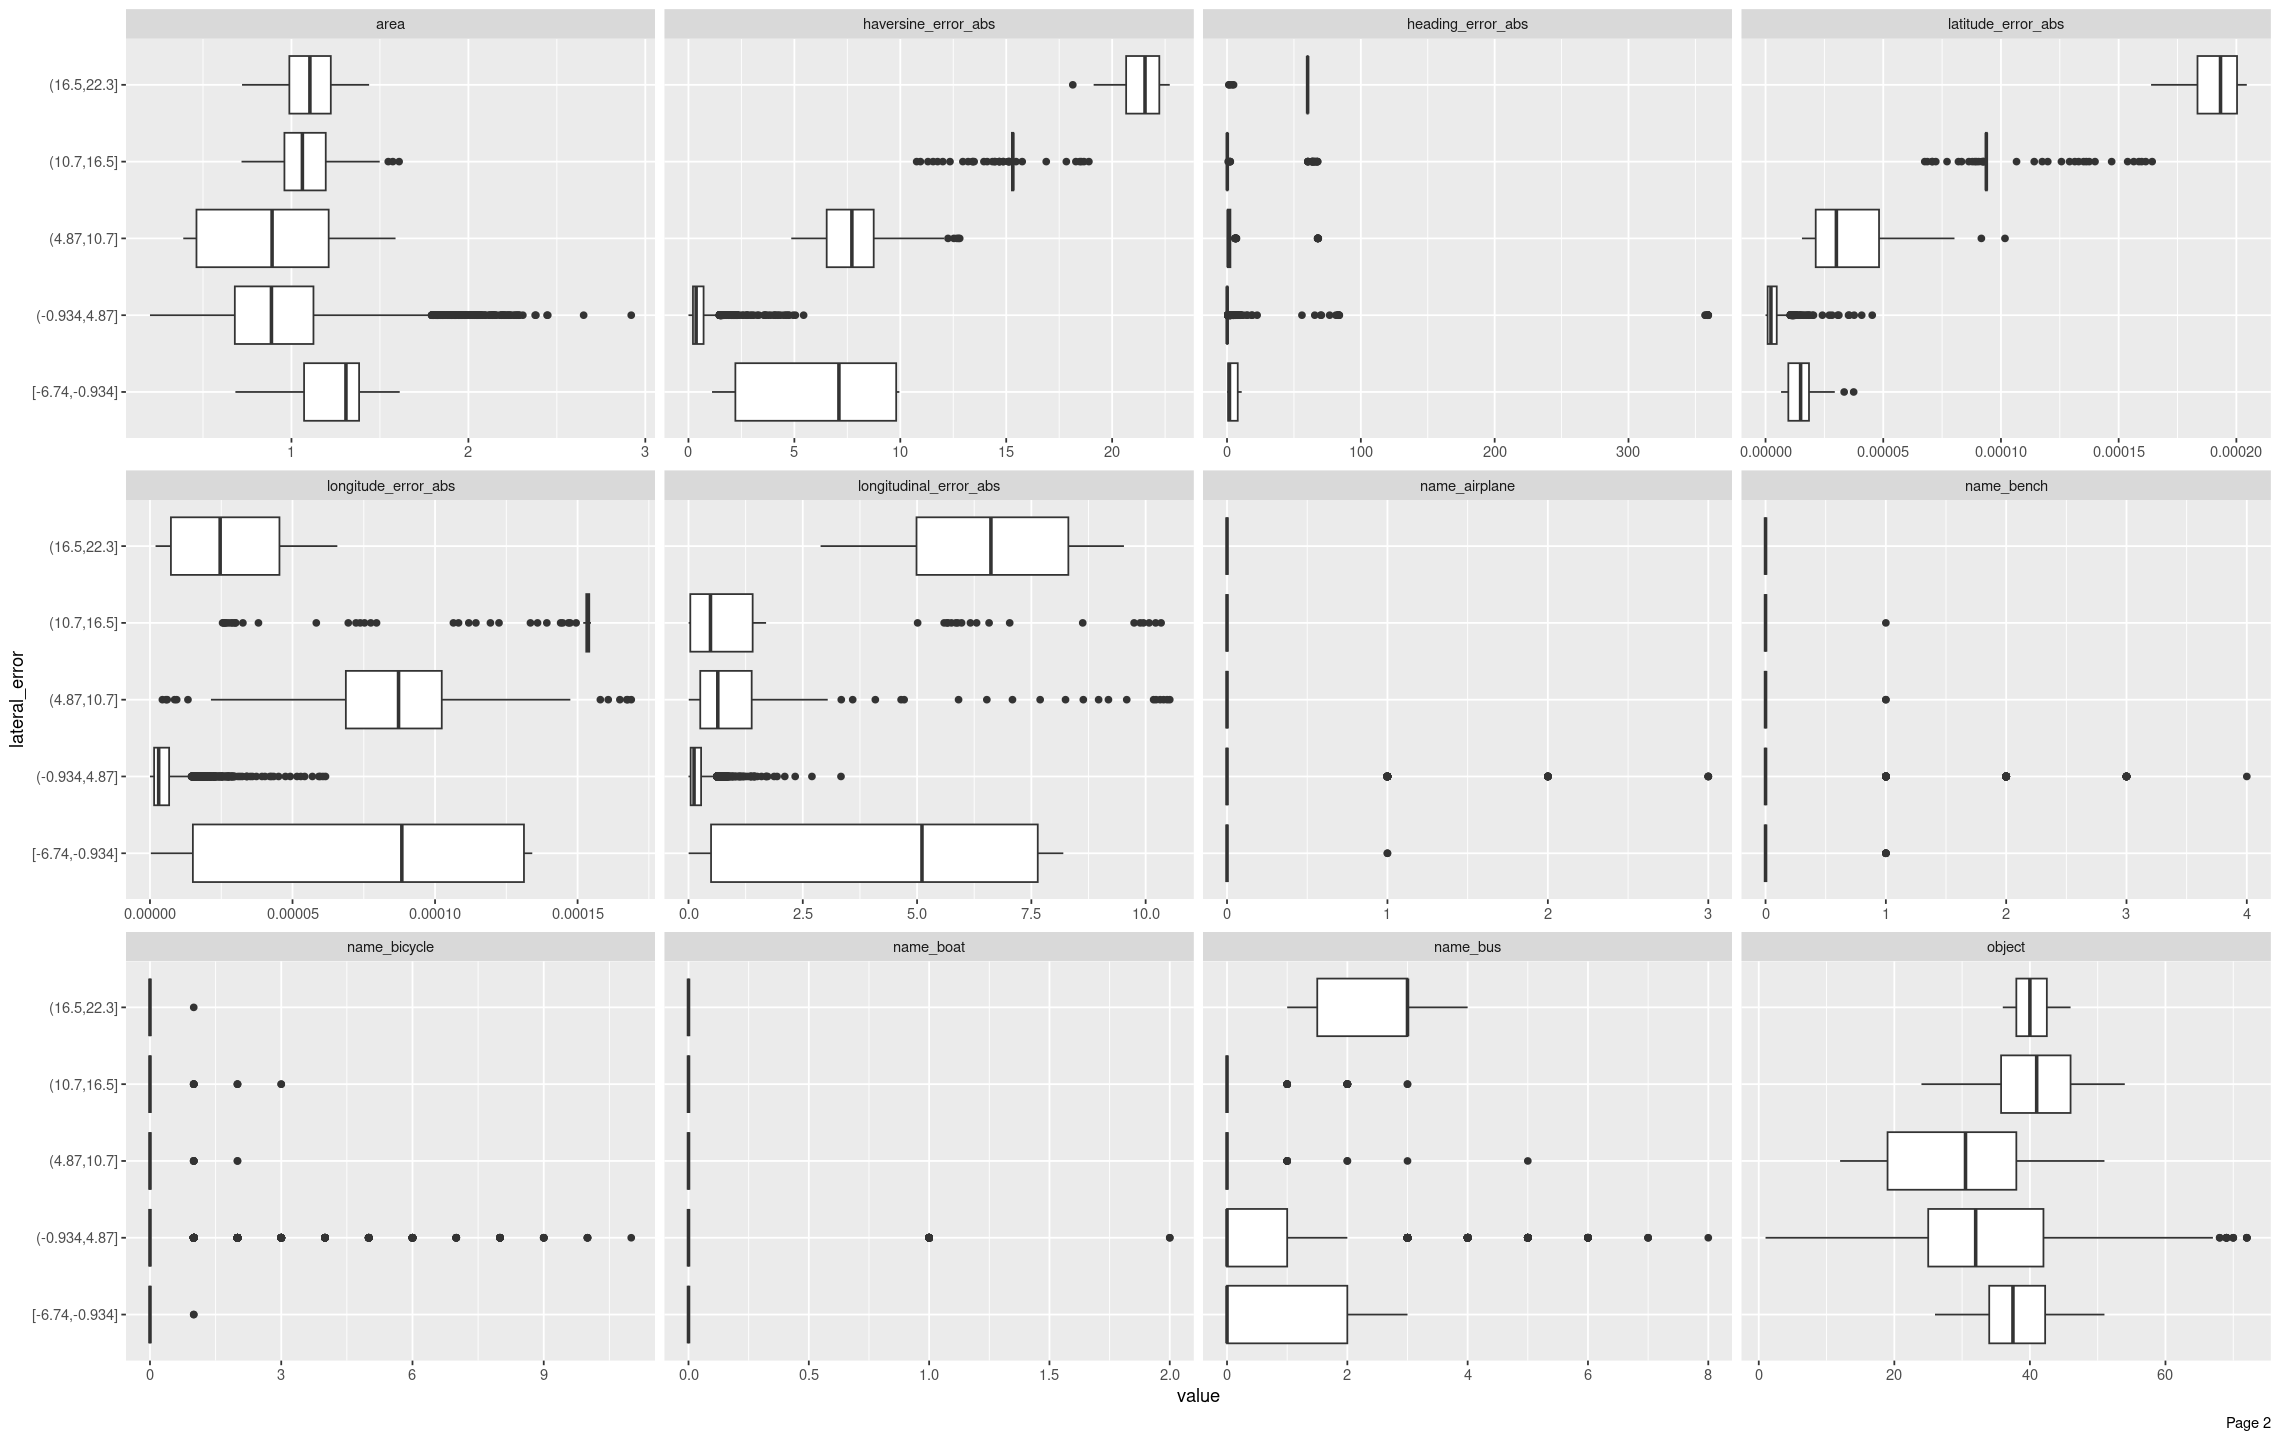

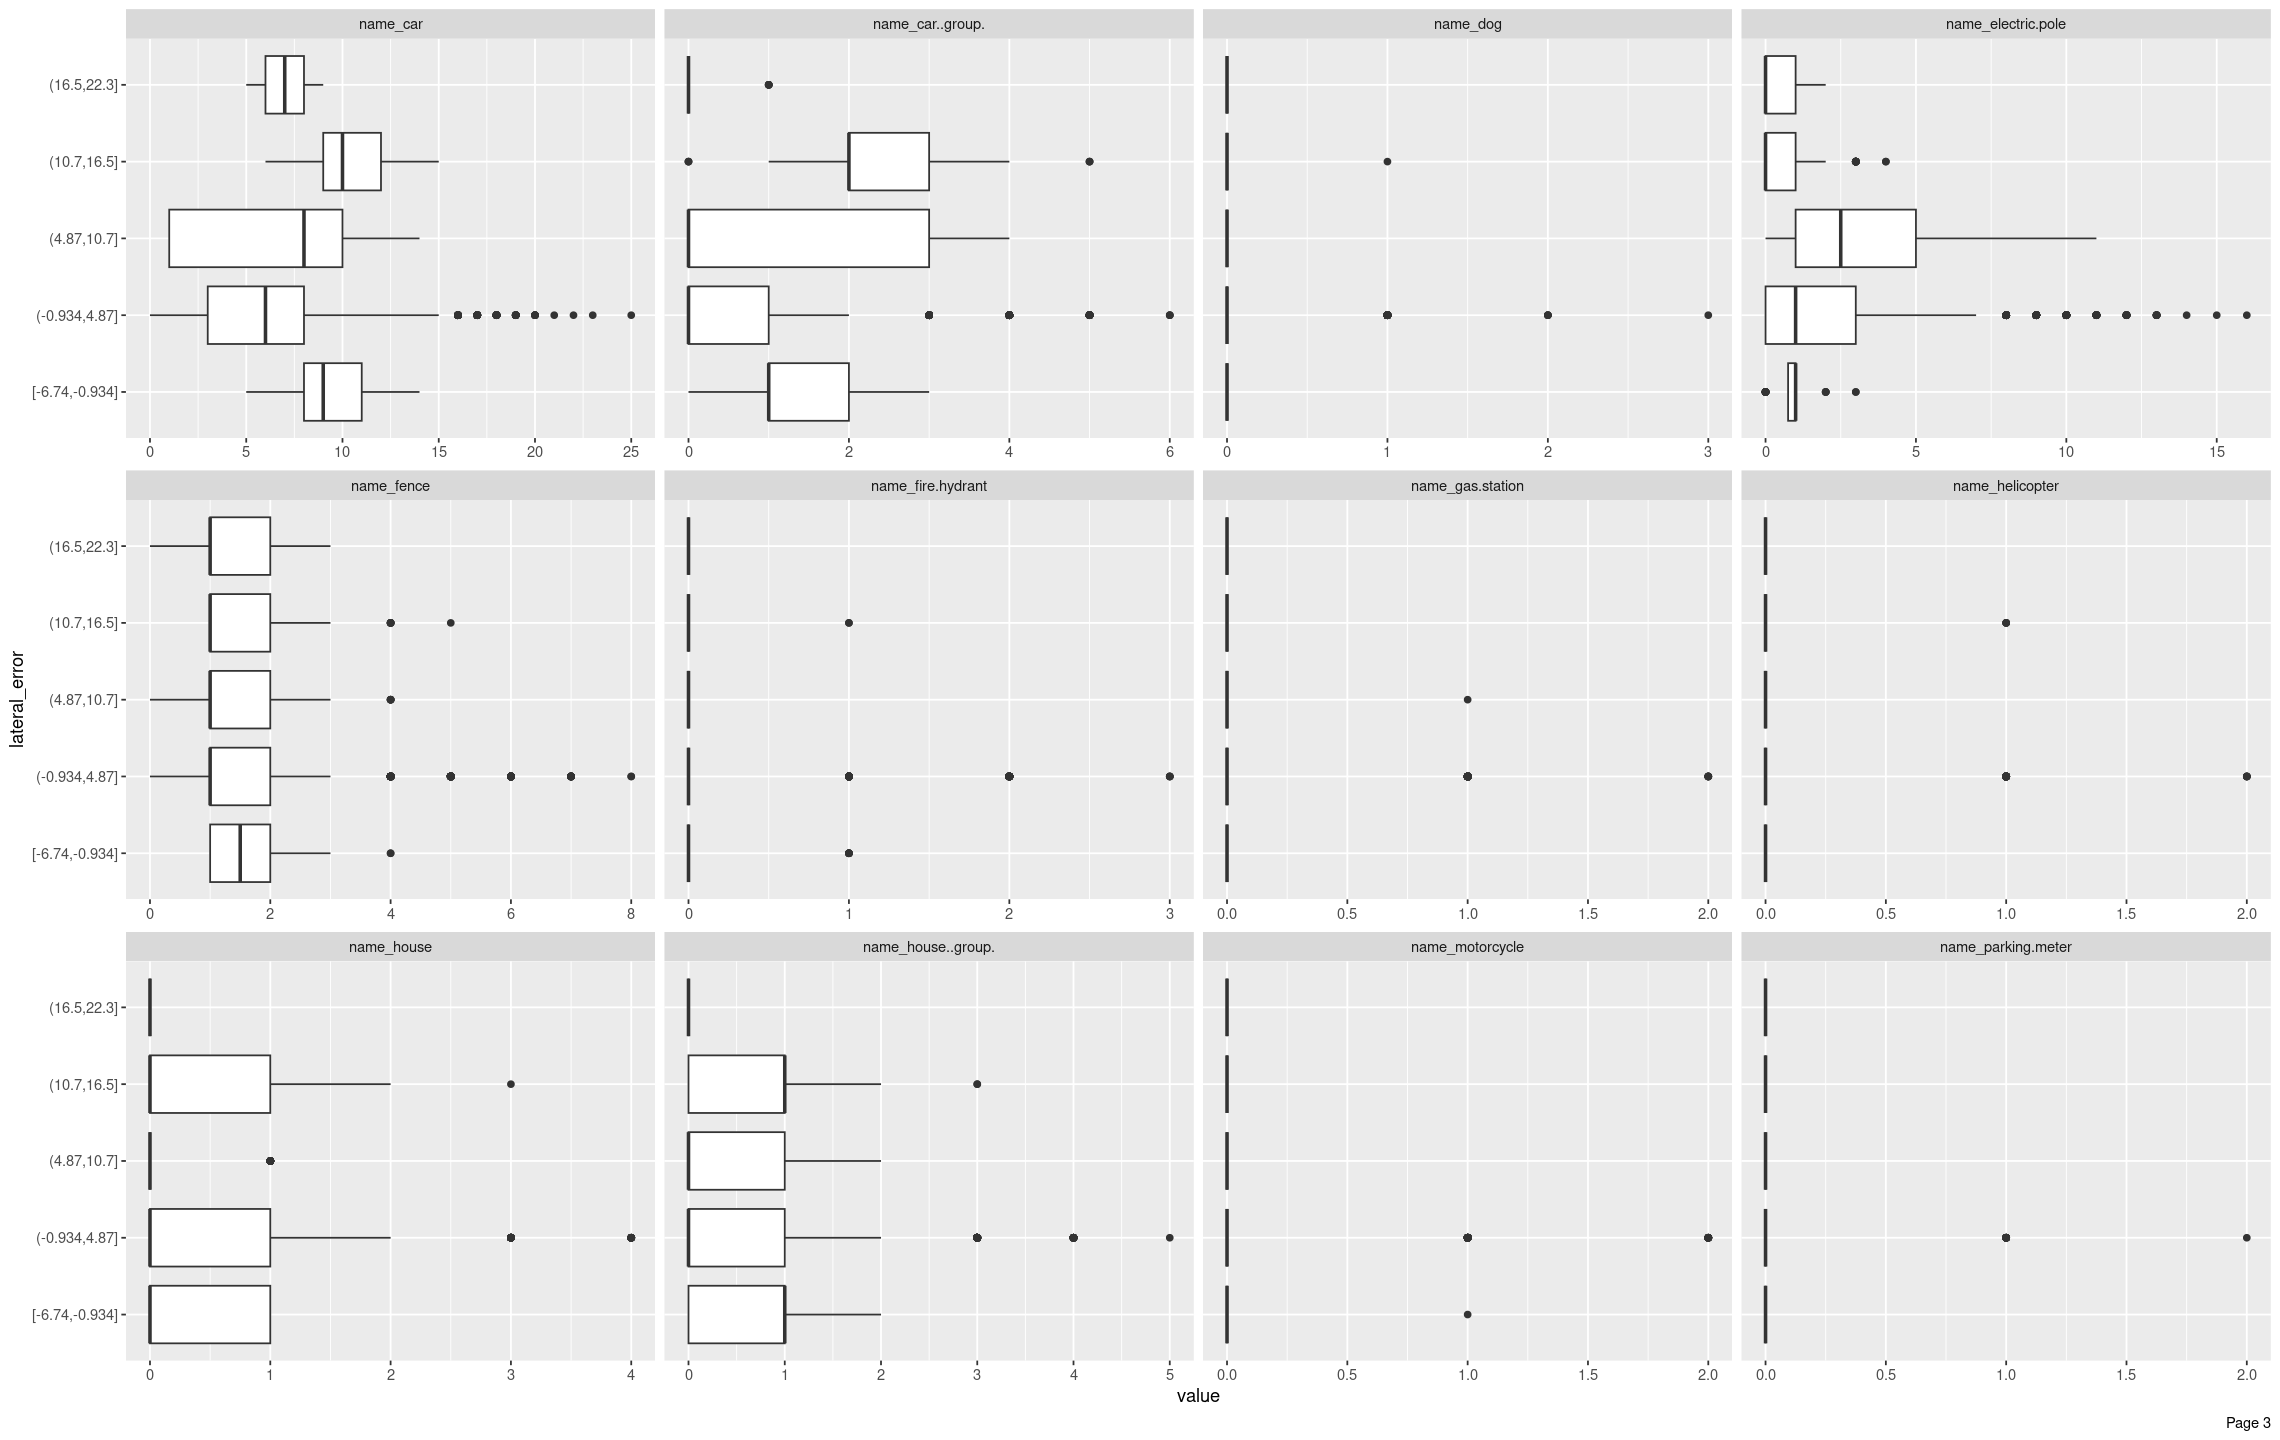

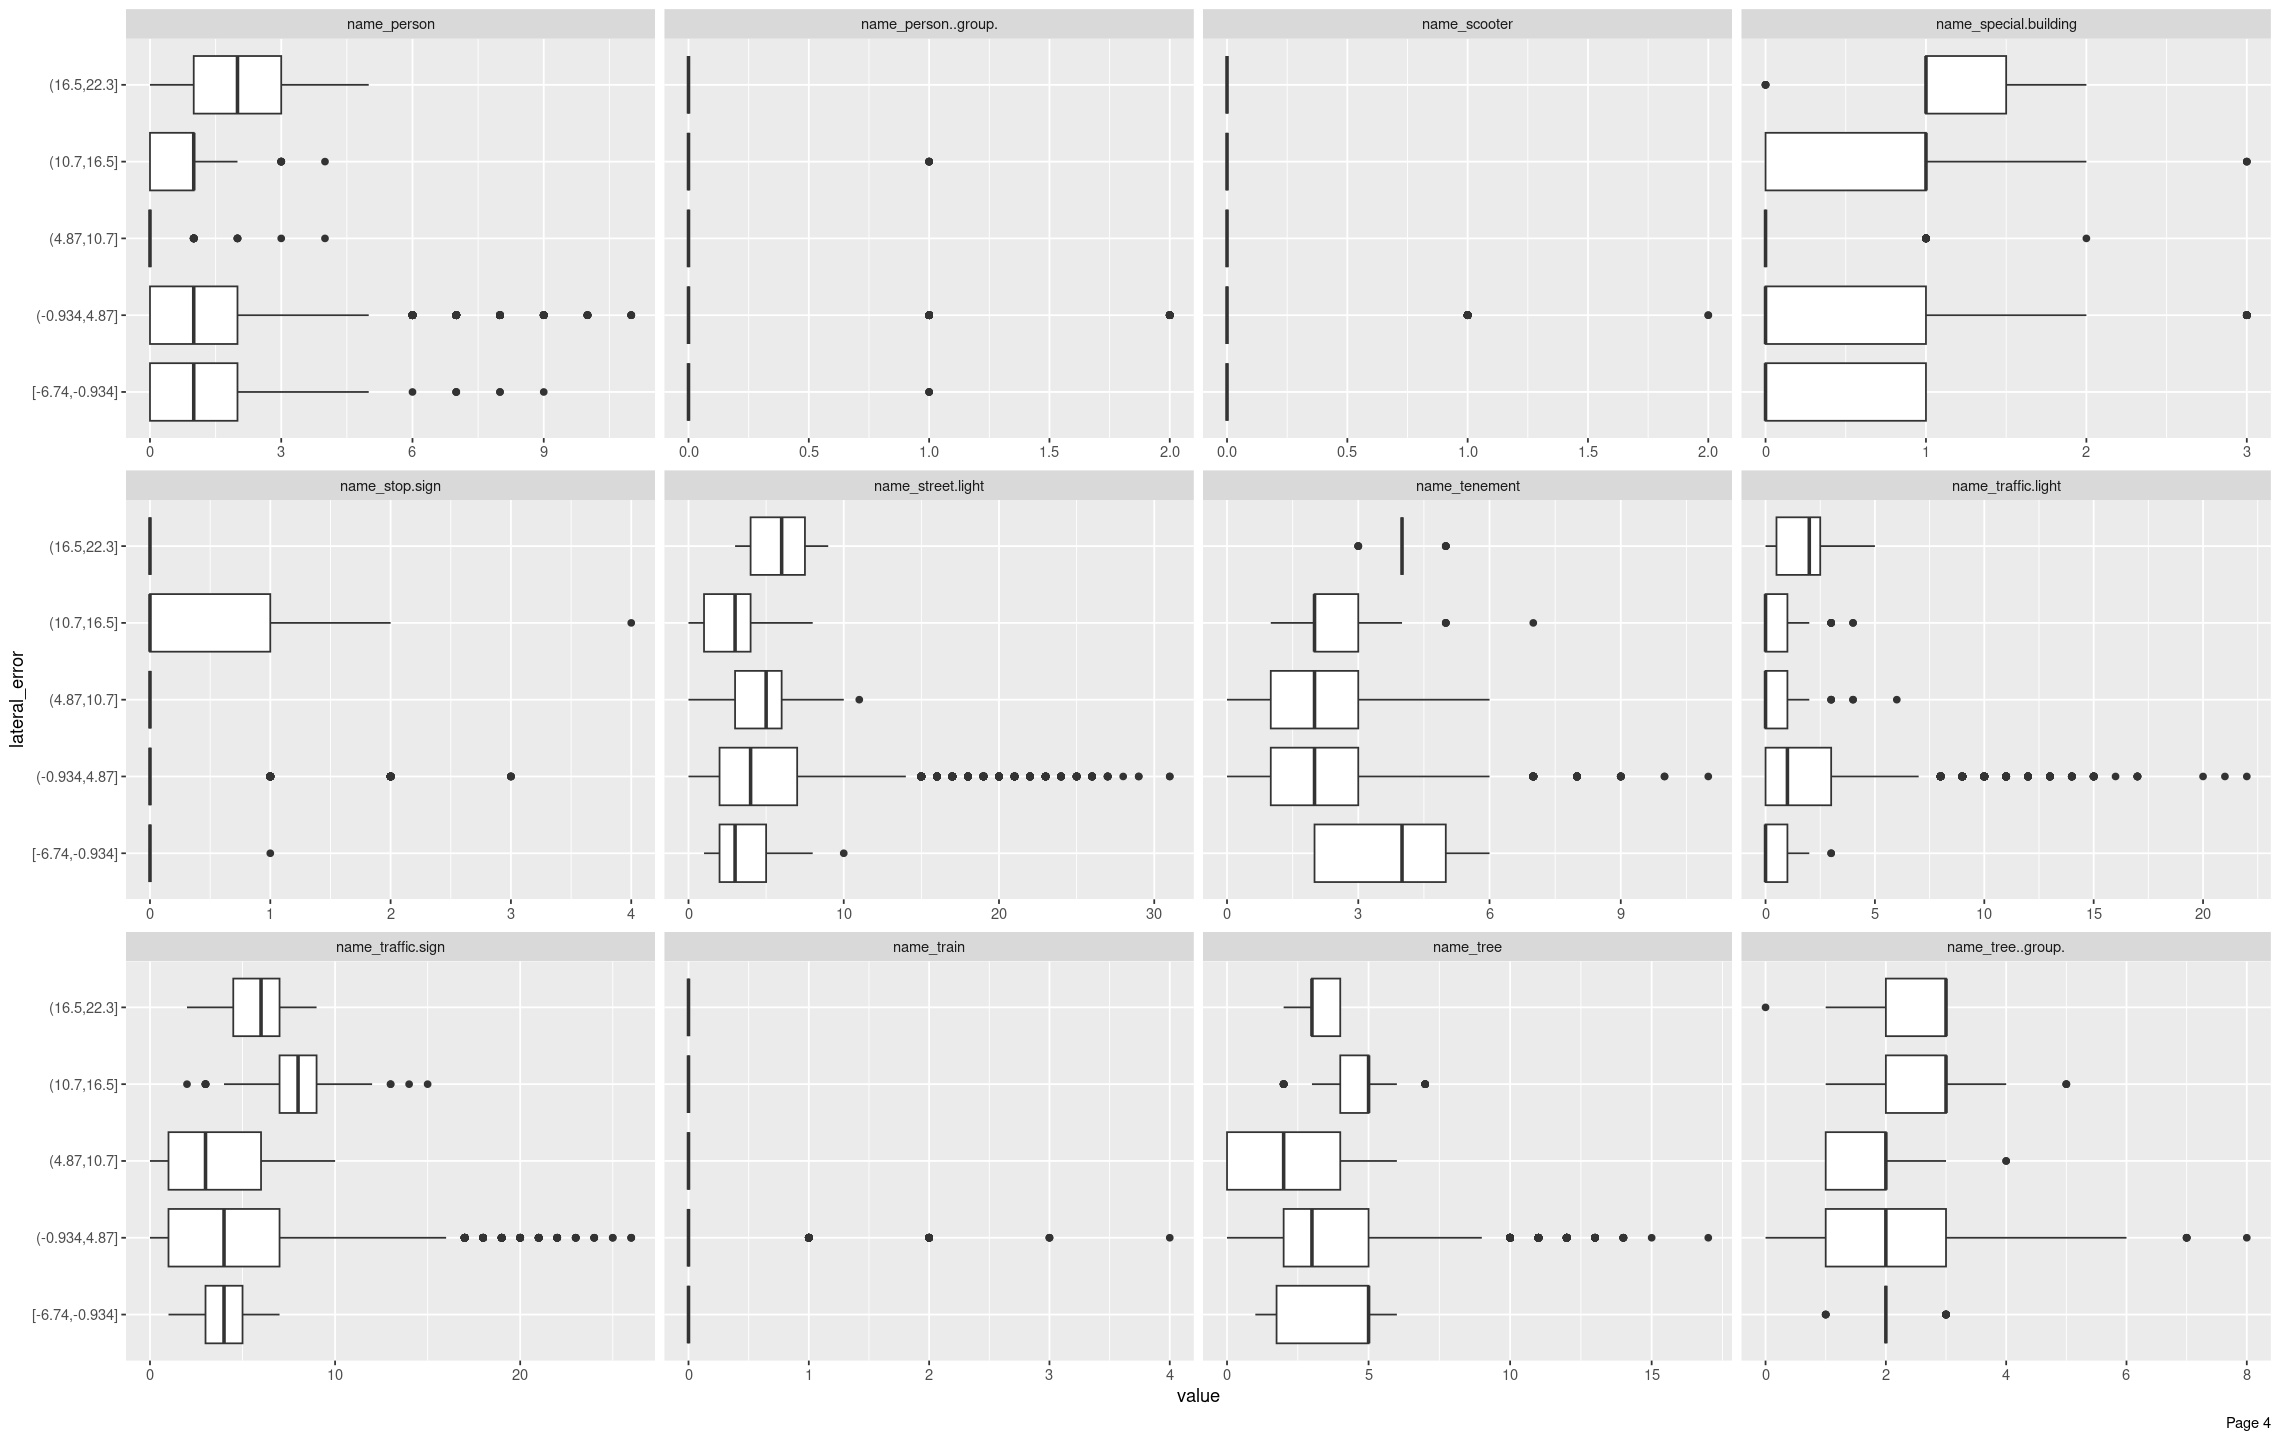

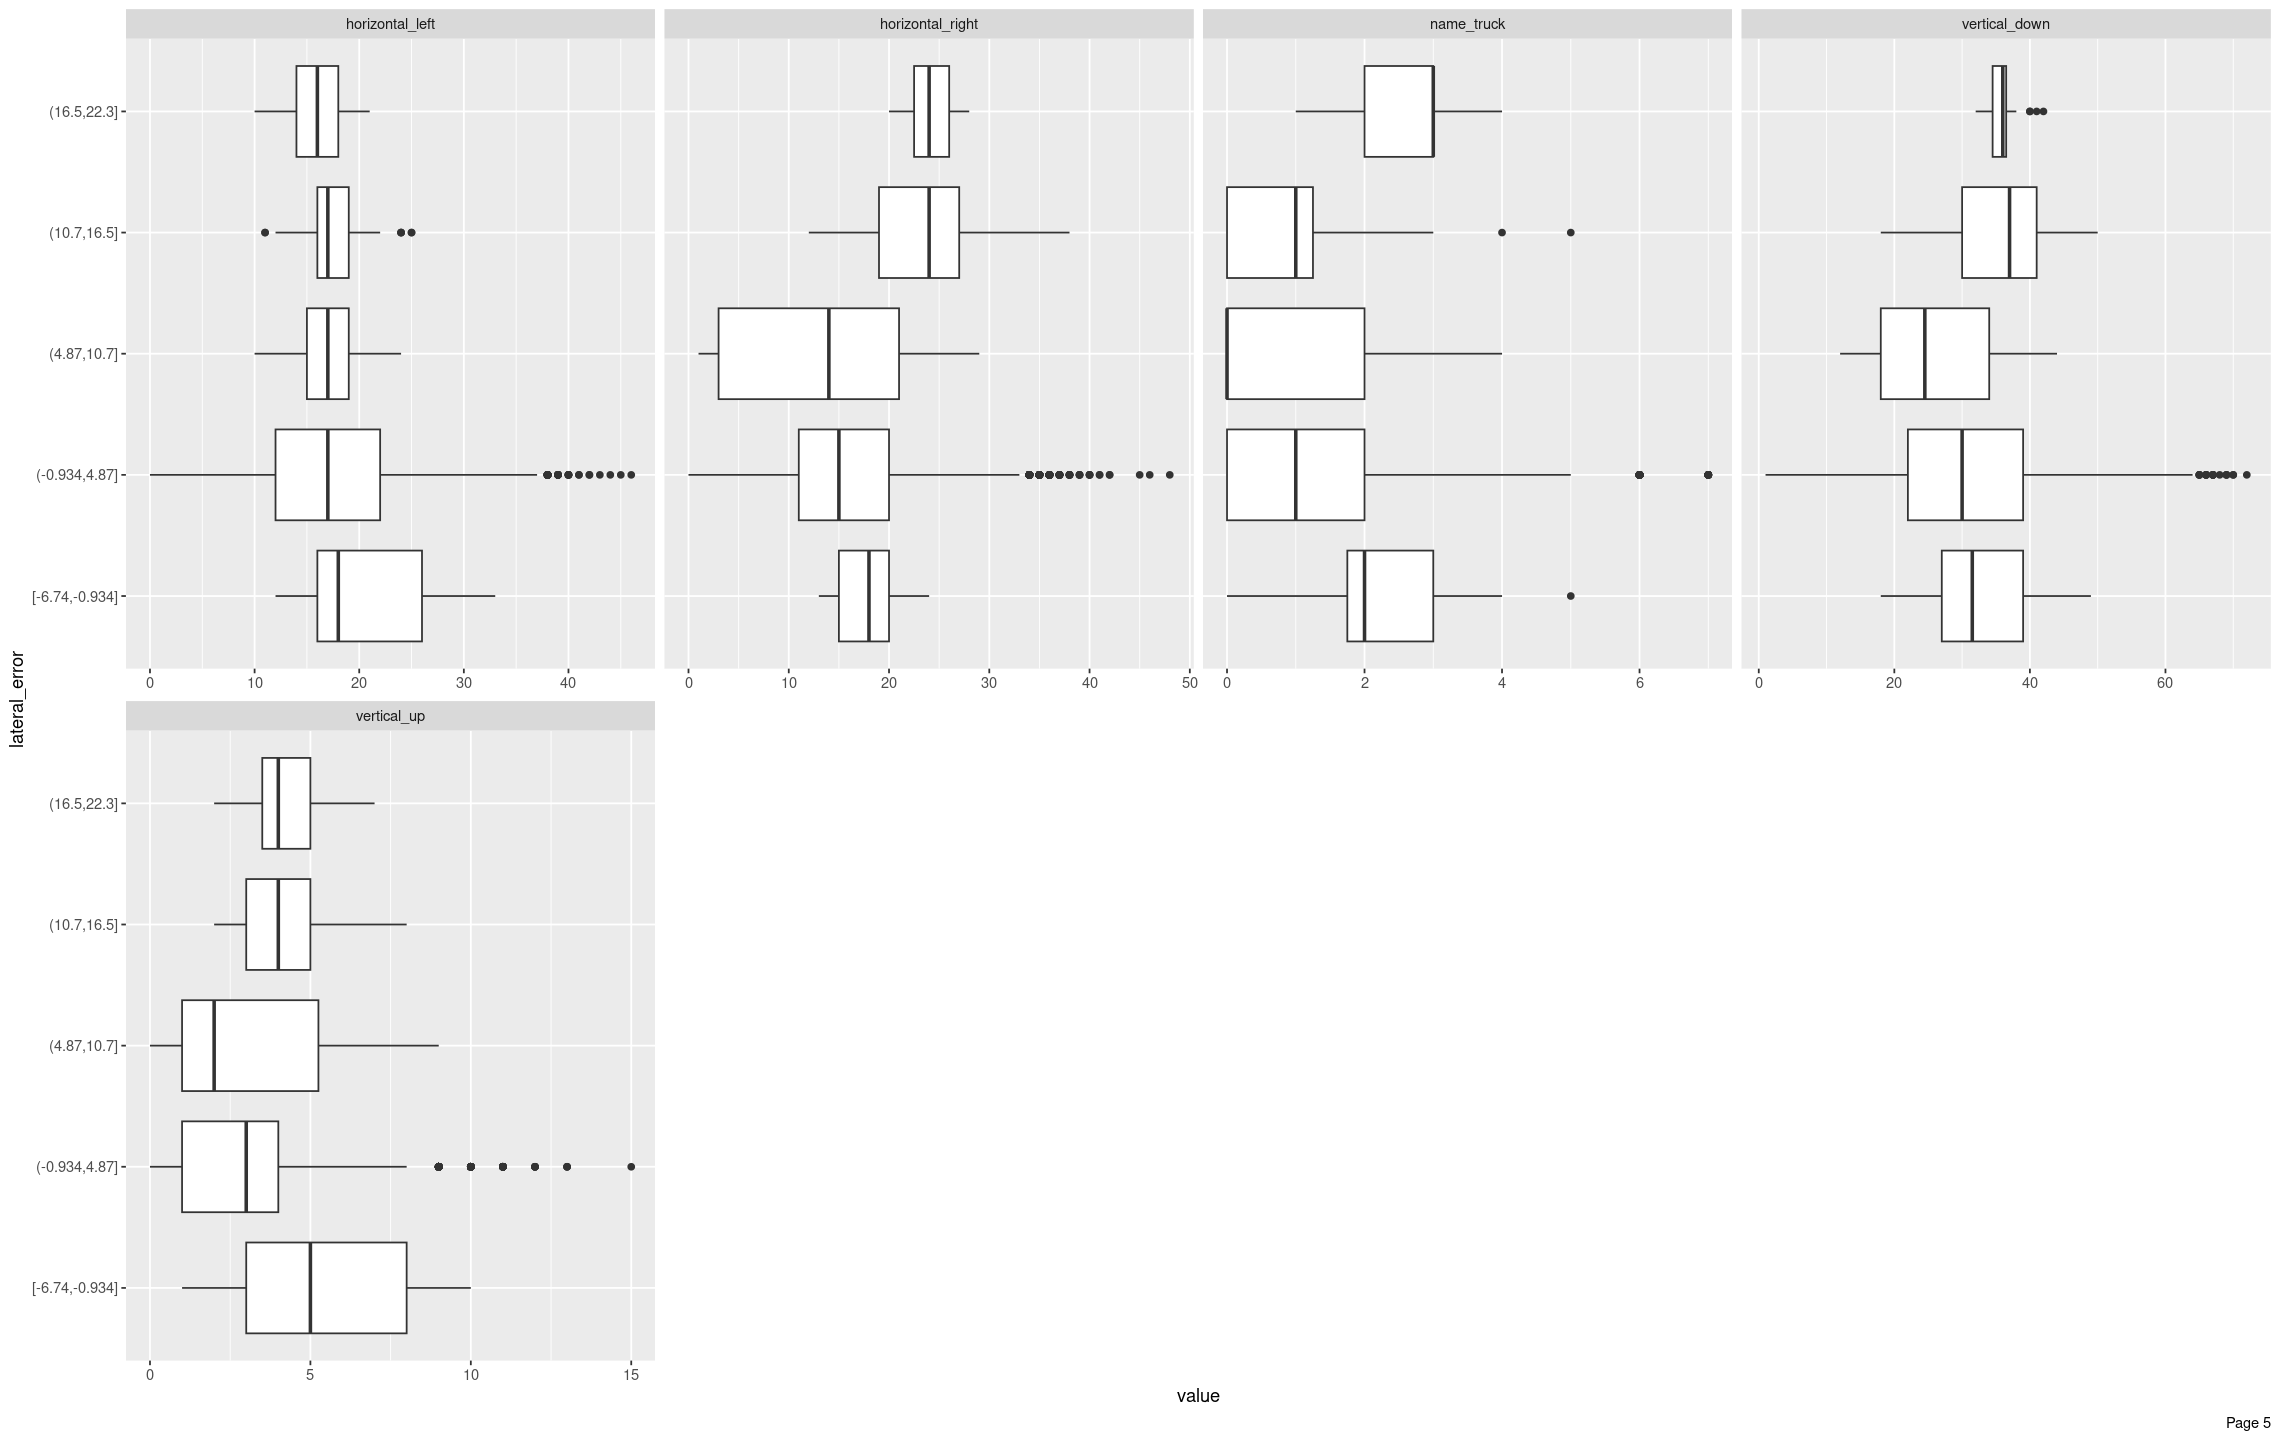

In [32]:
plot_boxplot(na.omit(data), by="lateral_error")

## longitudinal_error

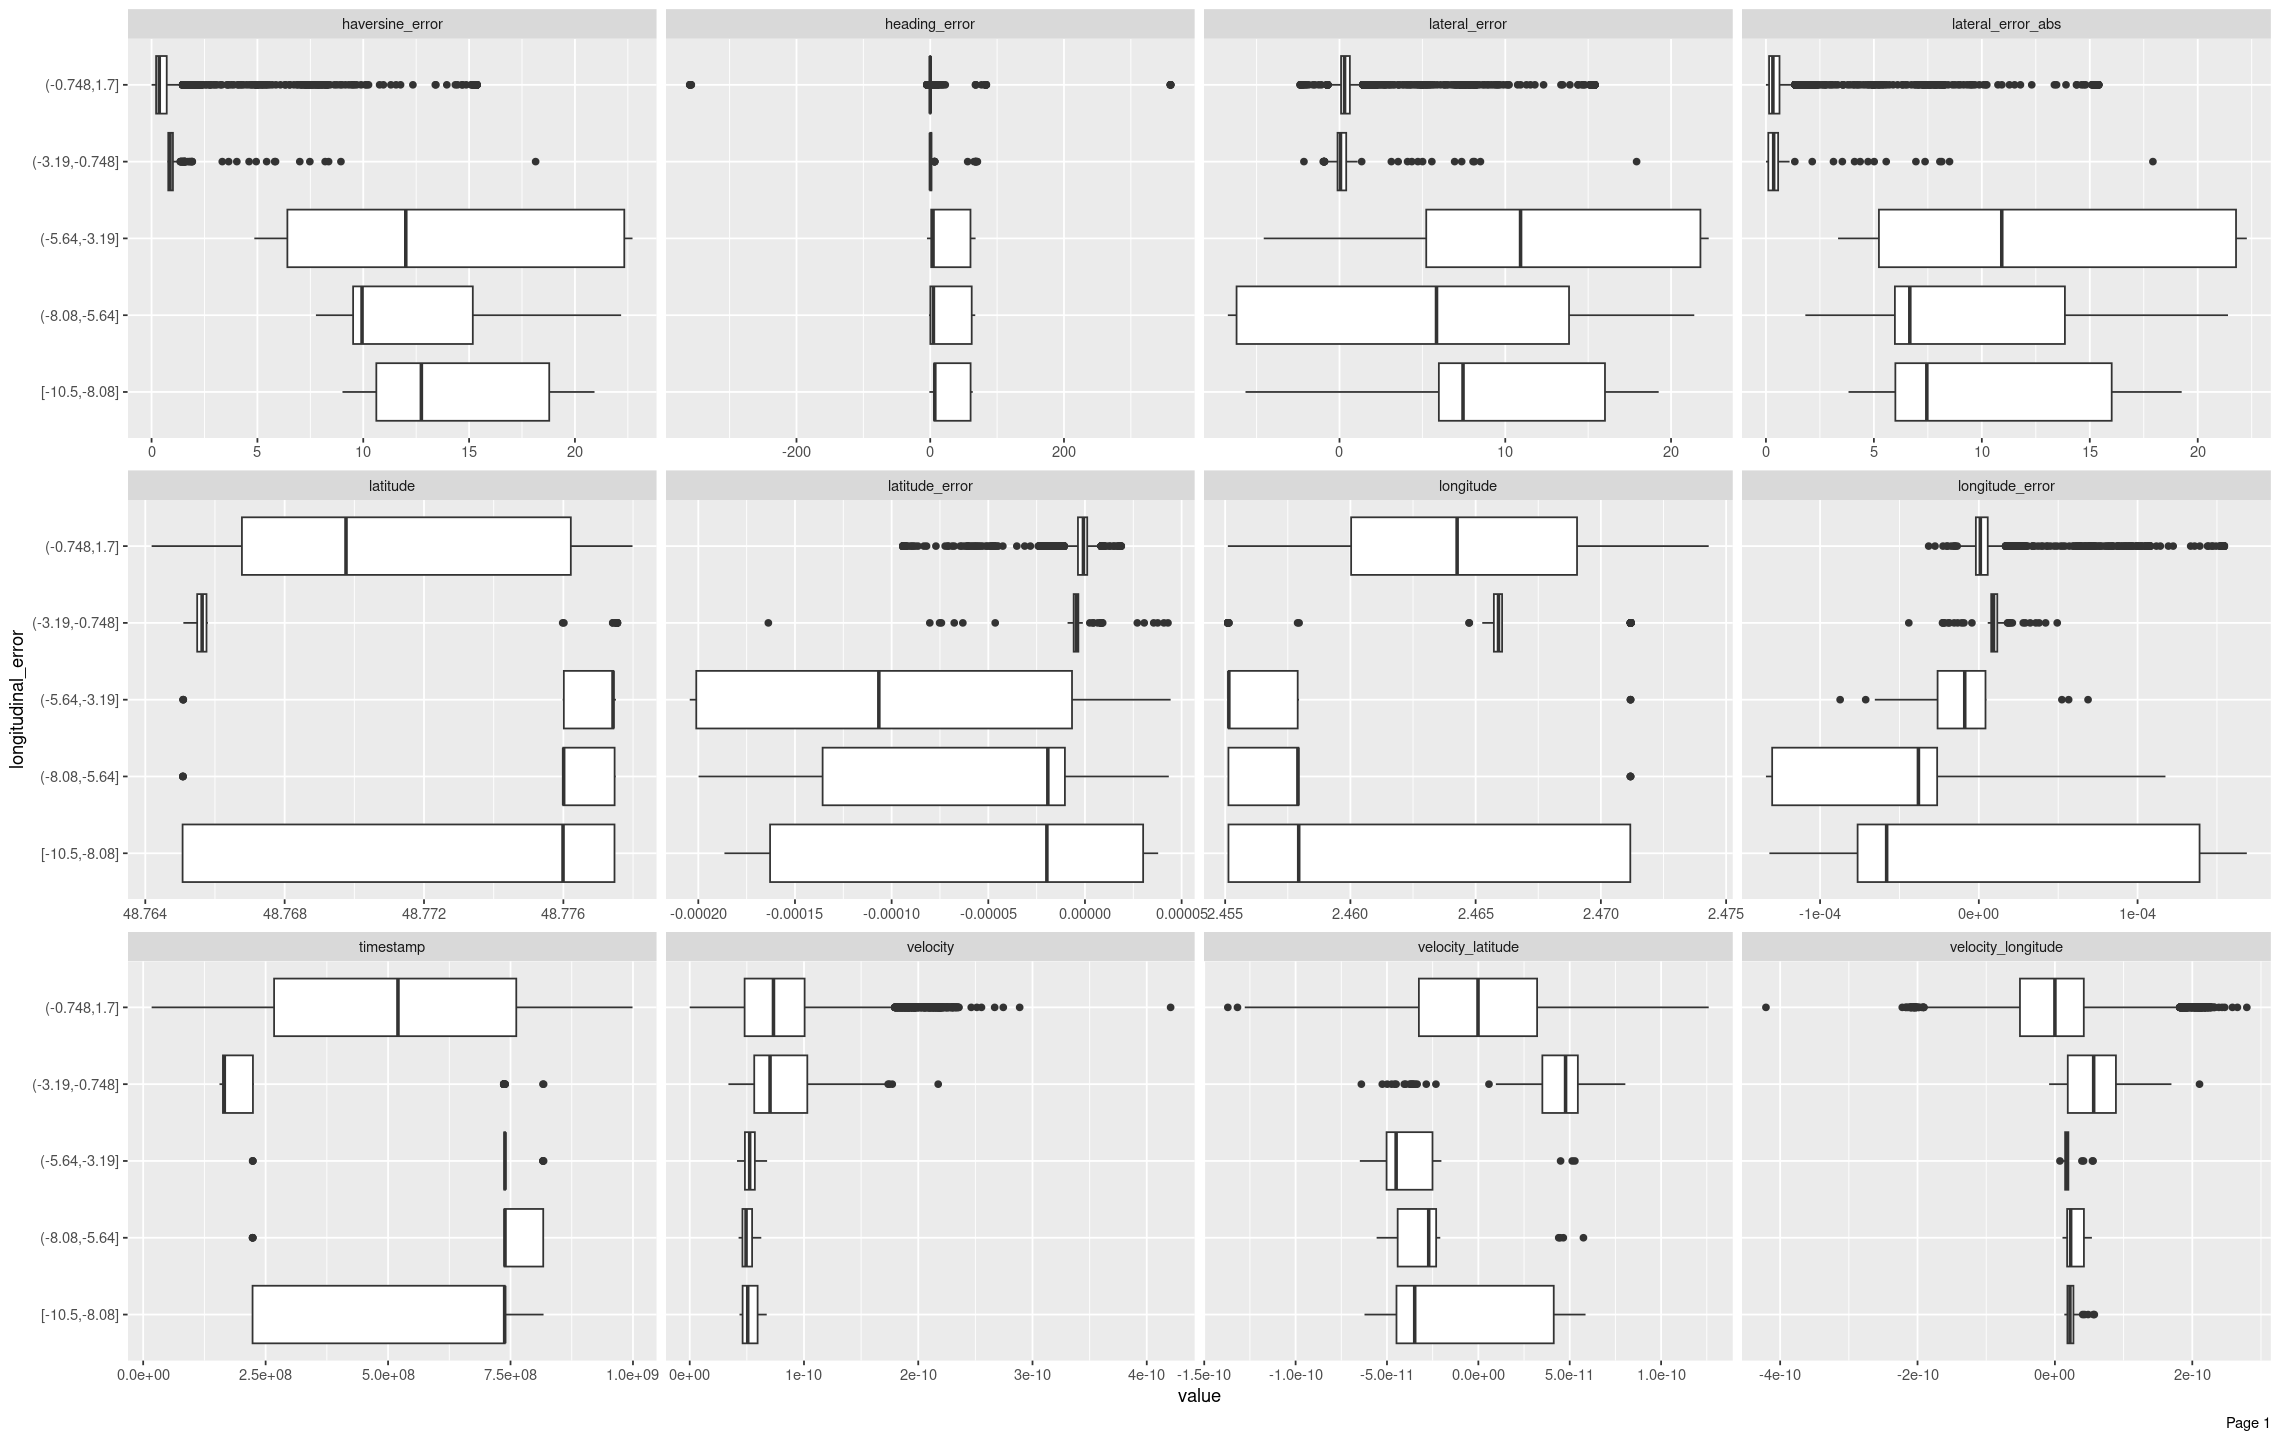

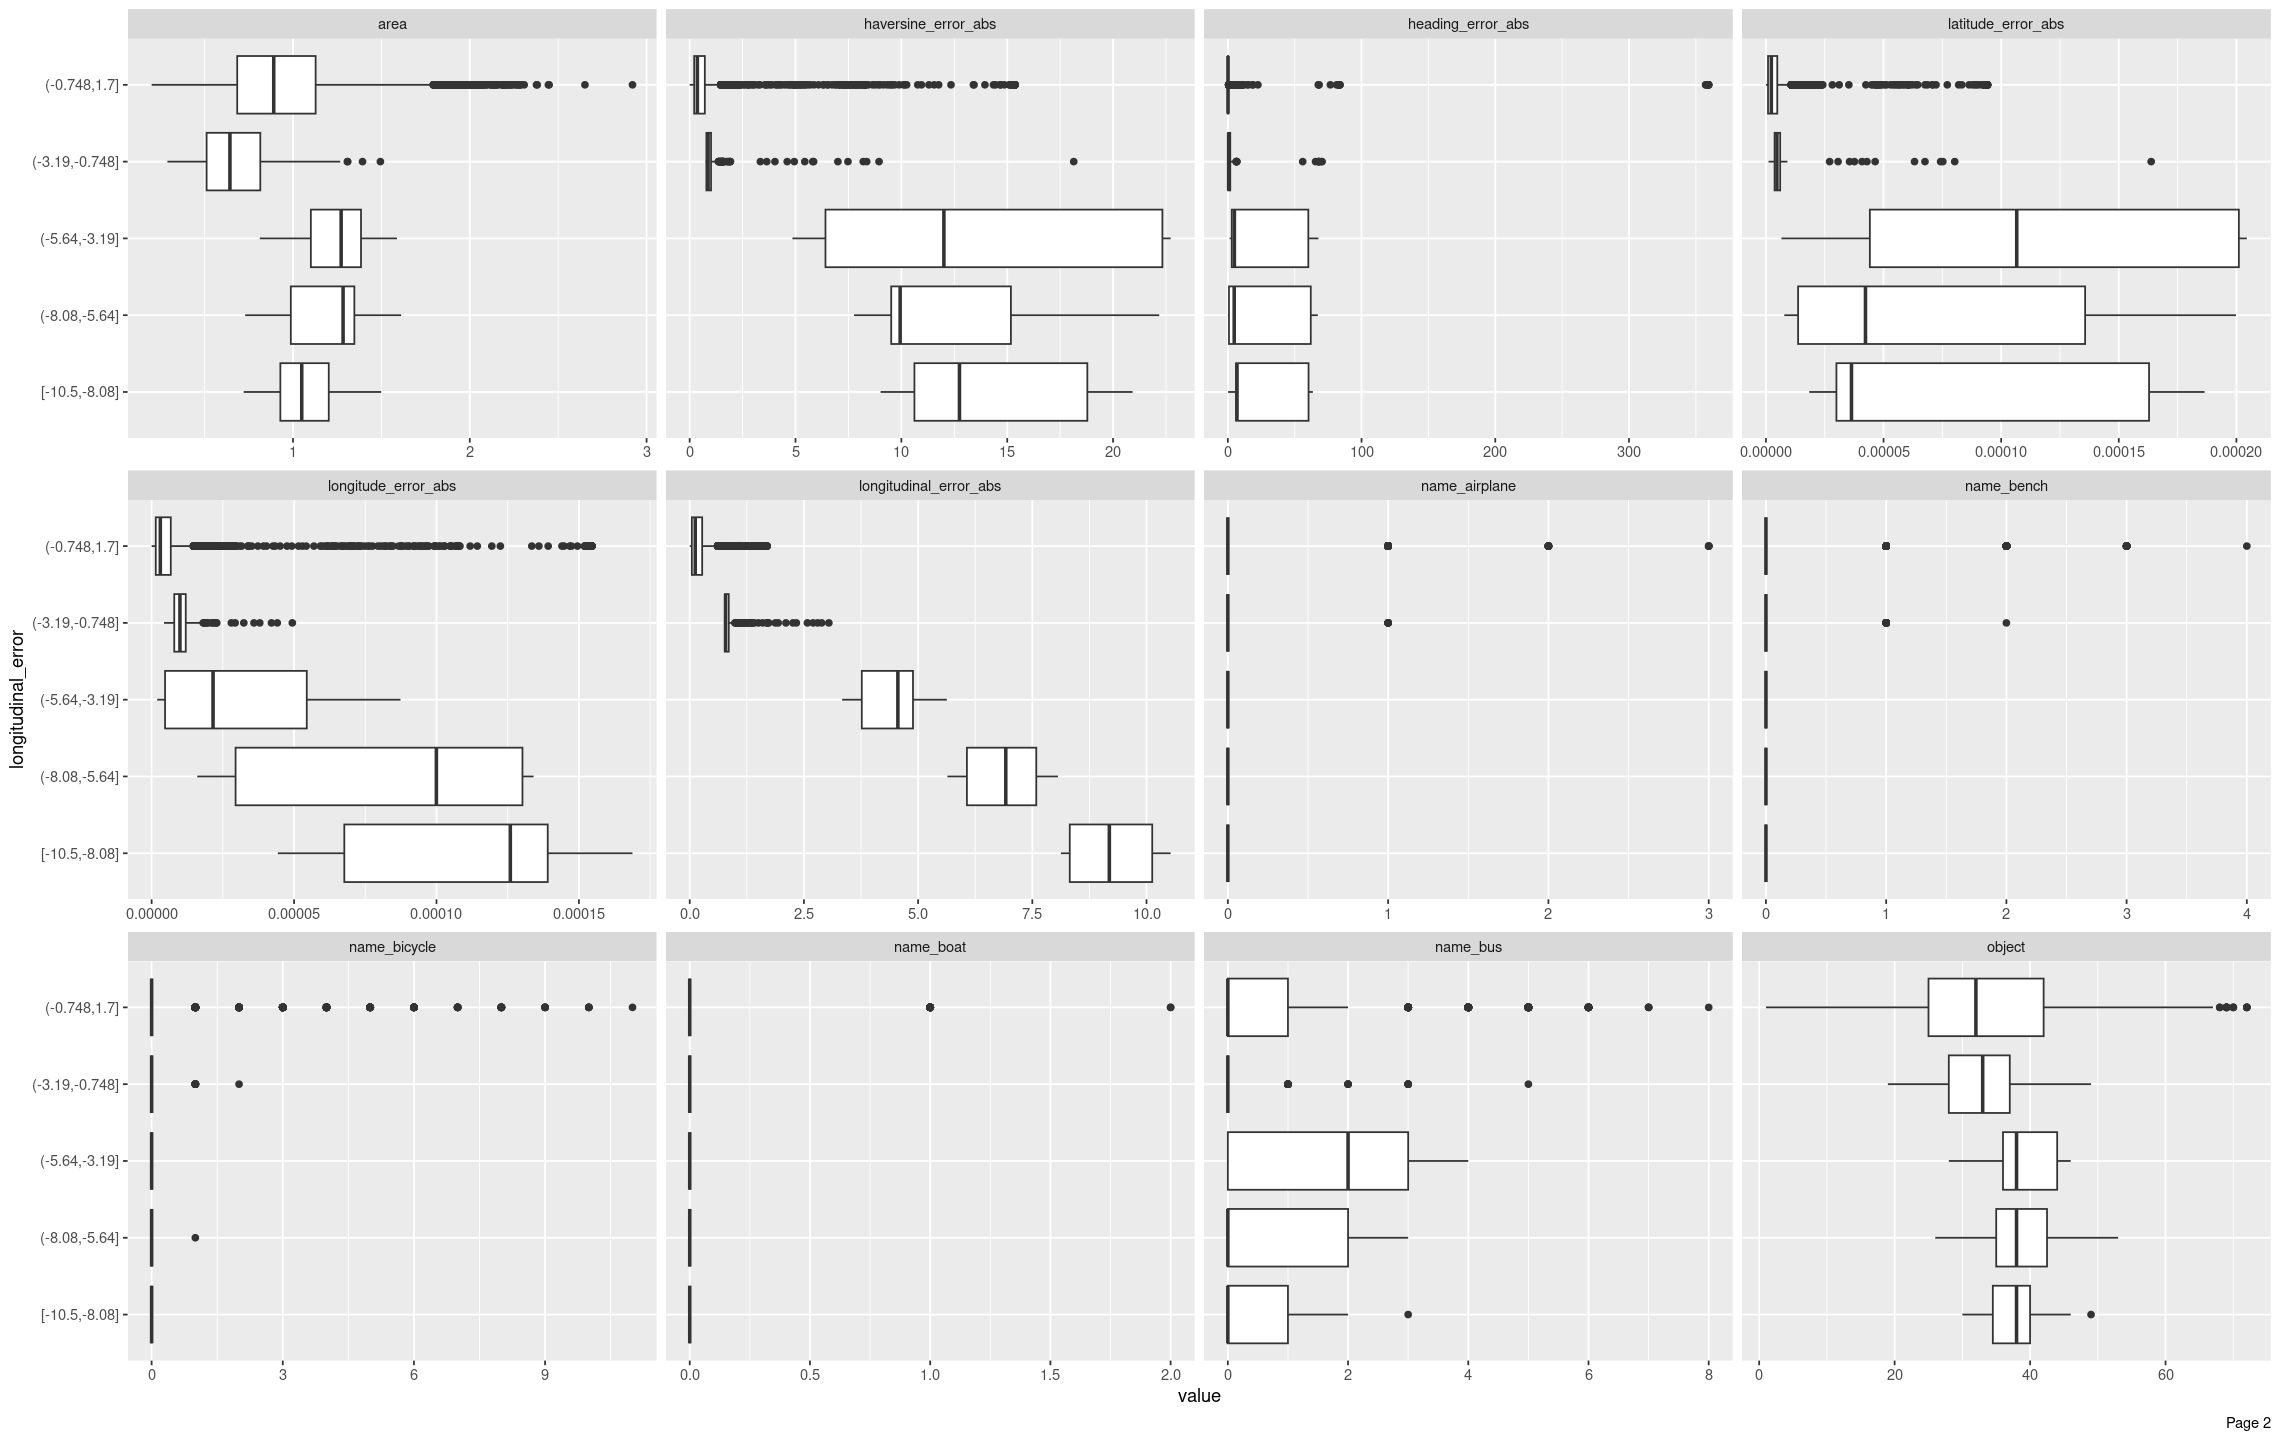

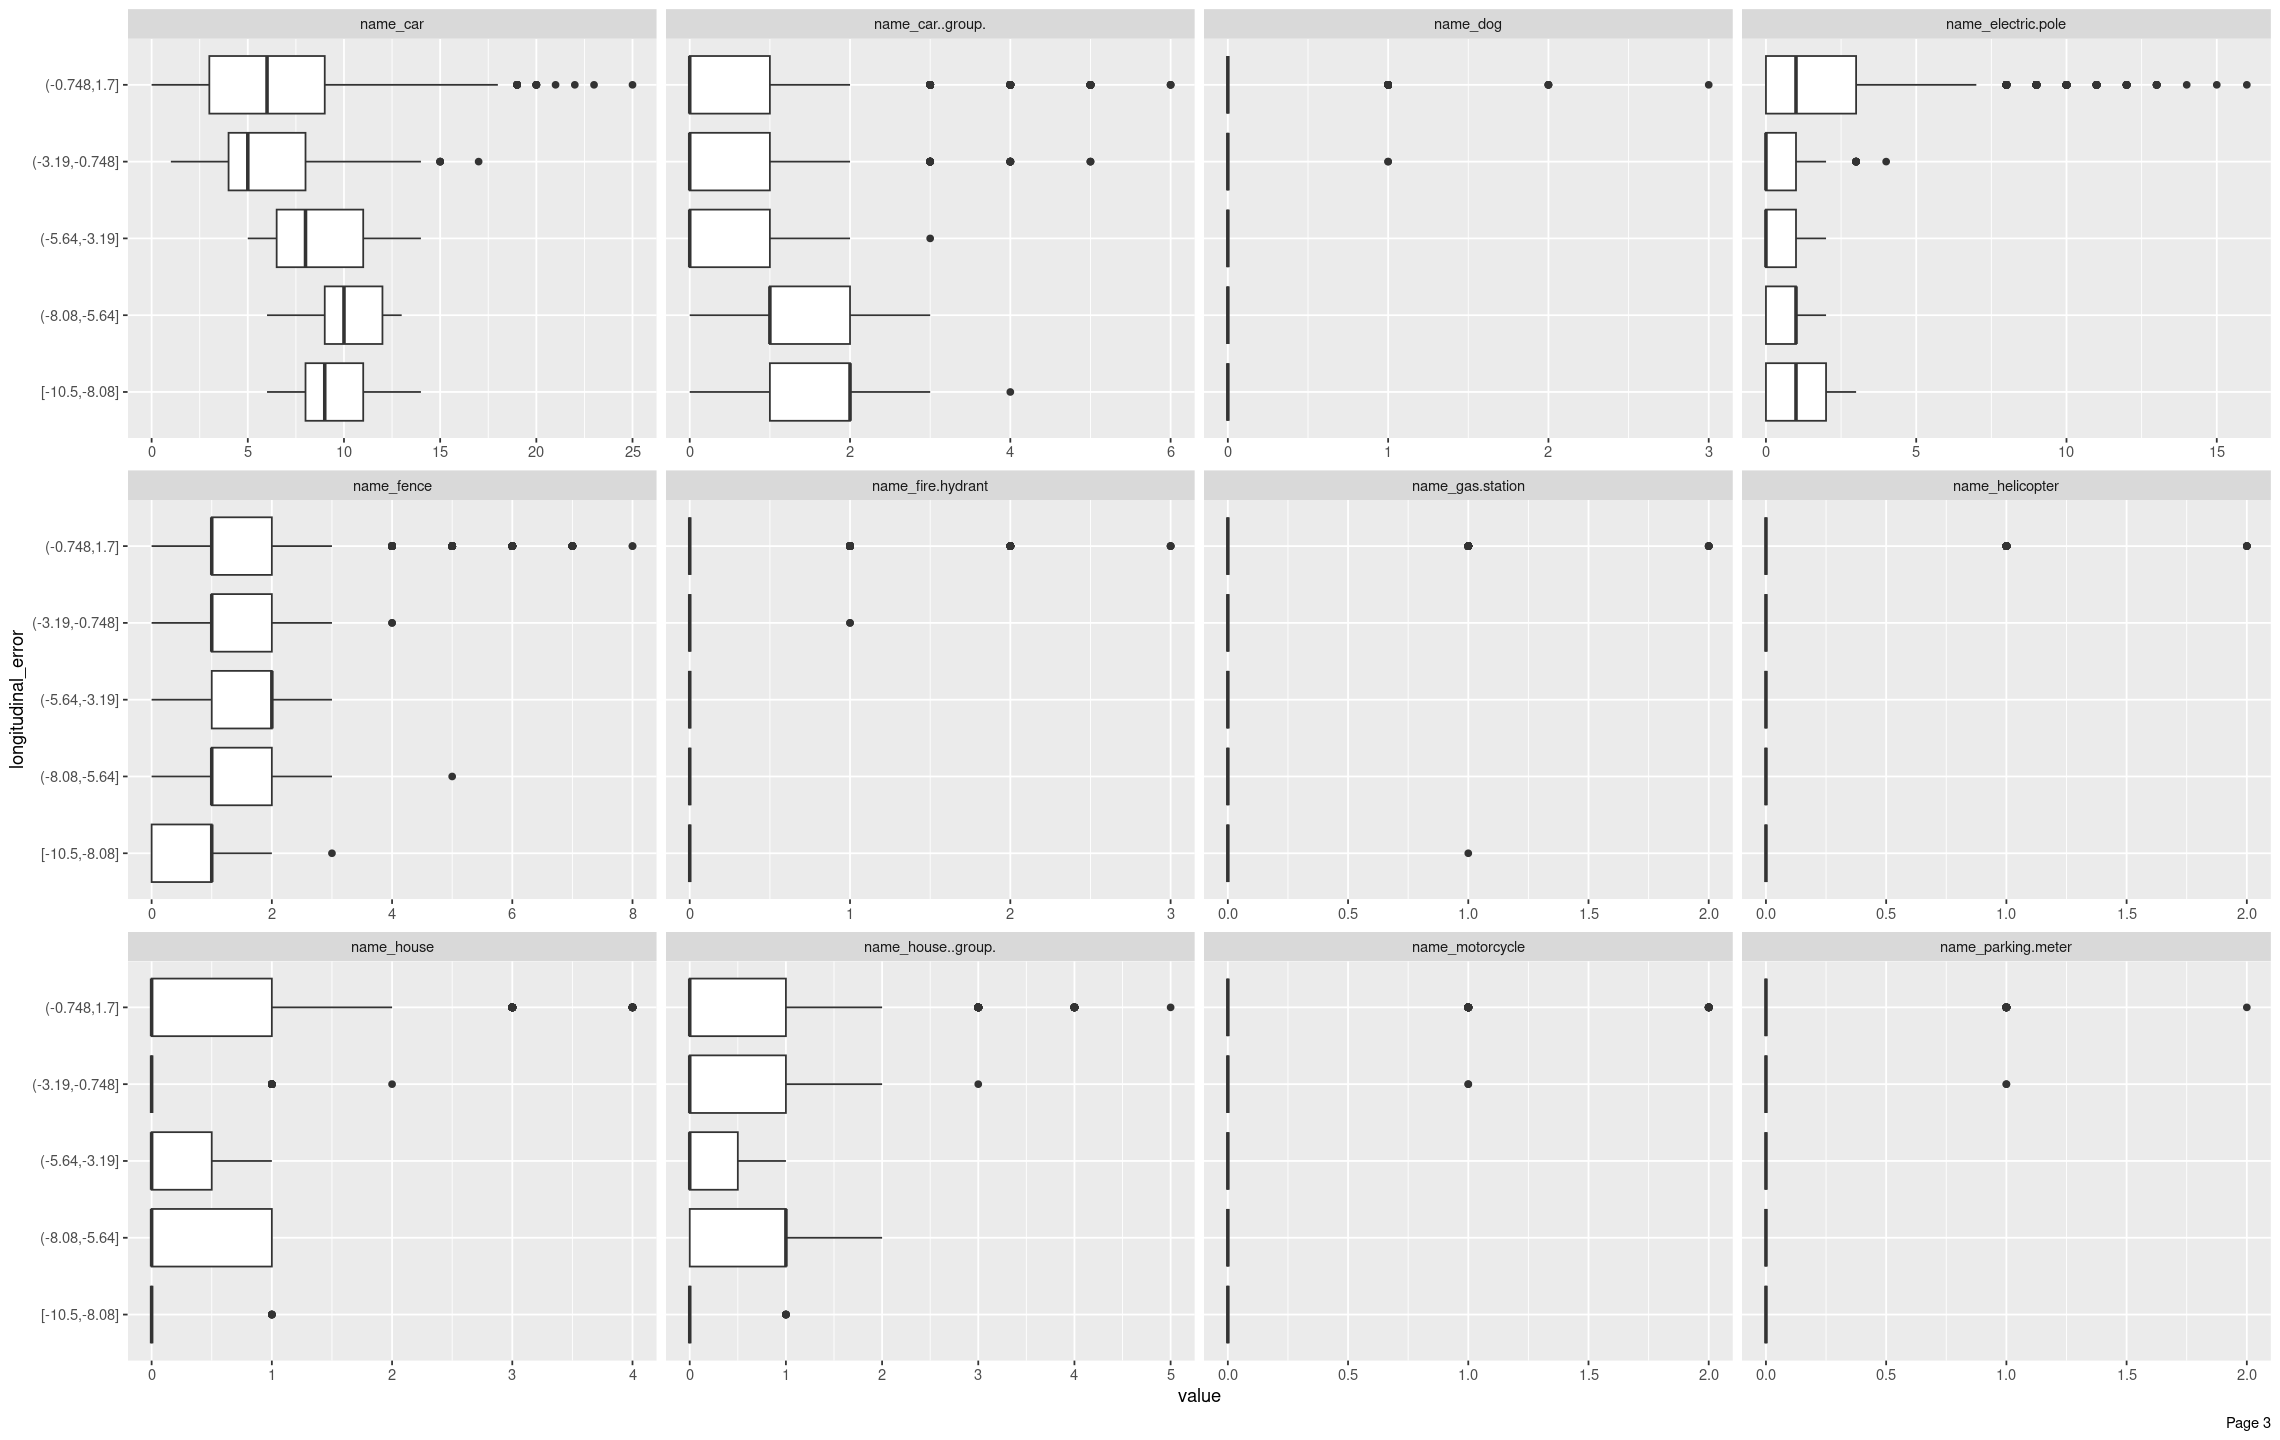

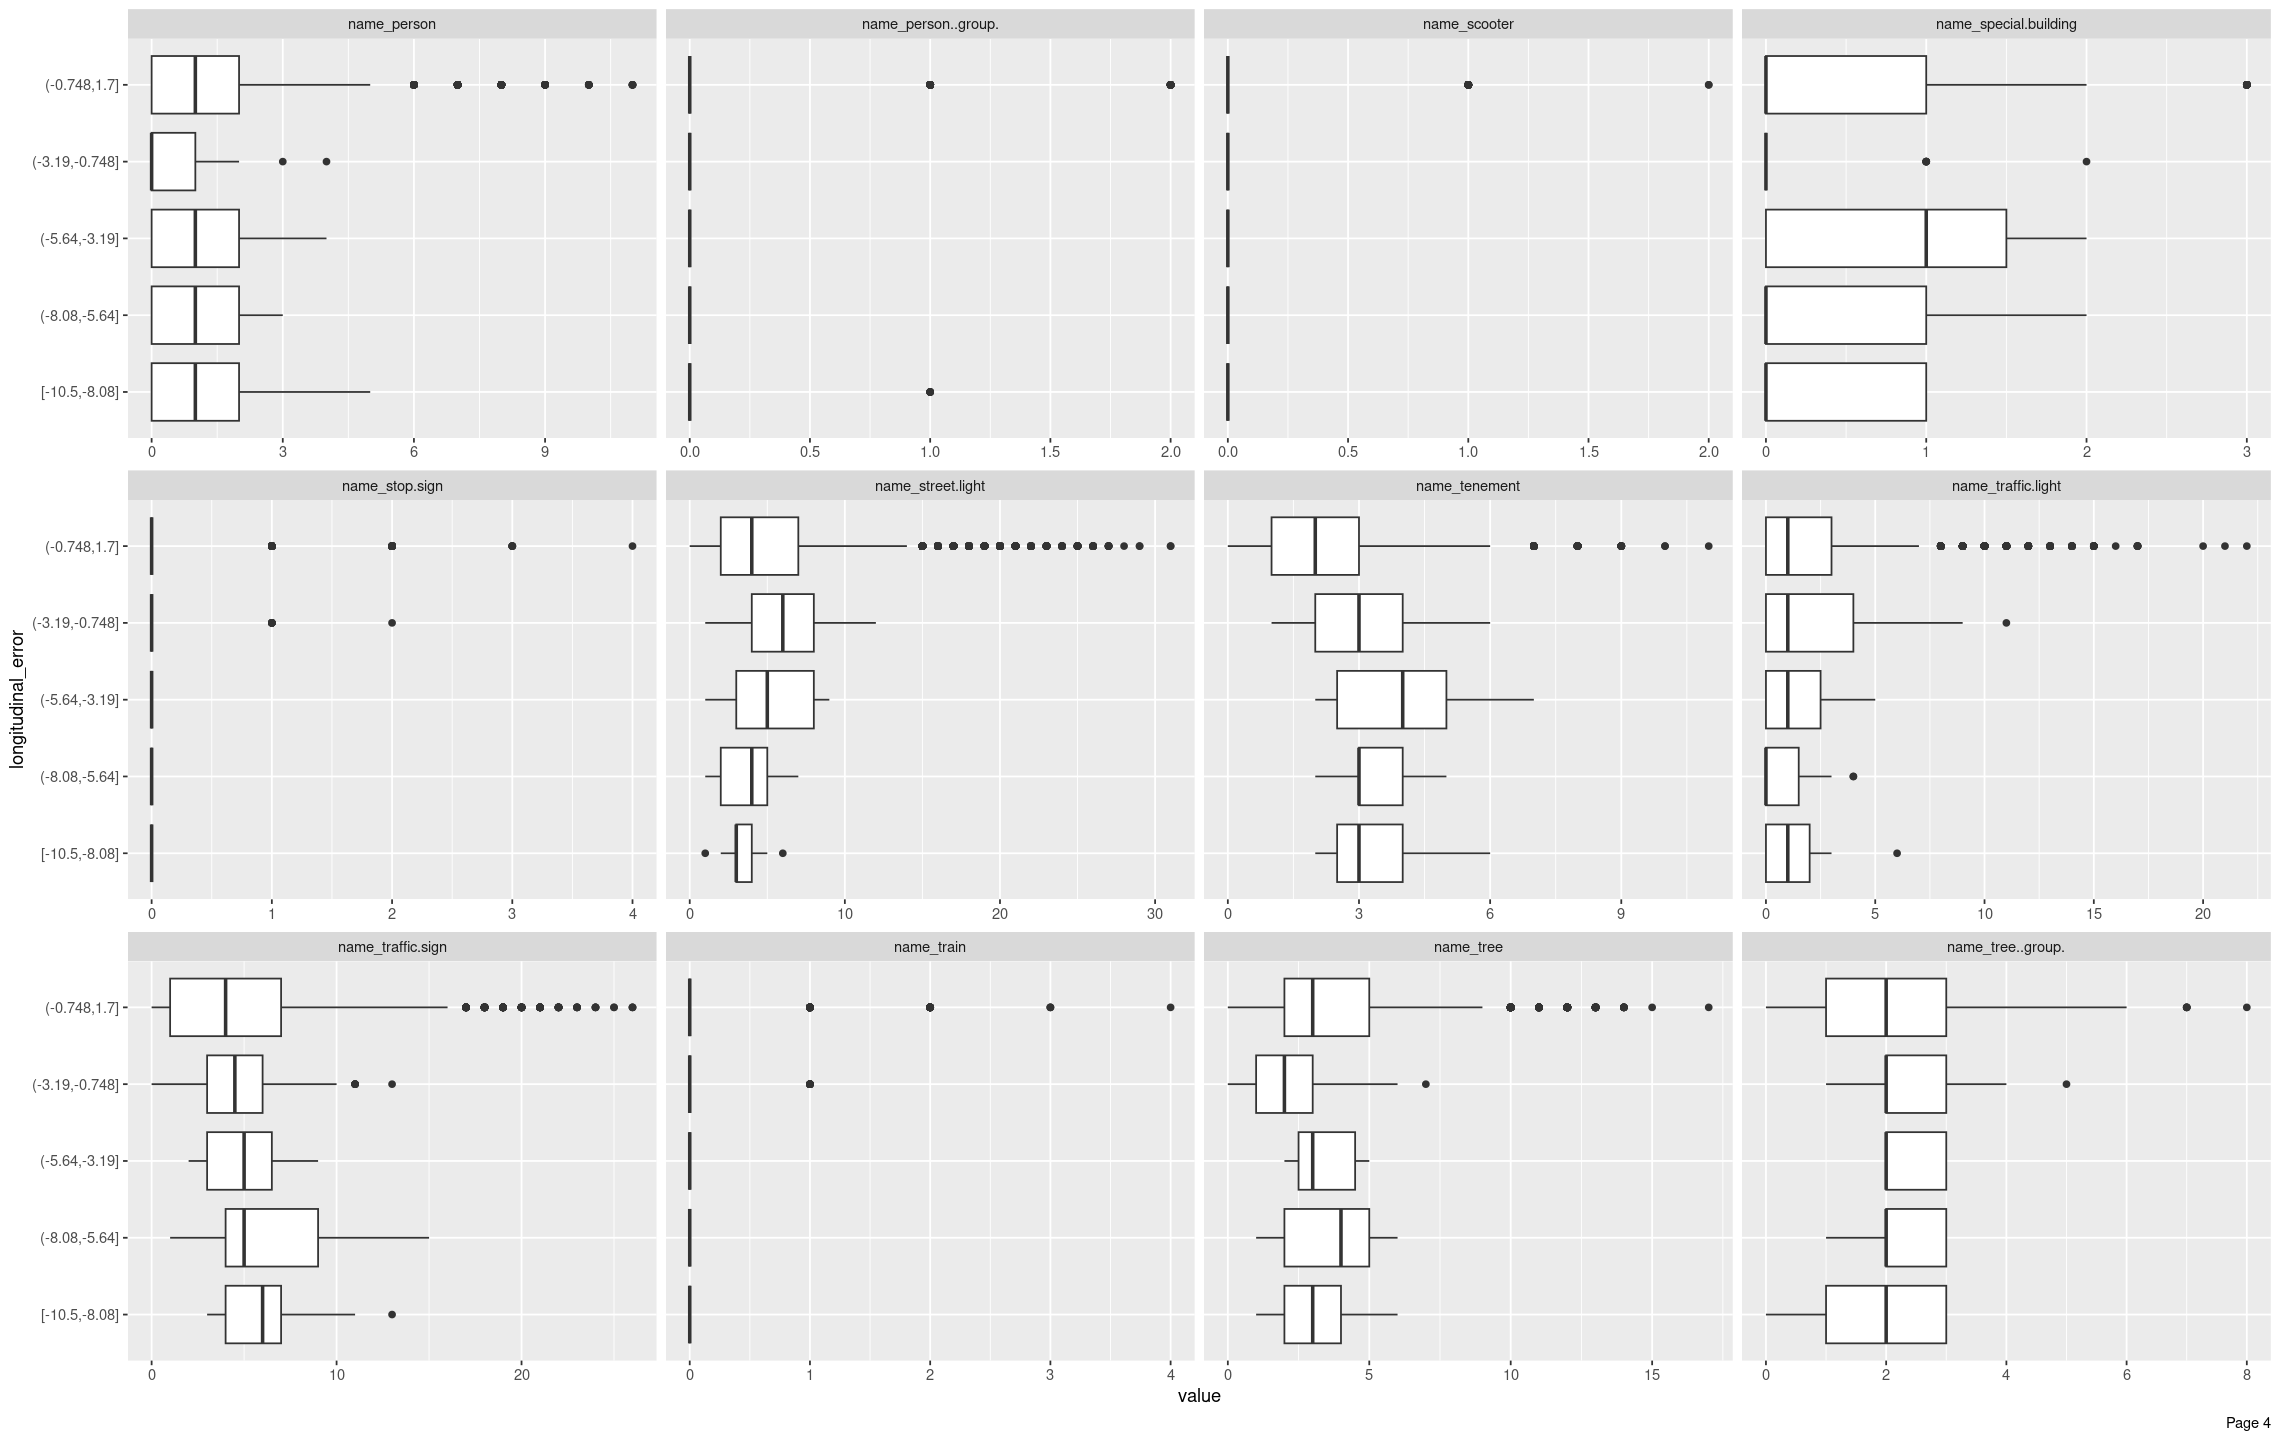

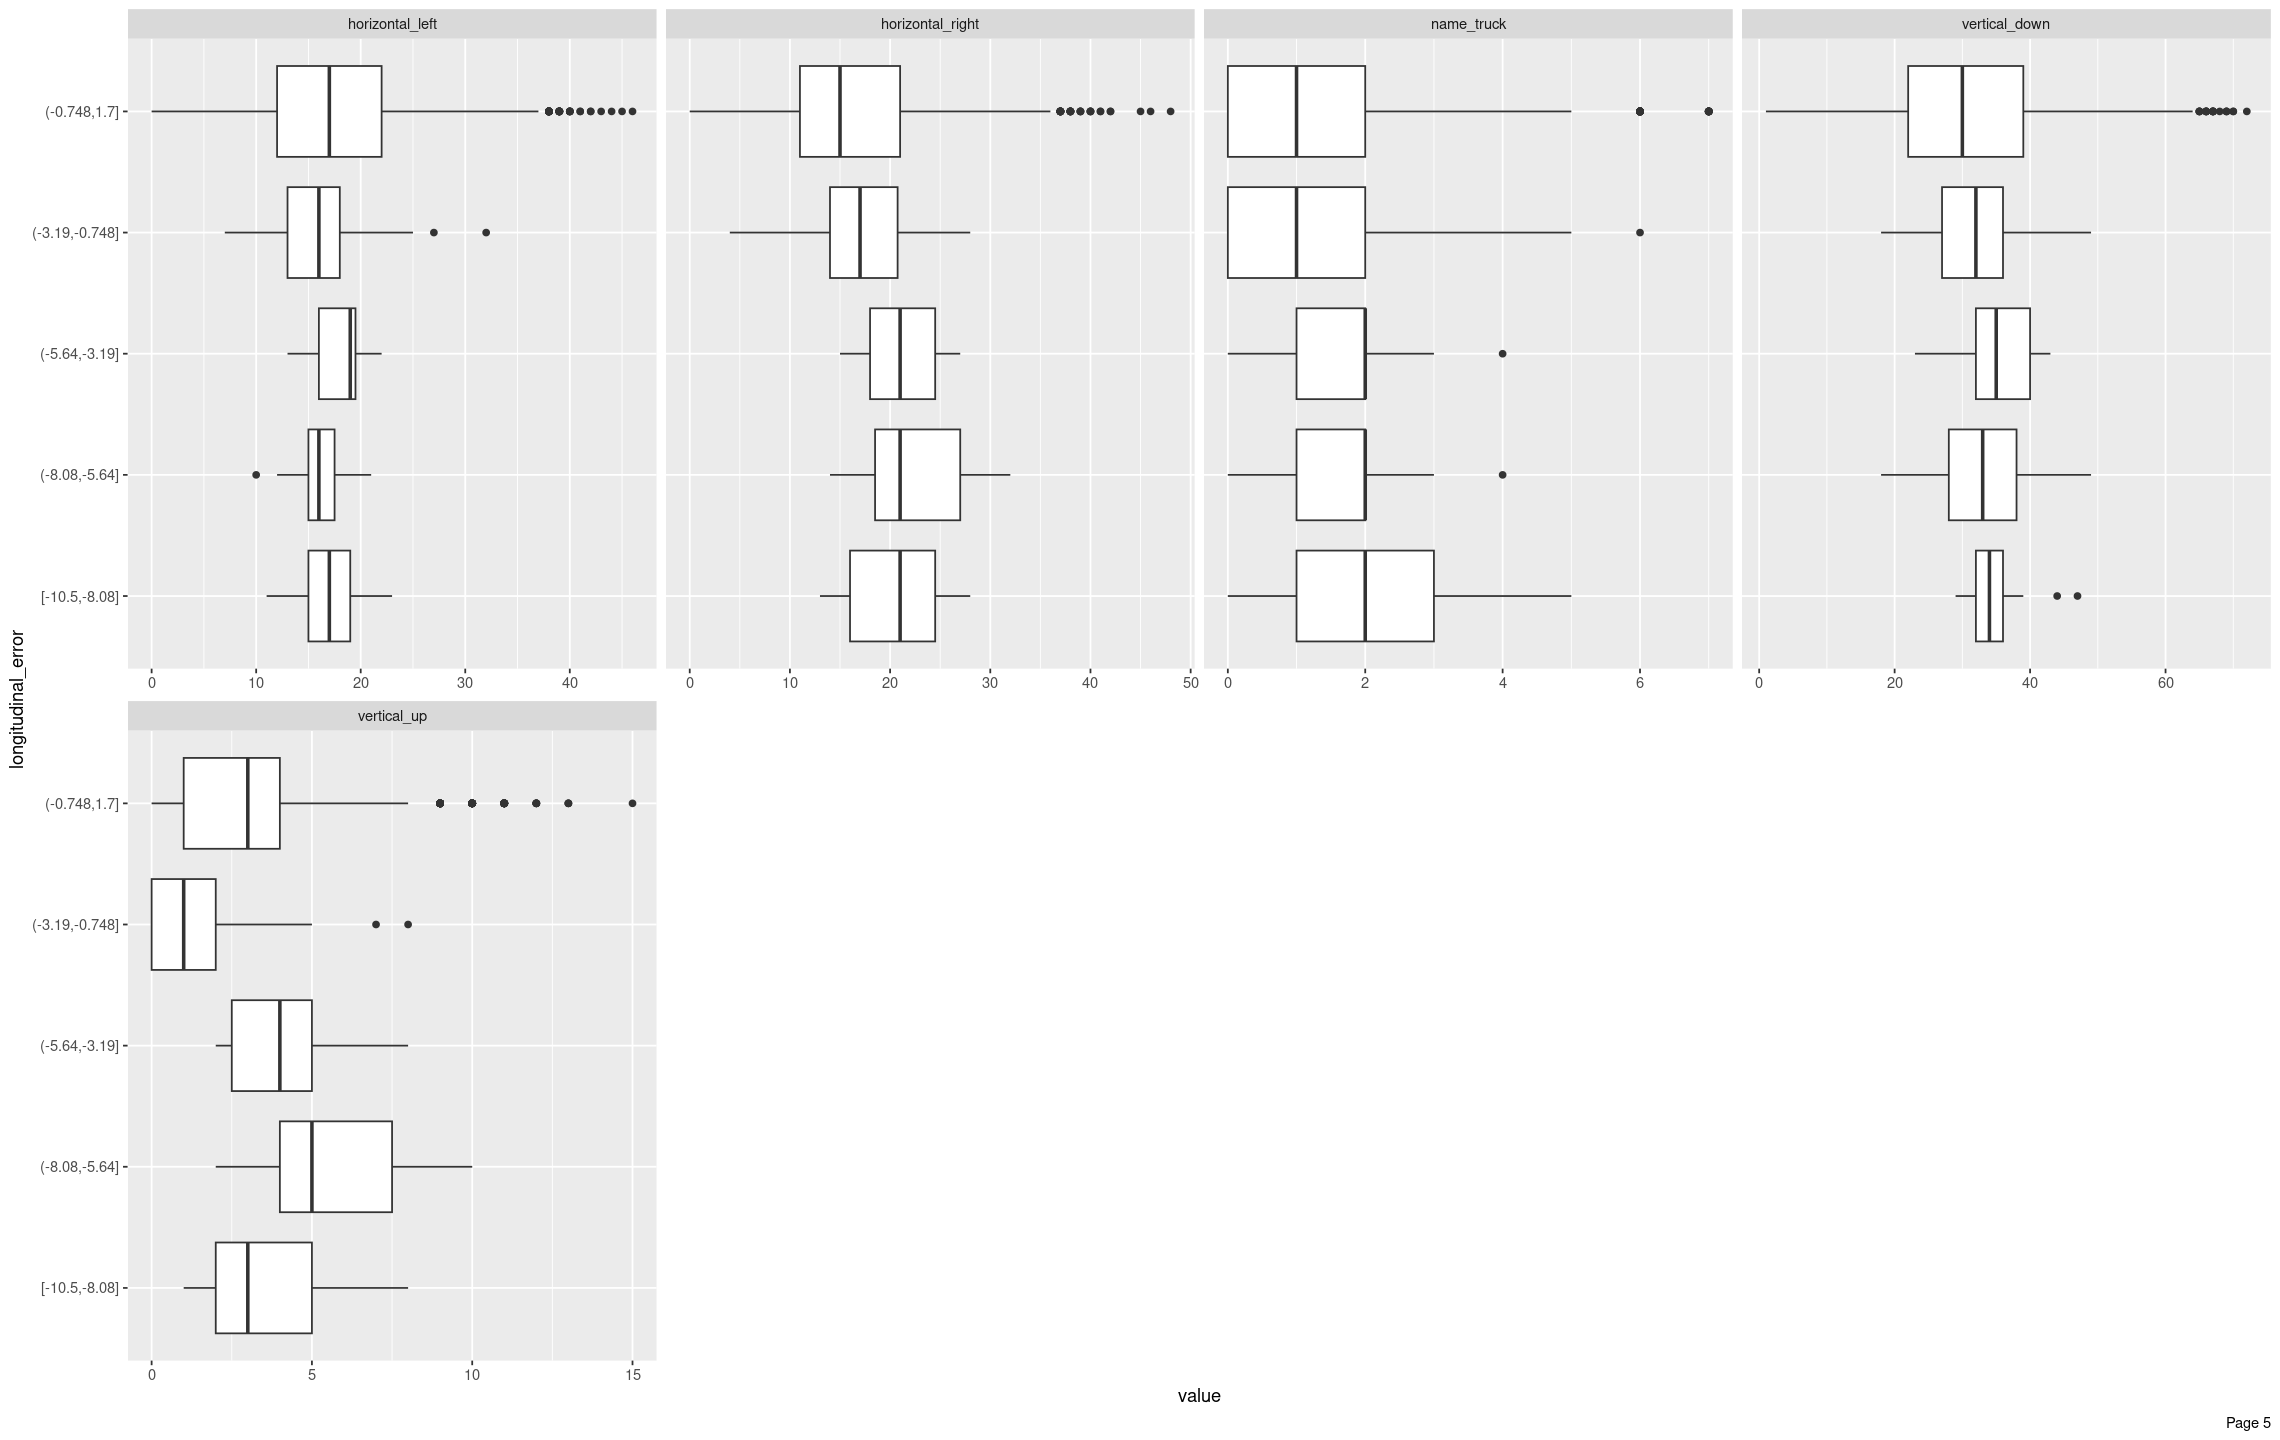

In [33]:
plot_boxplot(na.omit(data), by="longitudinal_error")

# Scatter plot 2D

## lateral_error

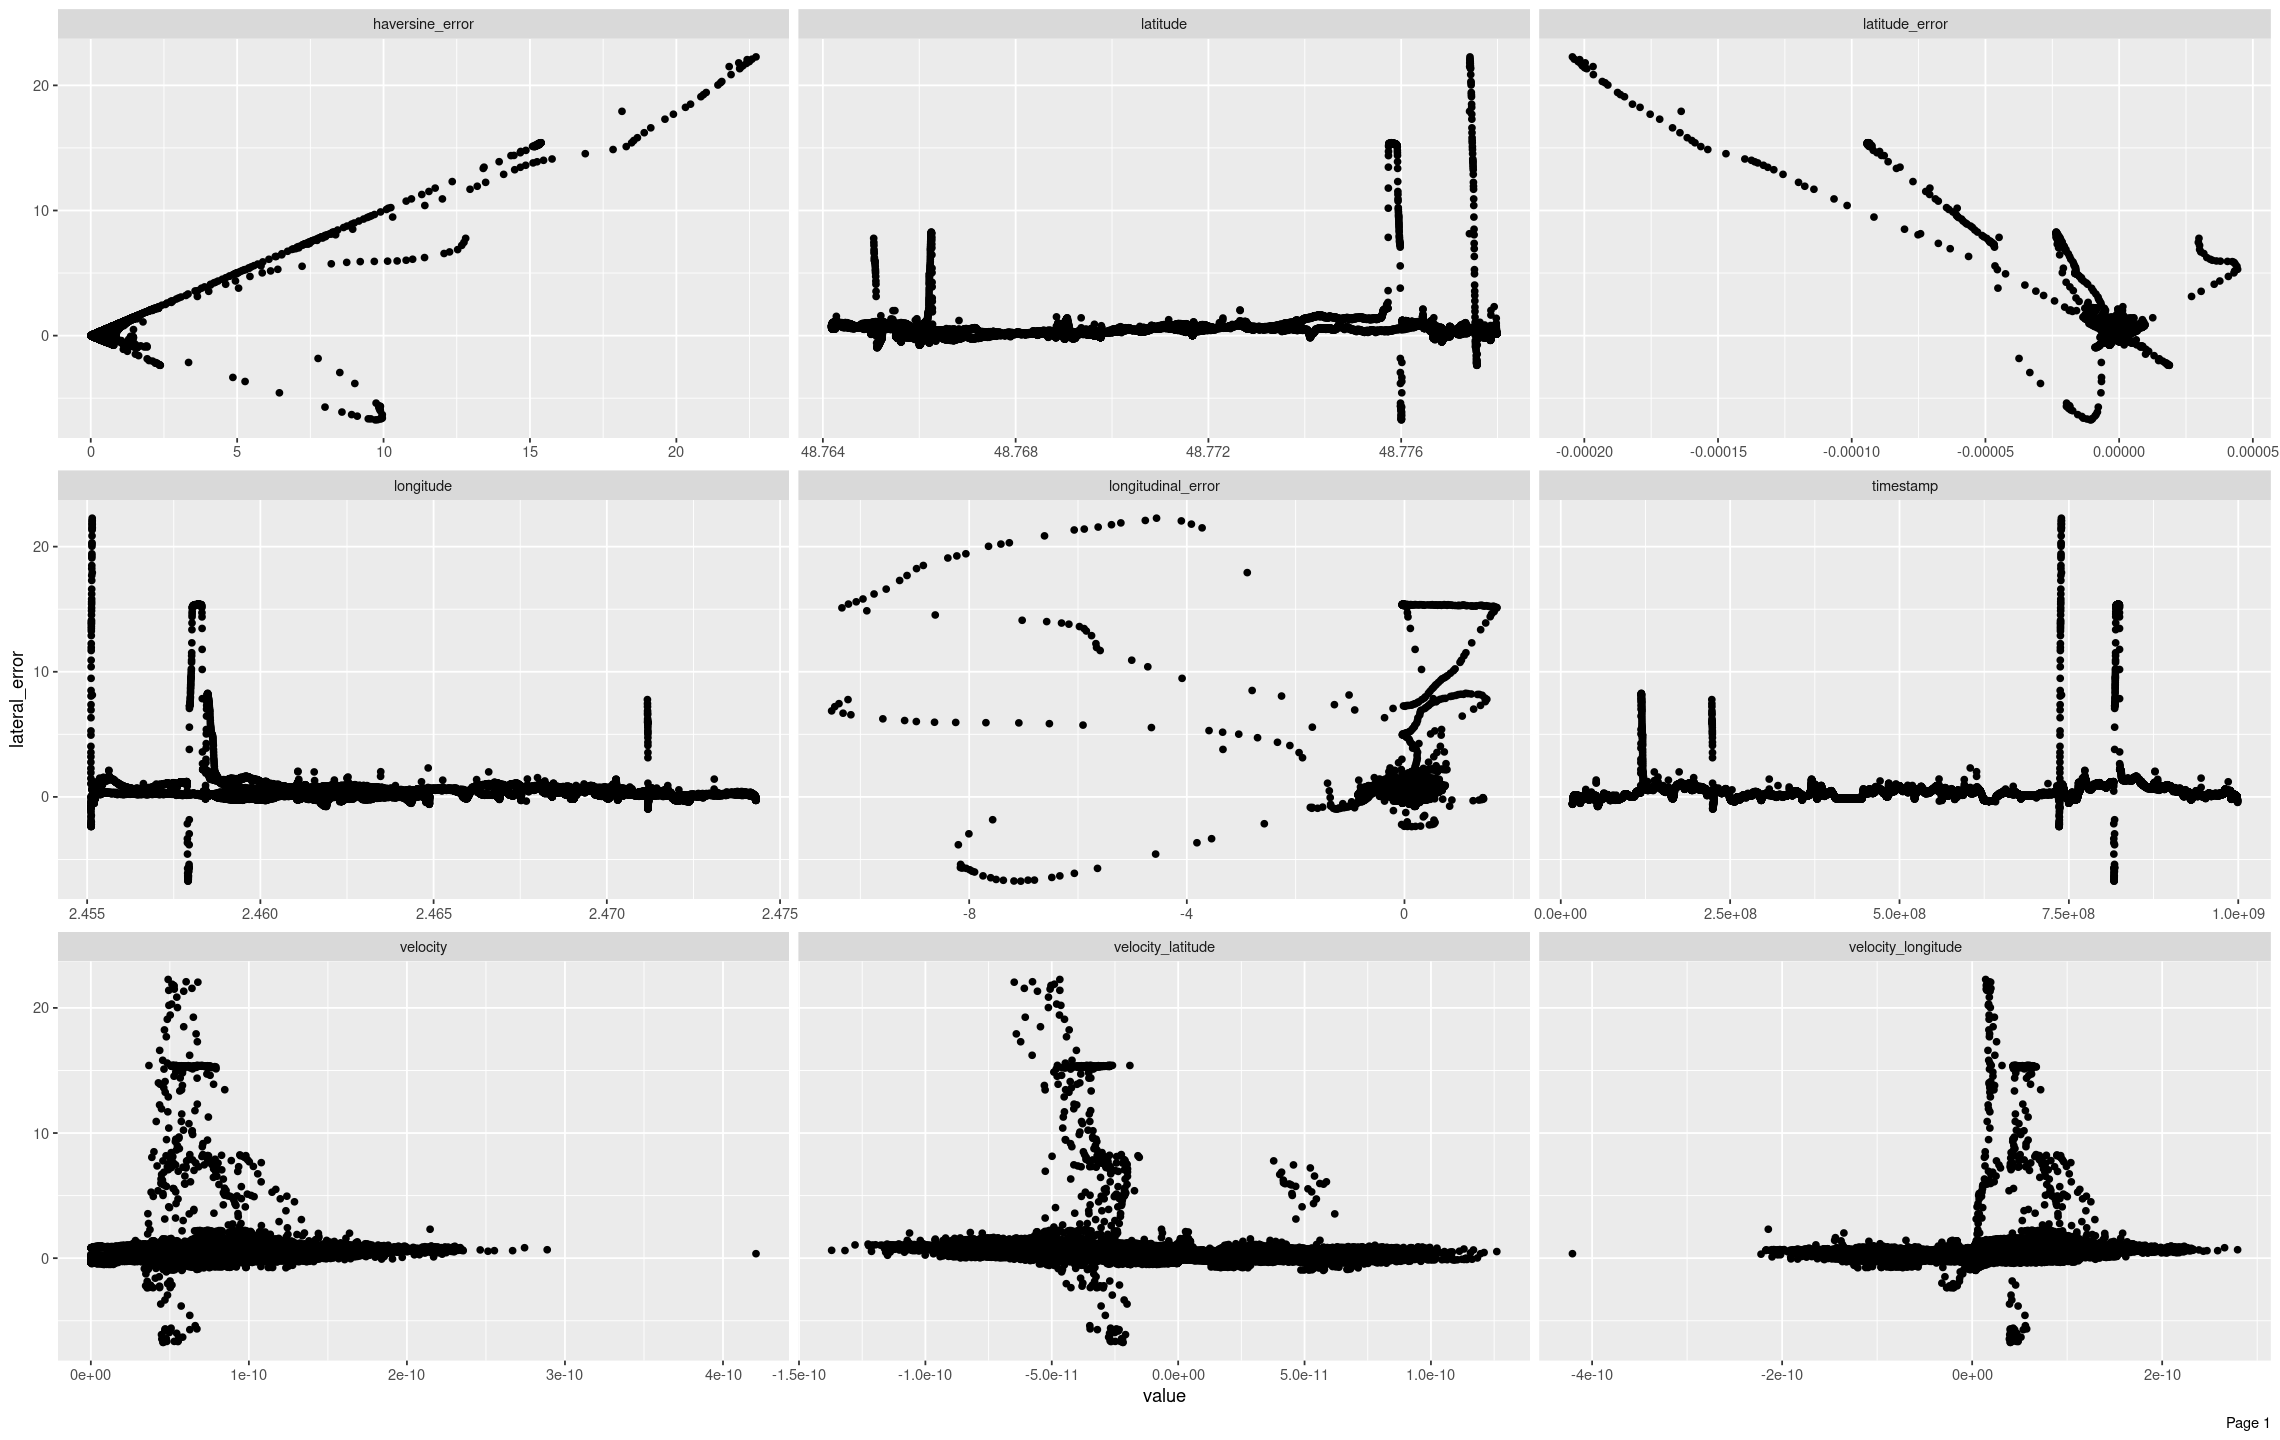

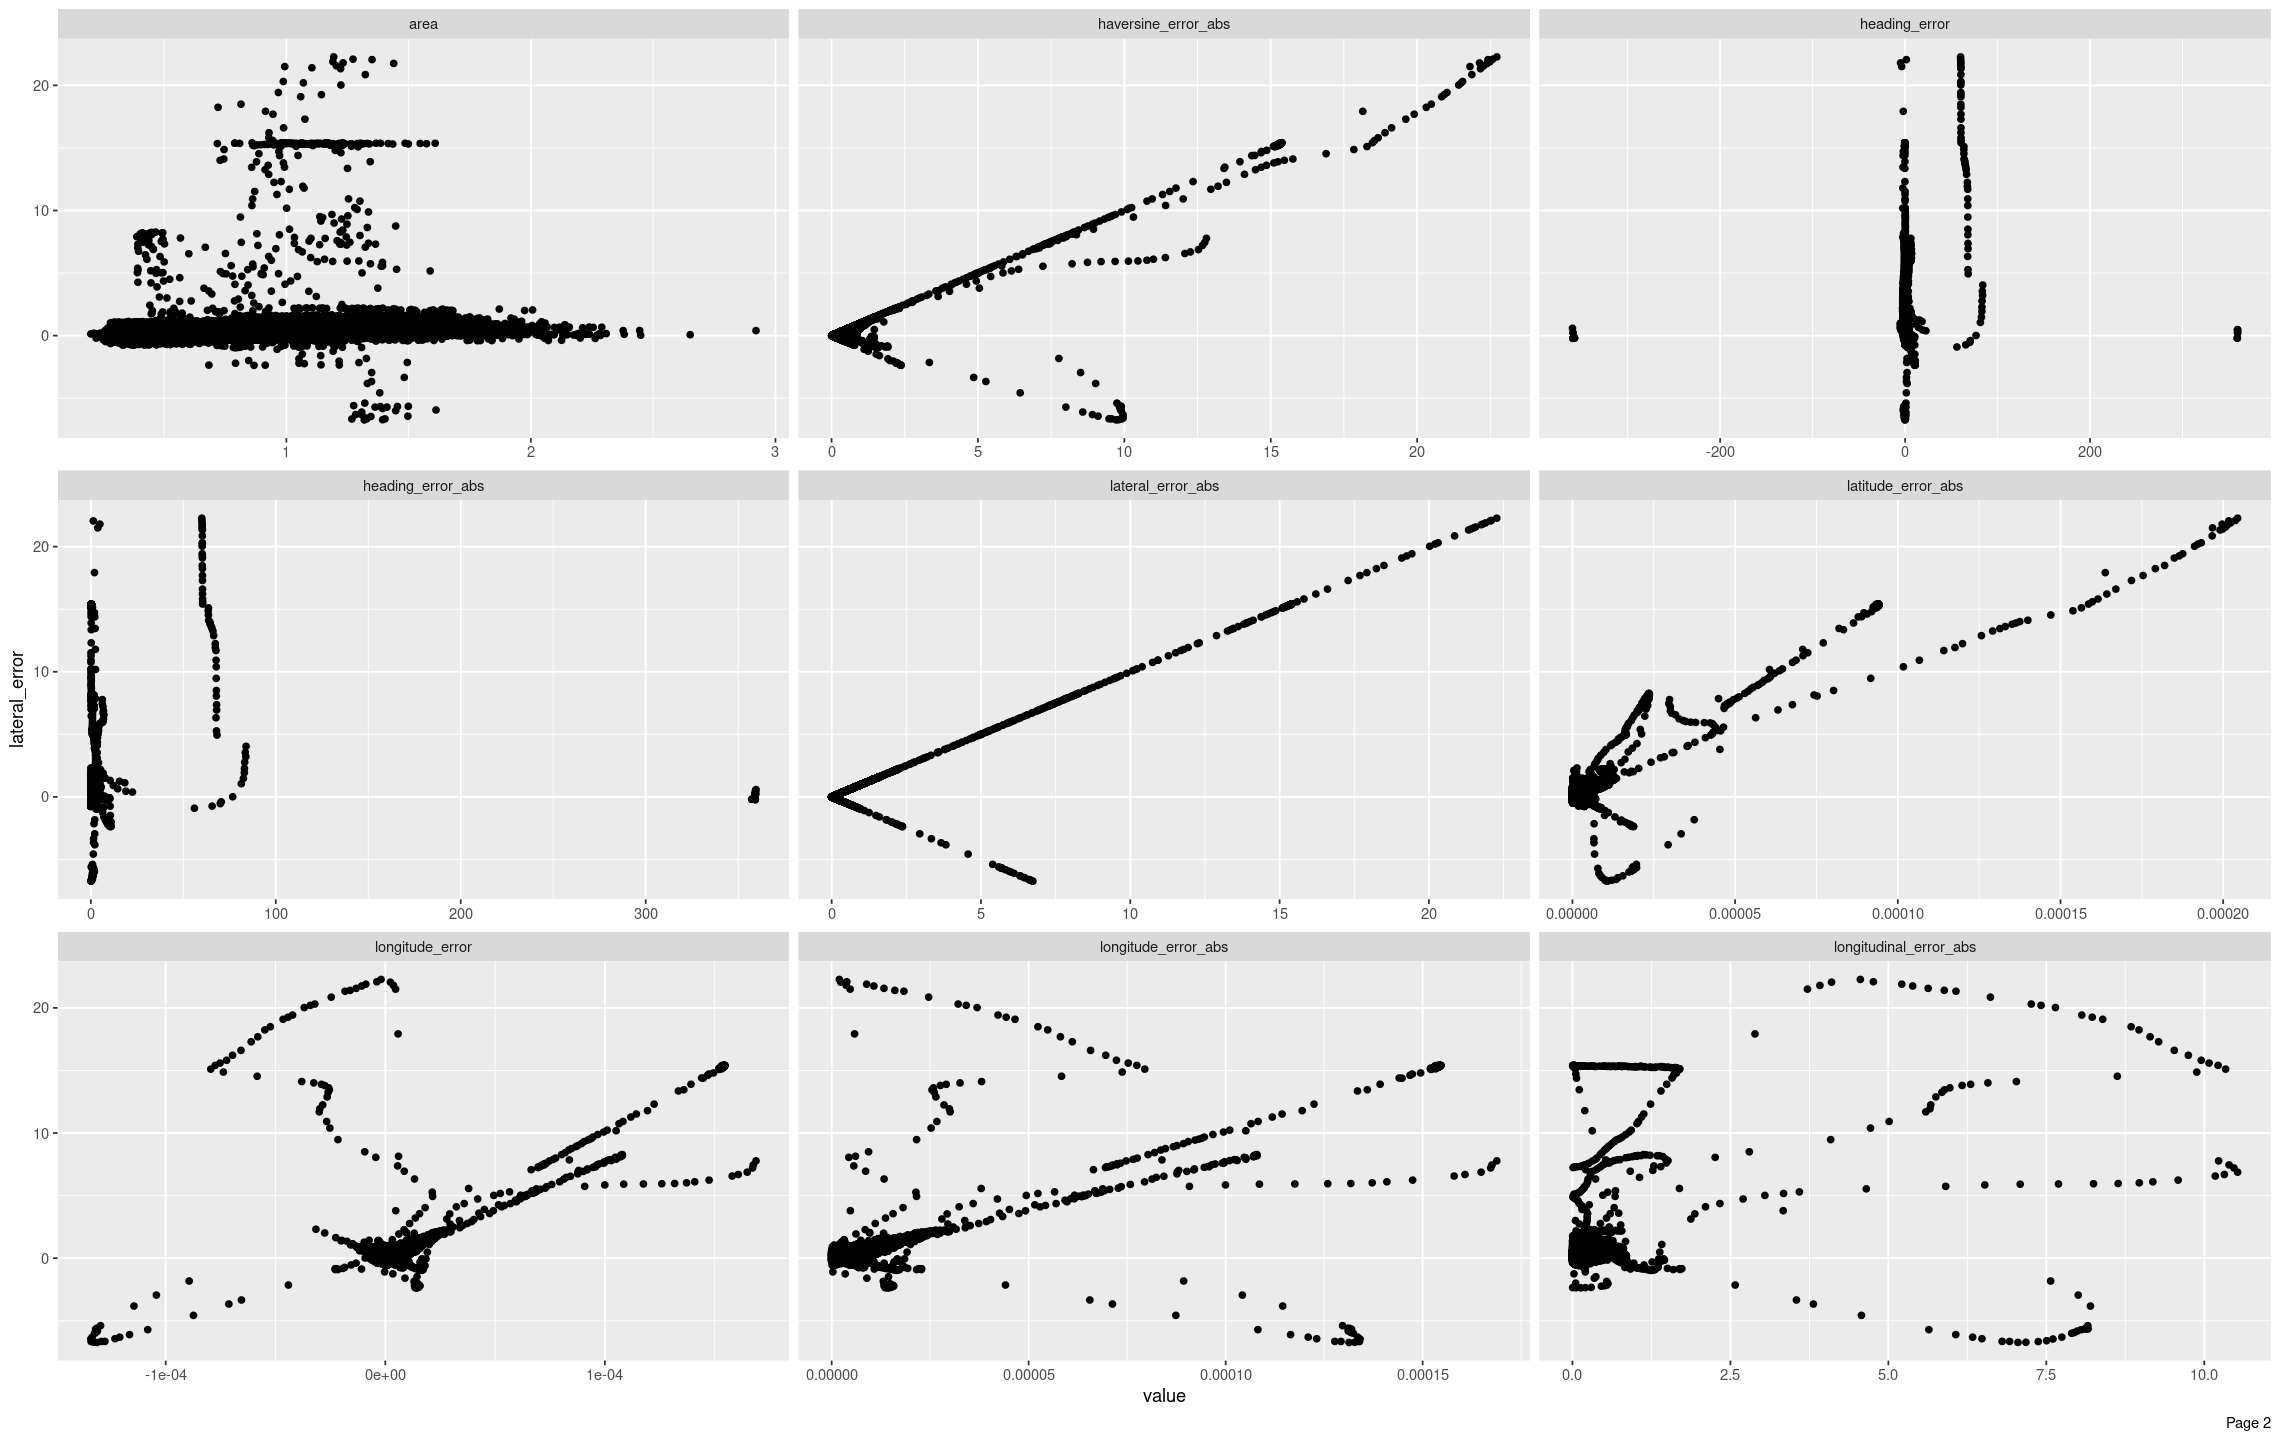

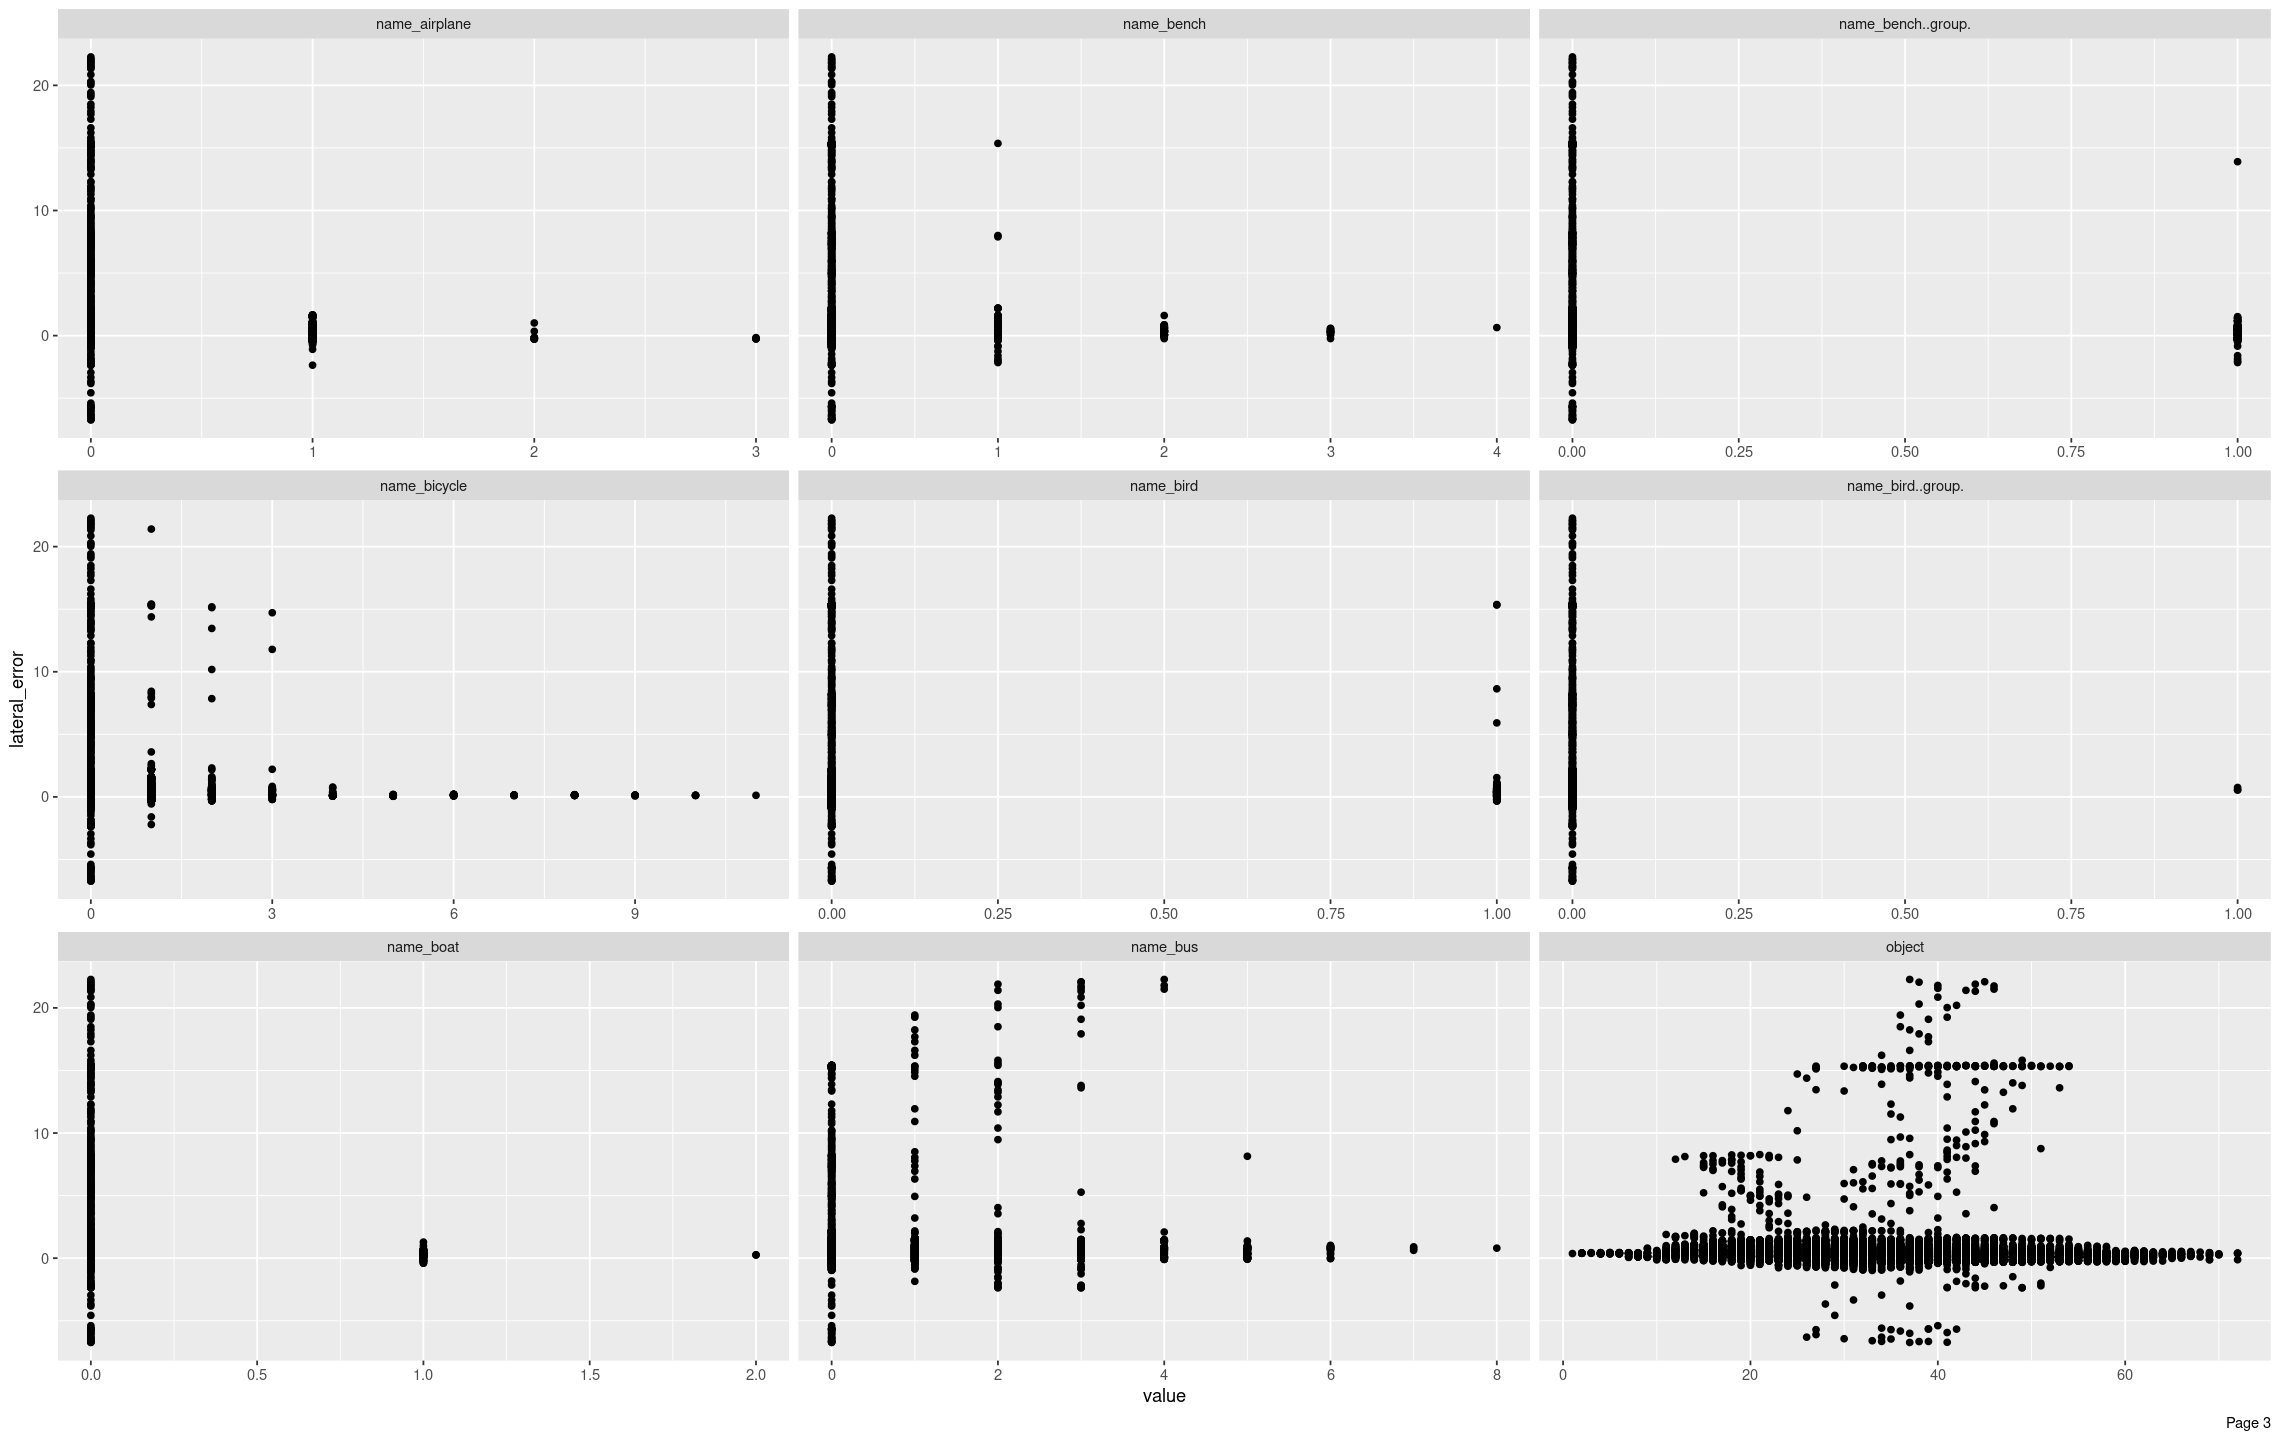

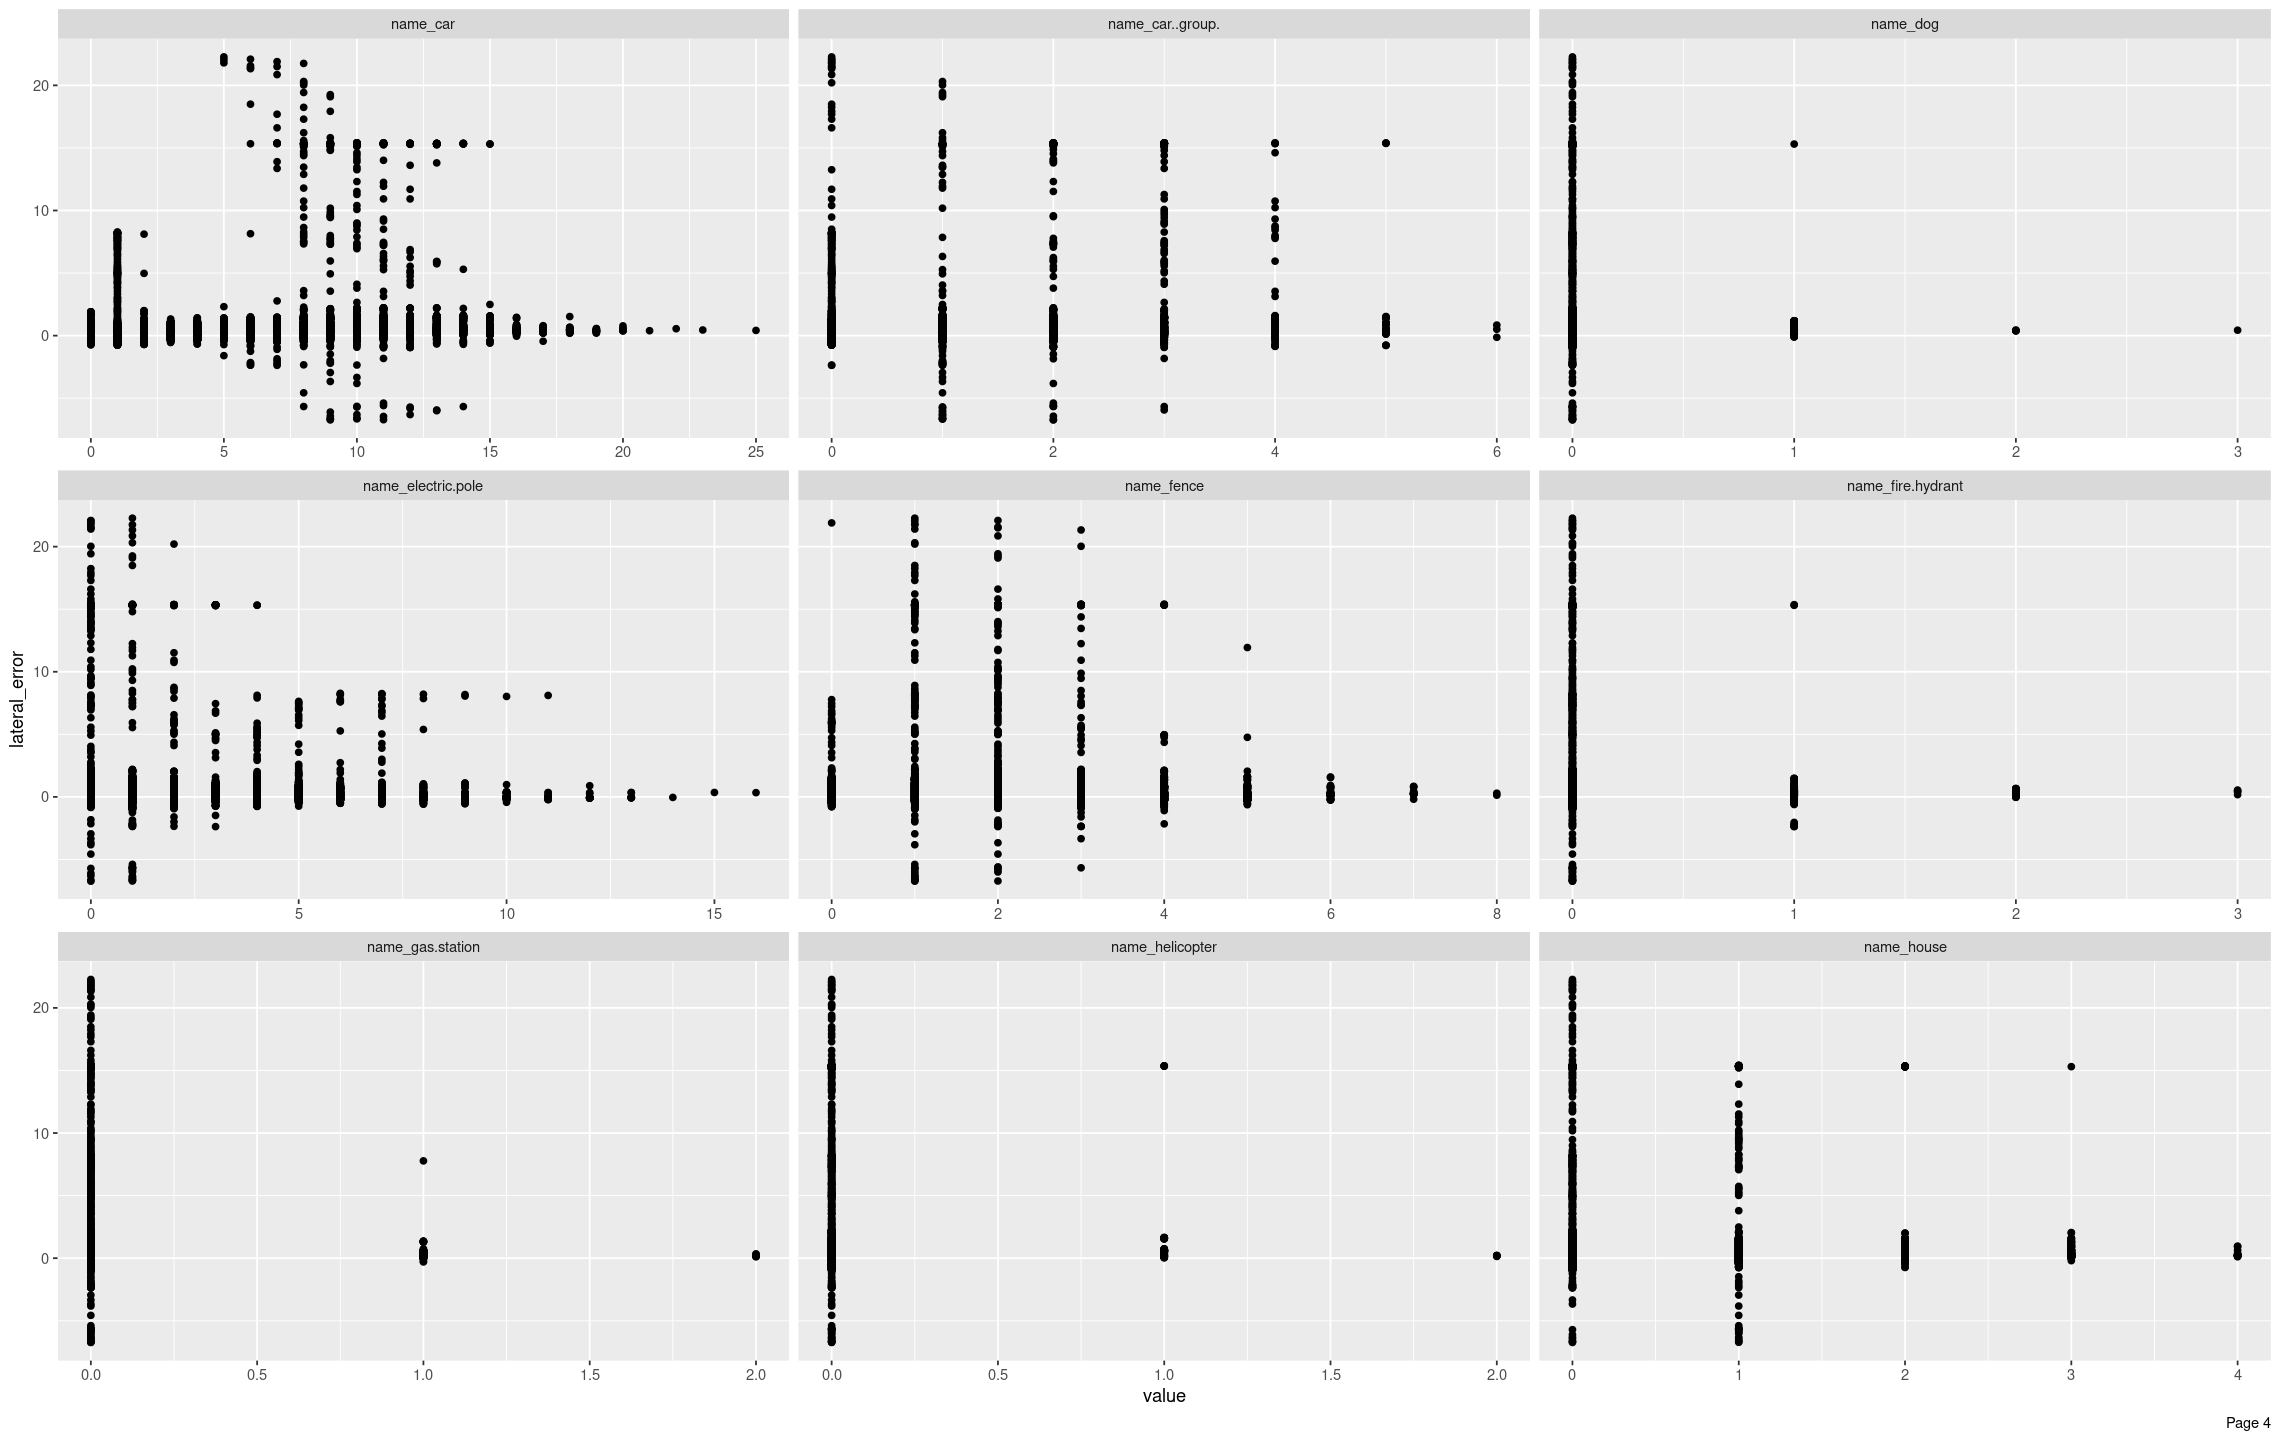

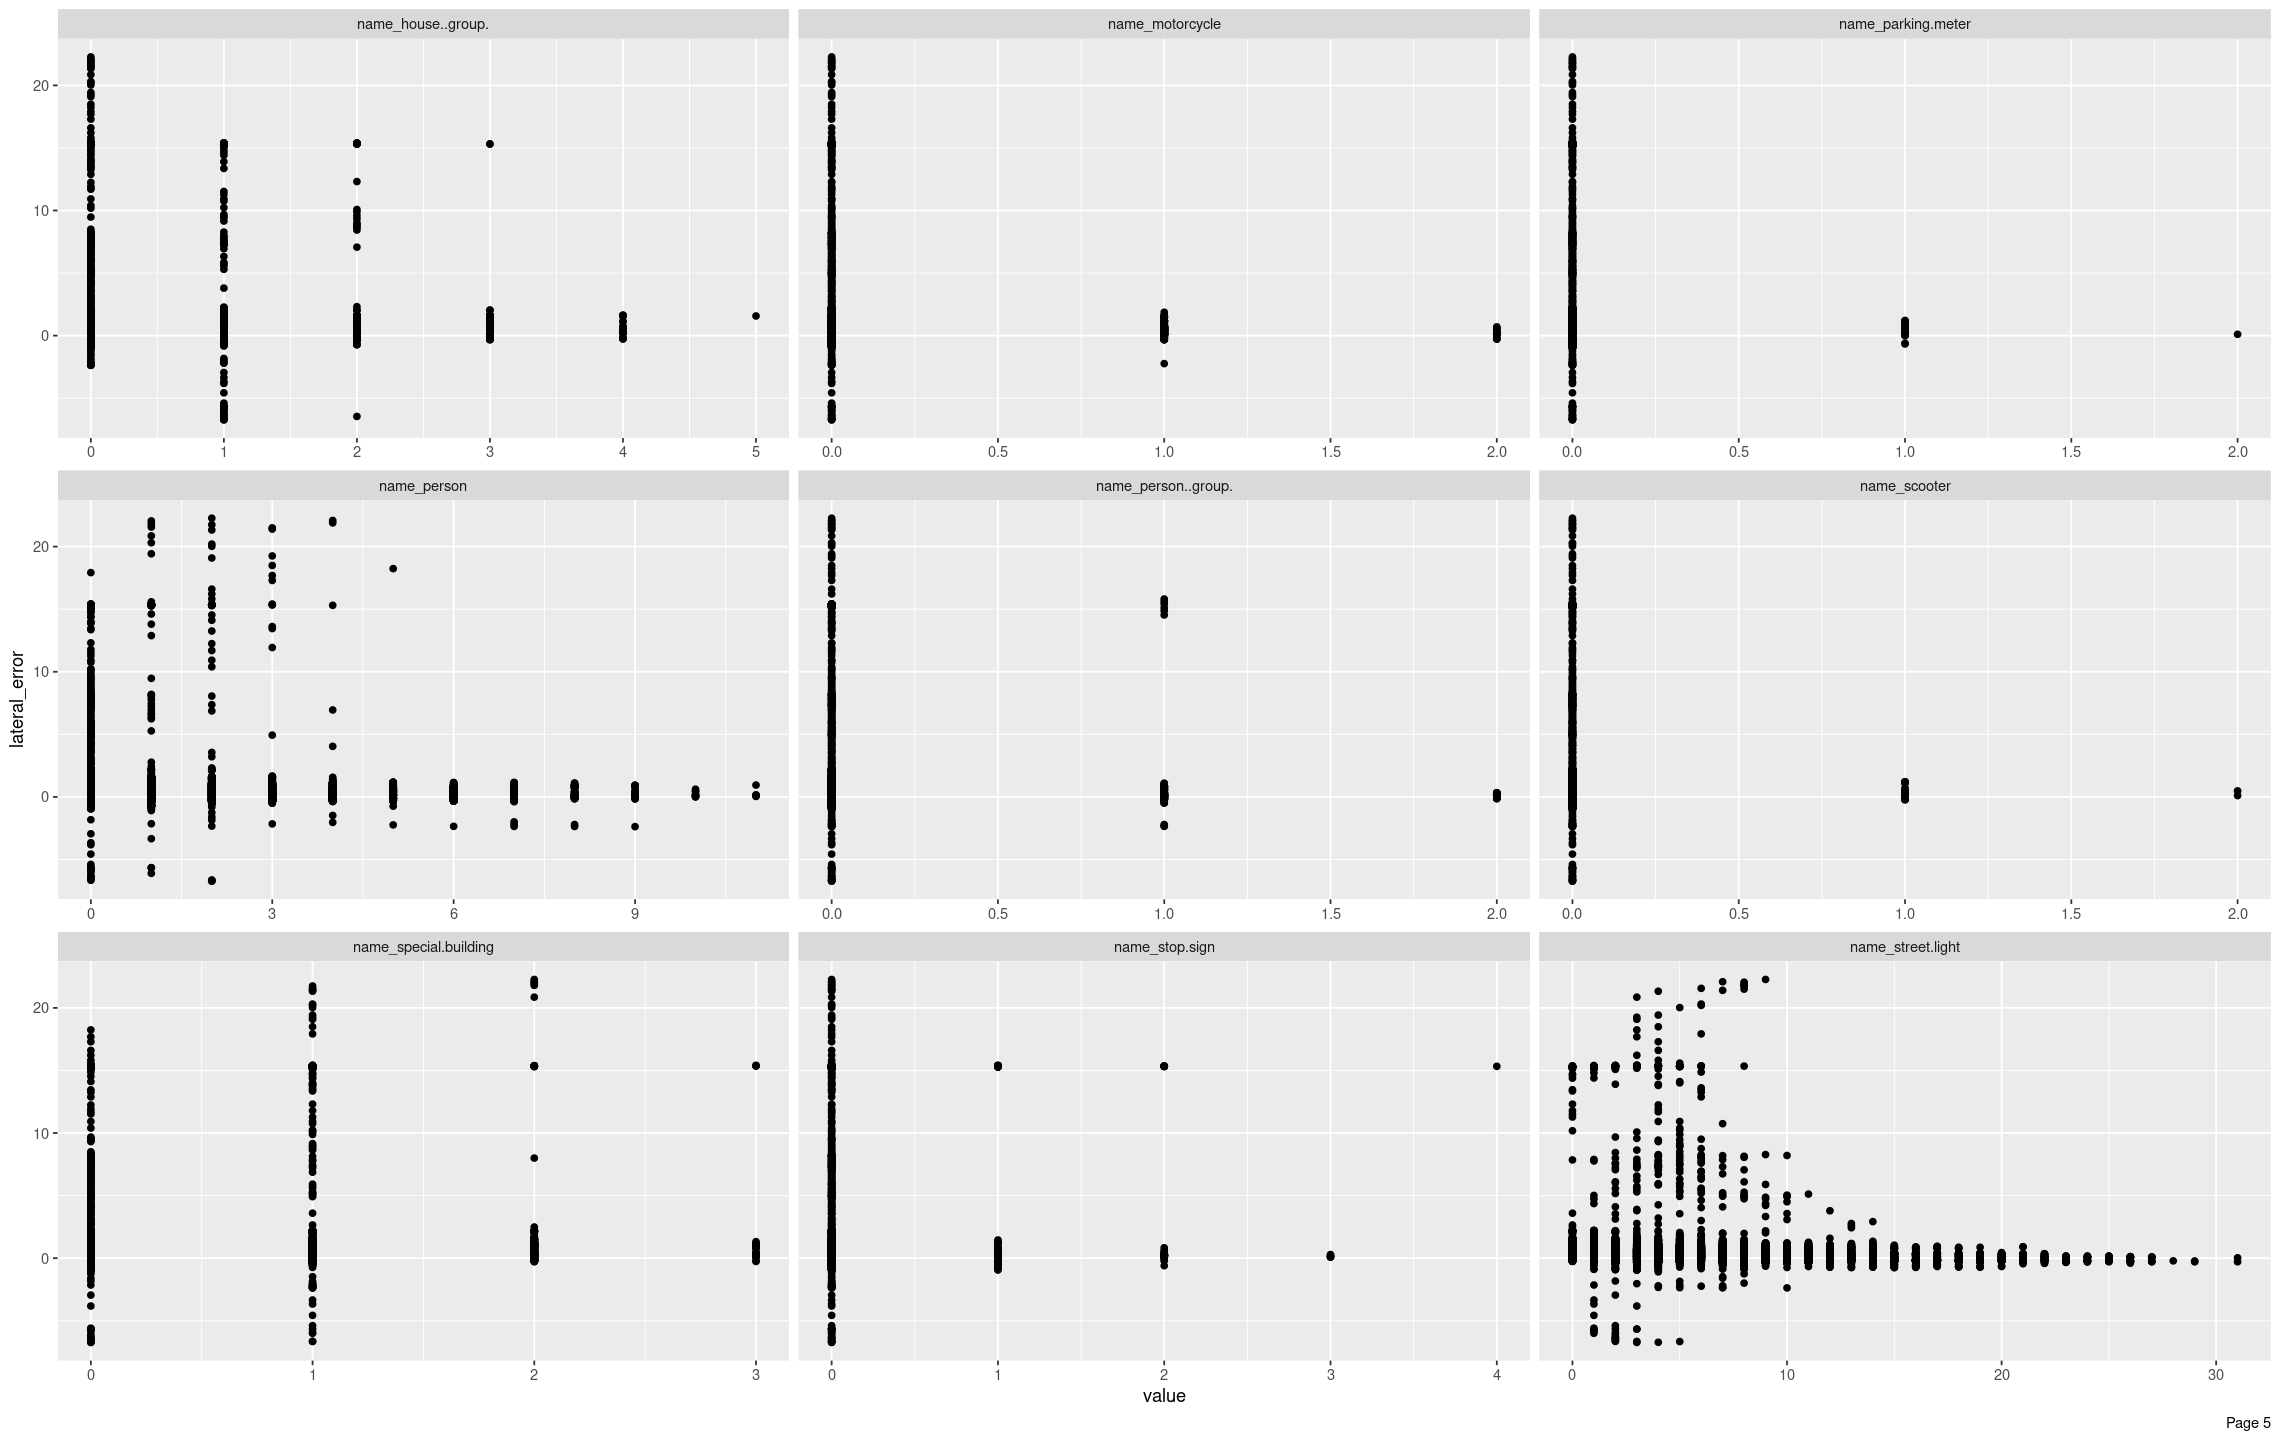

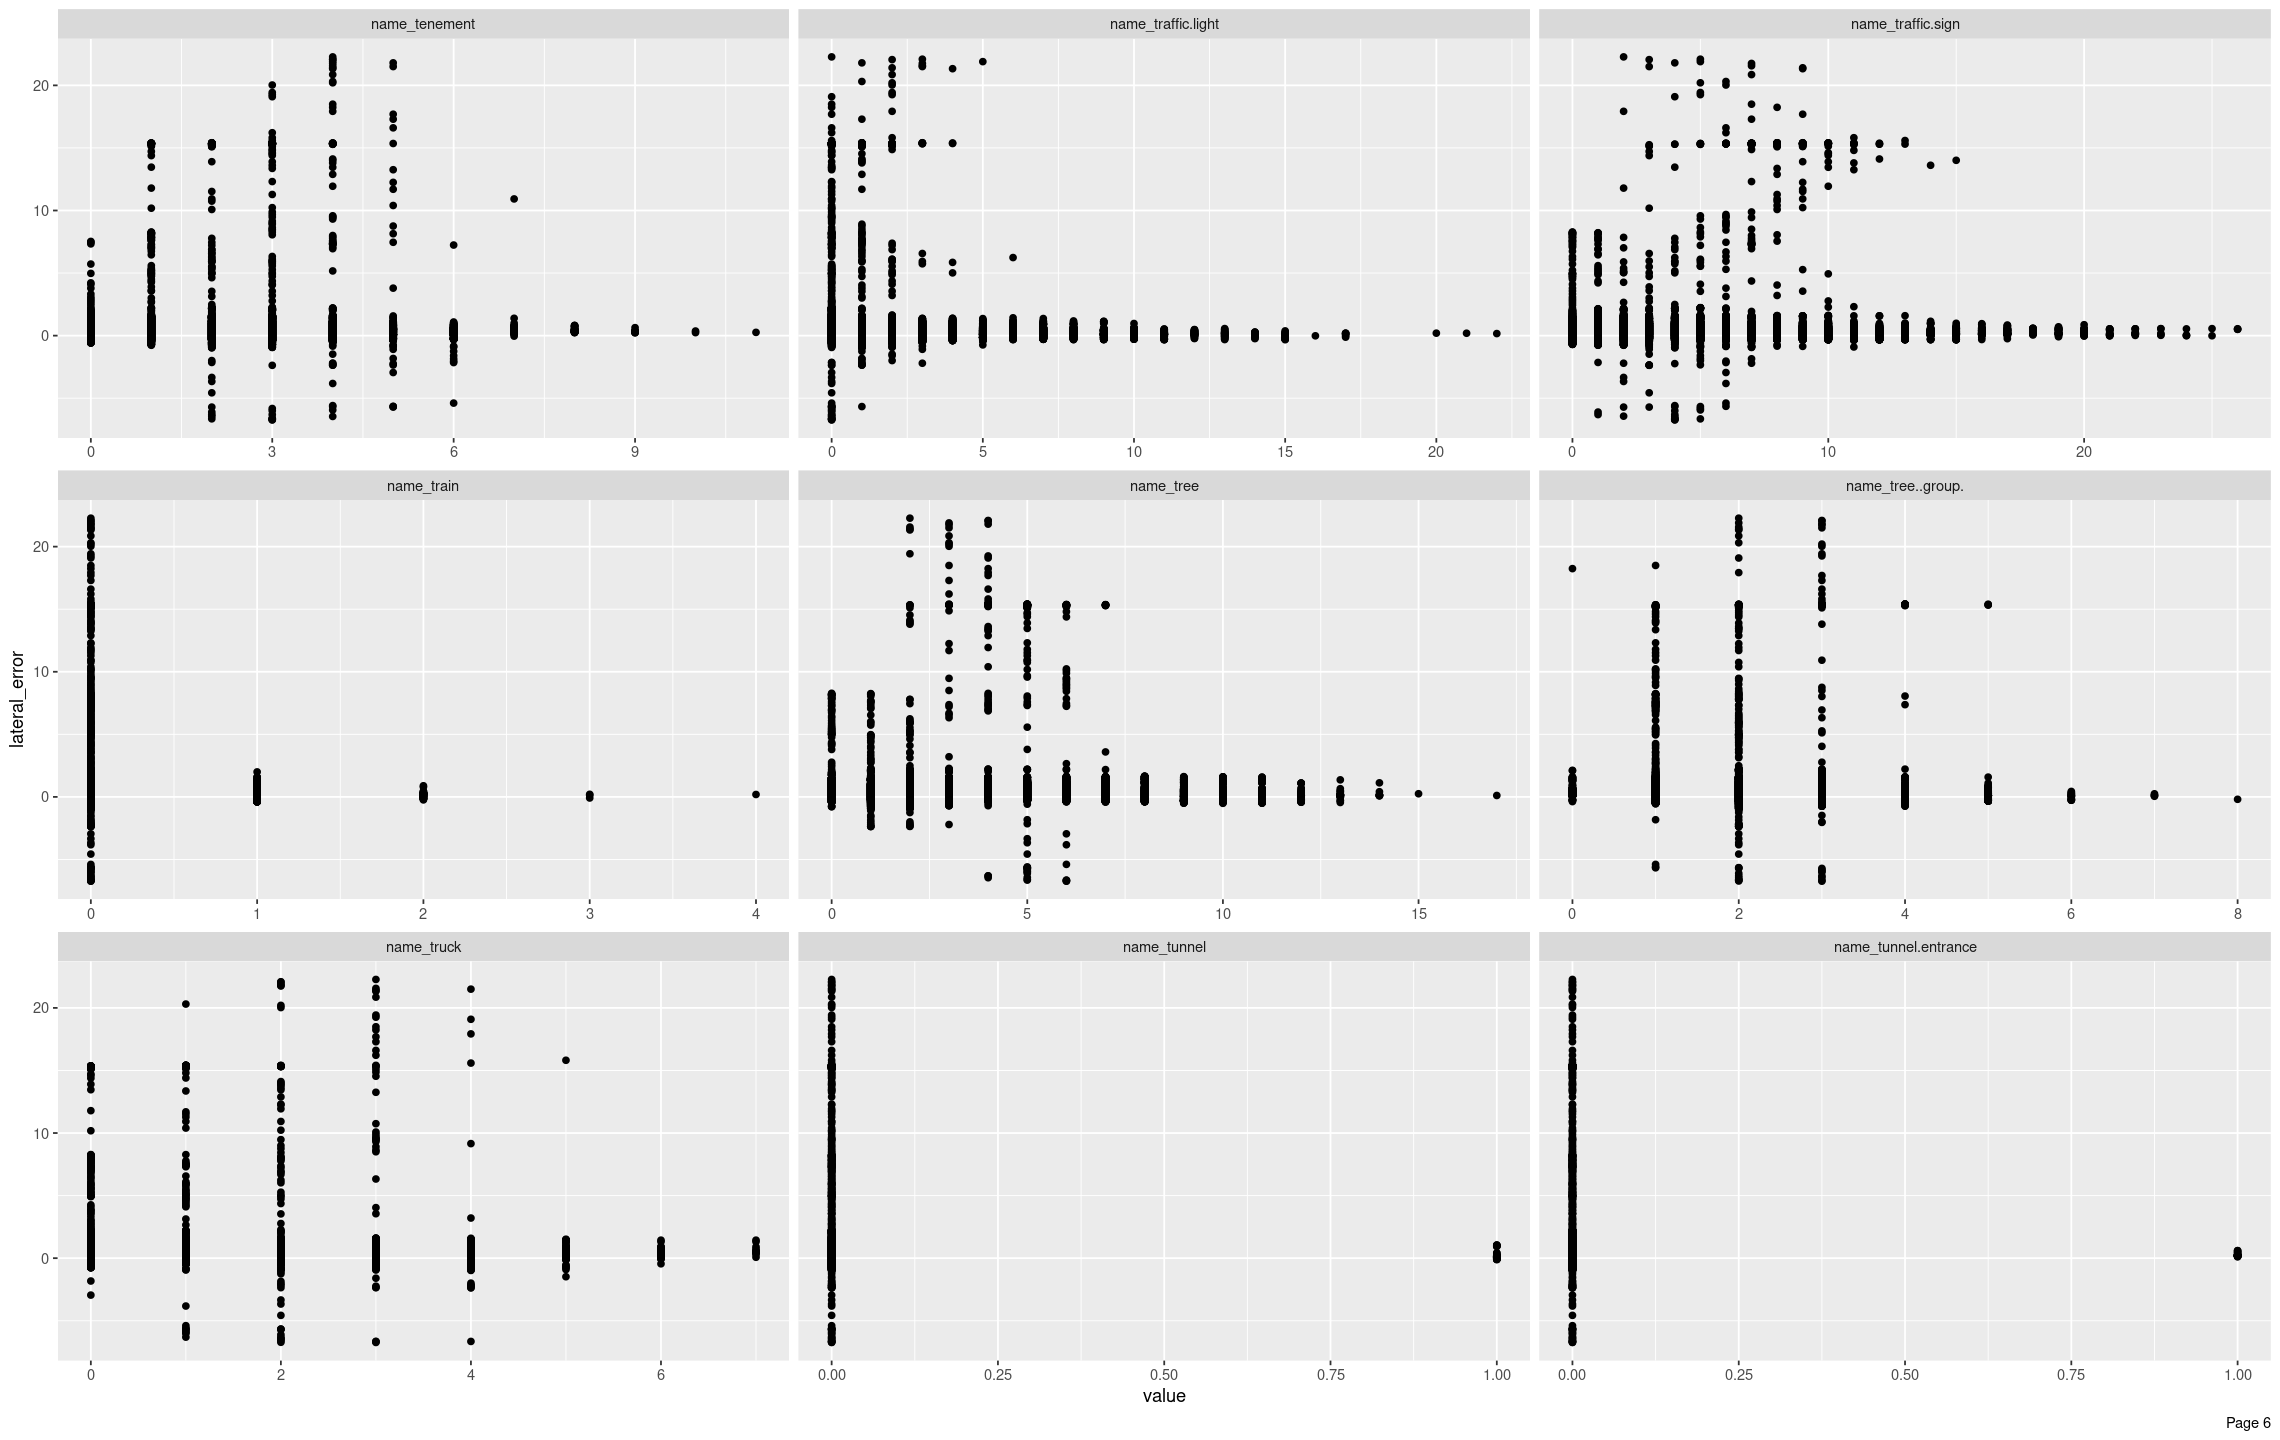

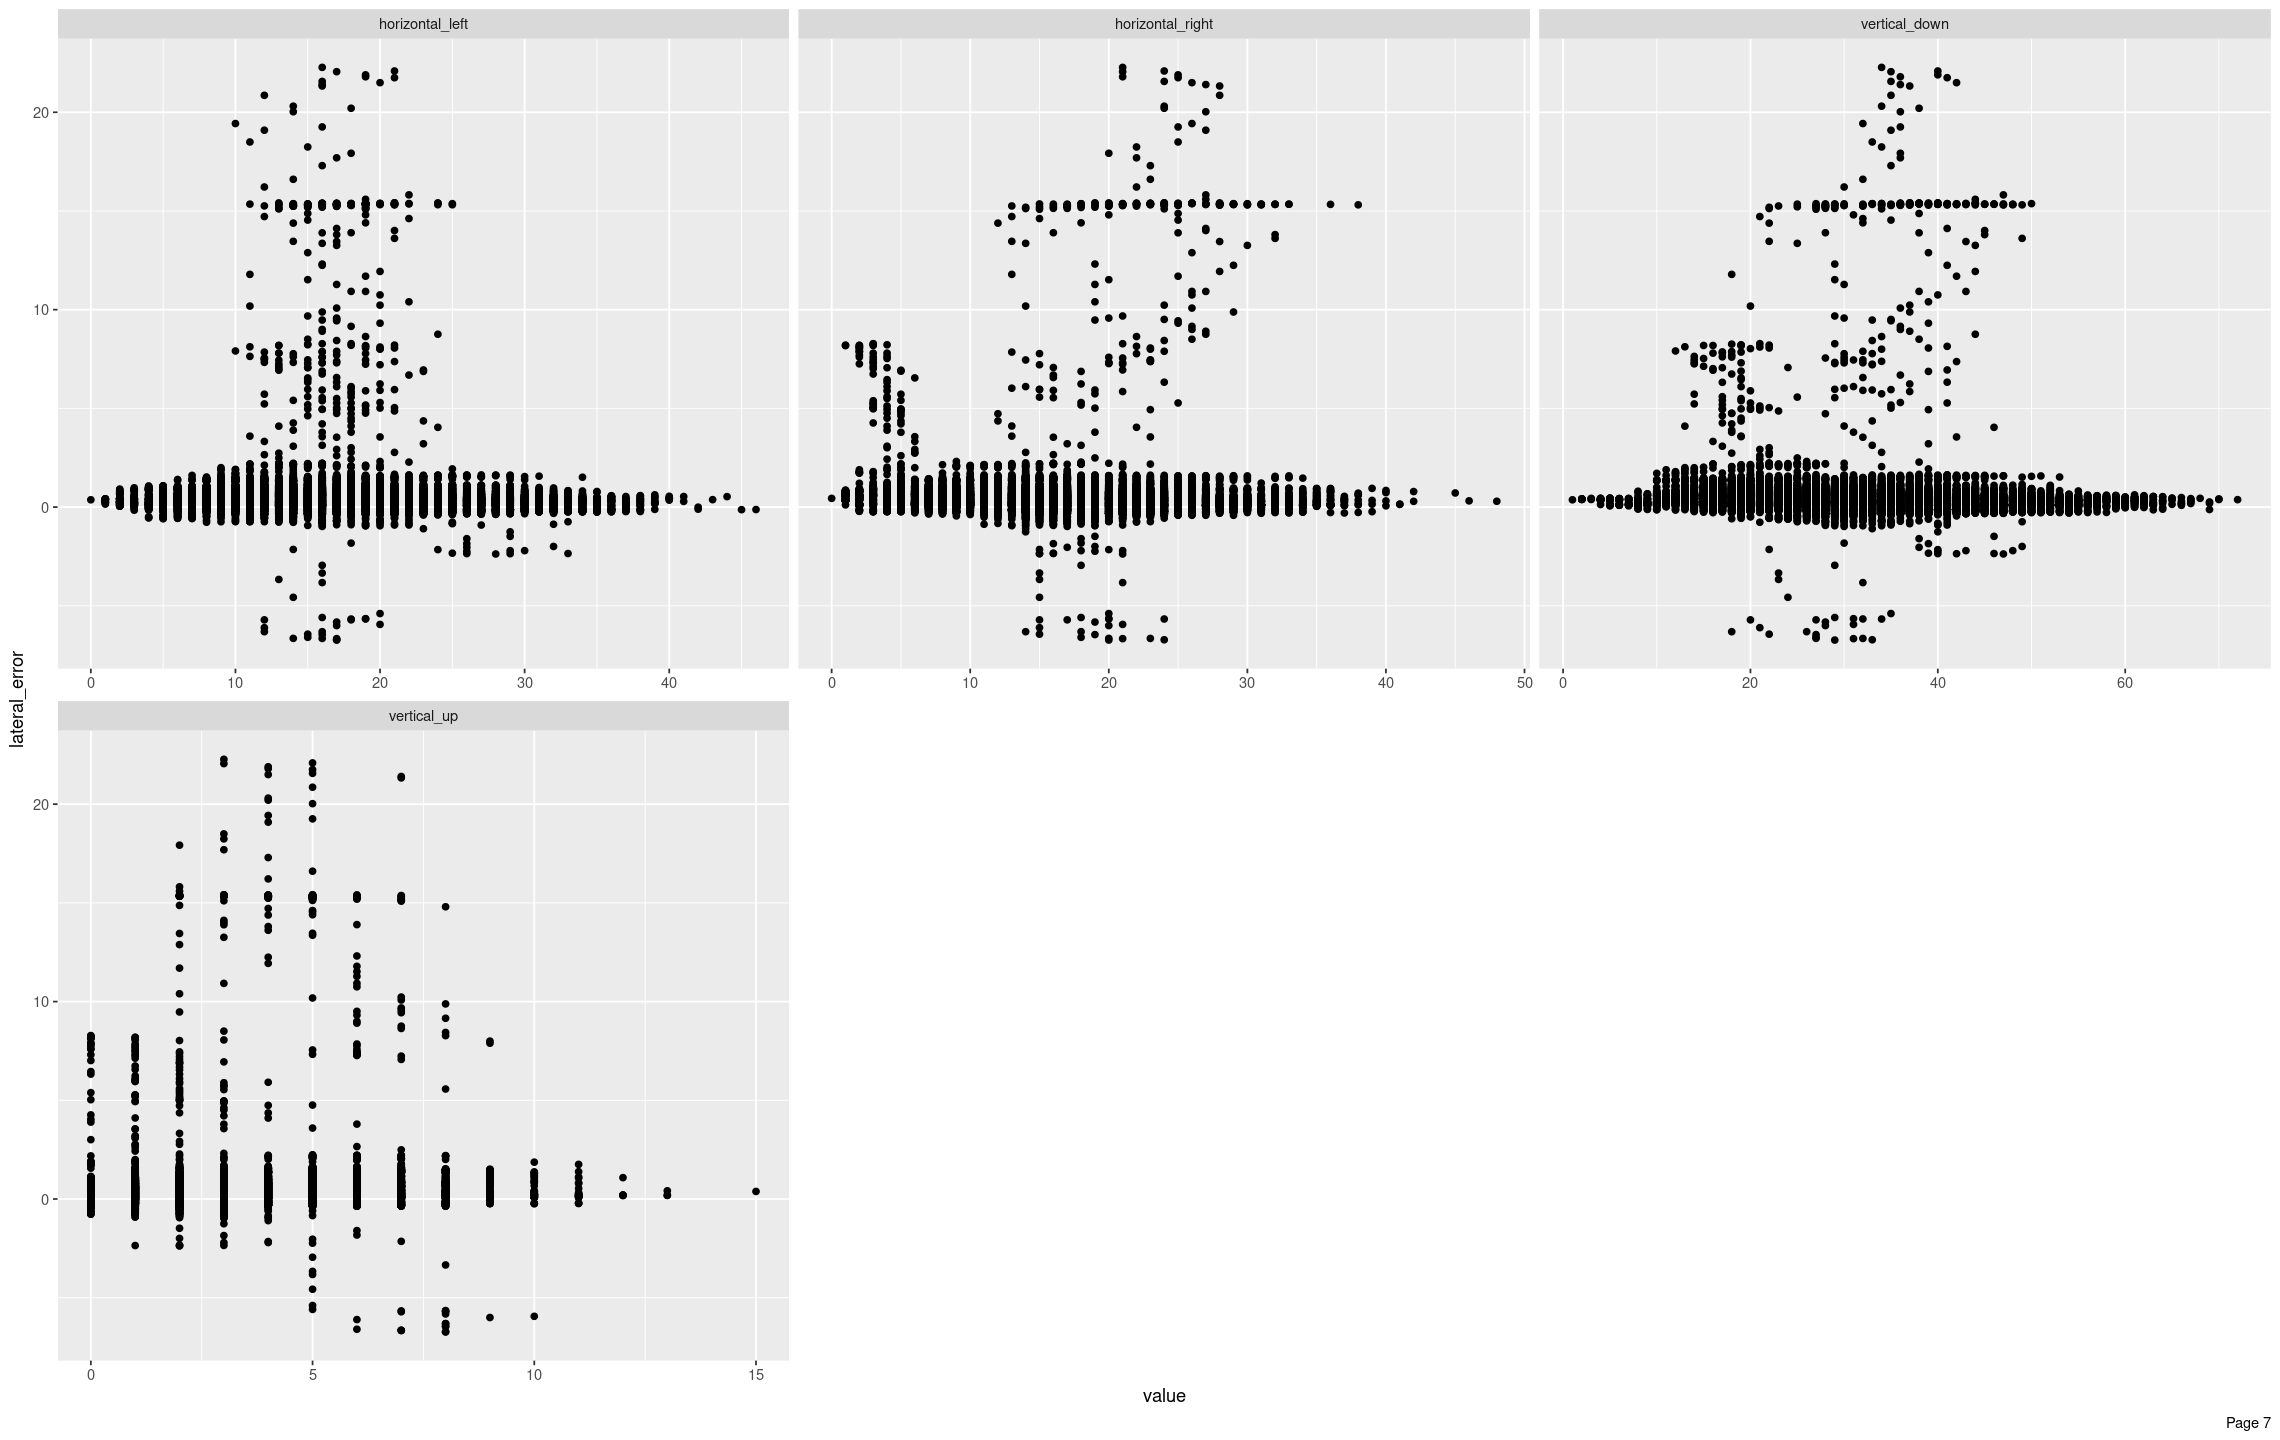

In [34]:
plot_scatterplot(na.omit(data), by="lateral_error")

## longitudinal_error

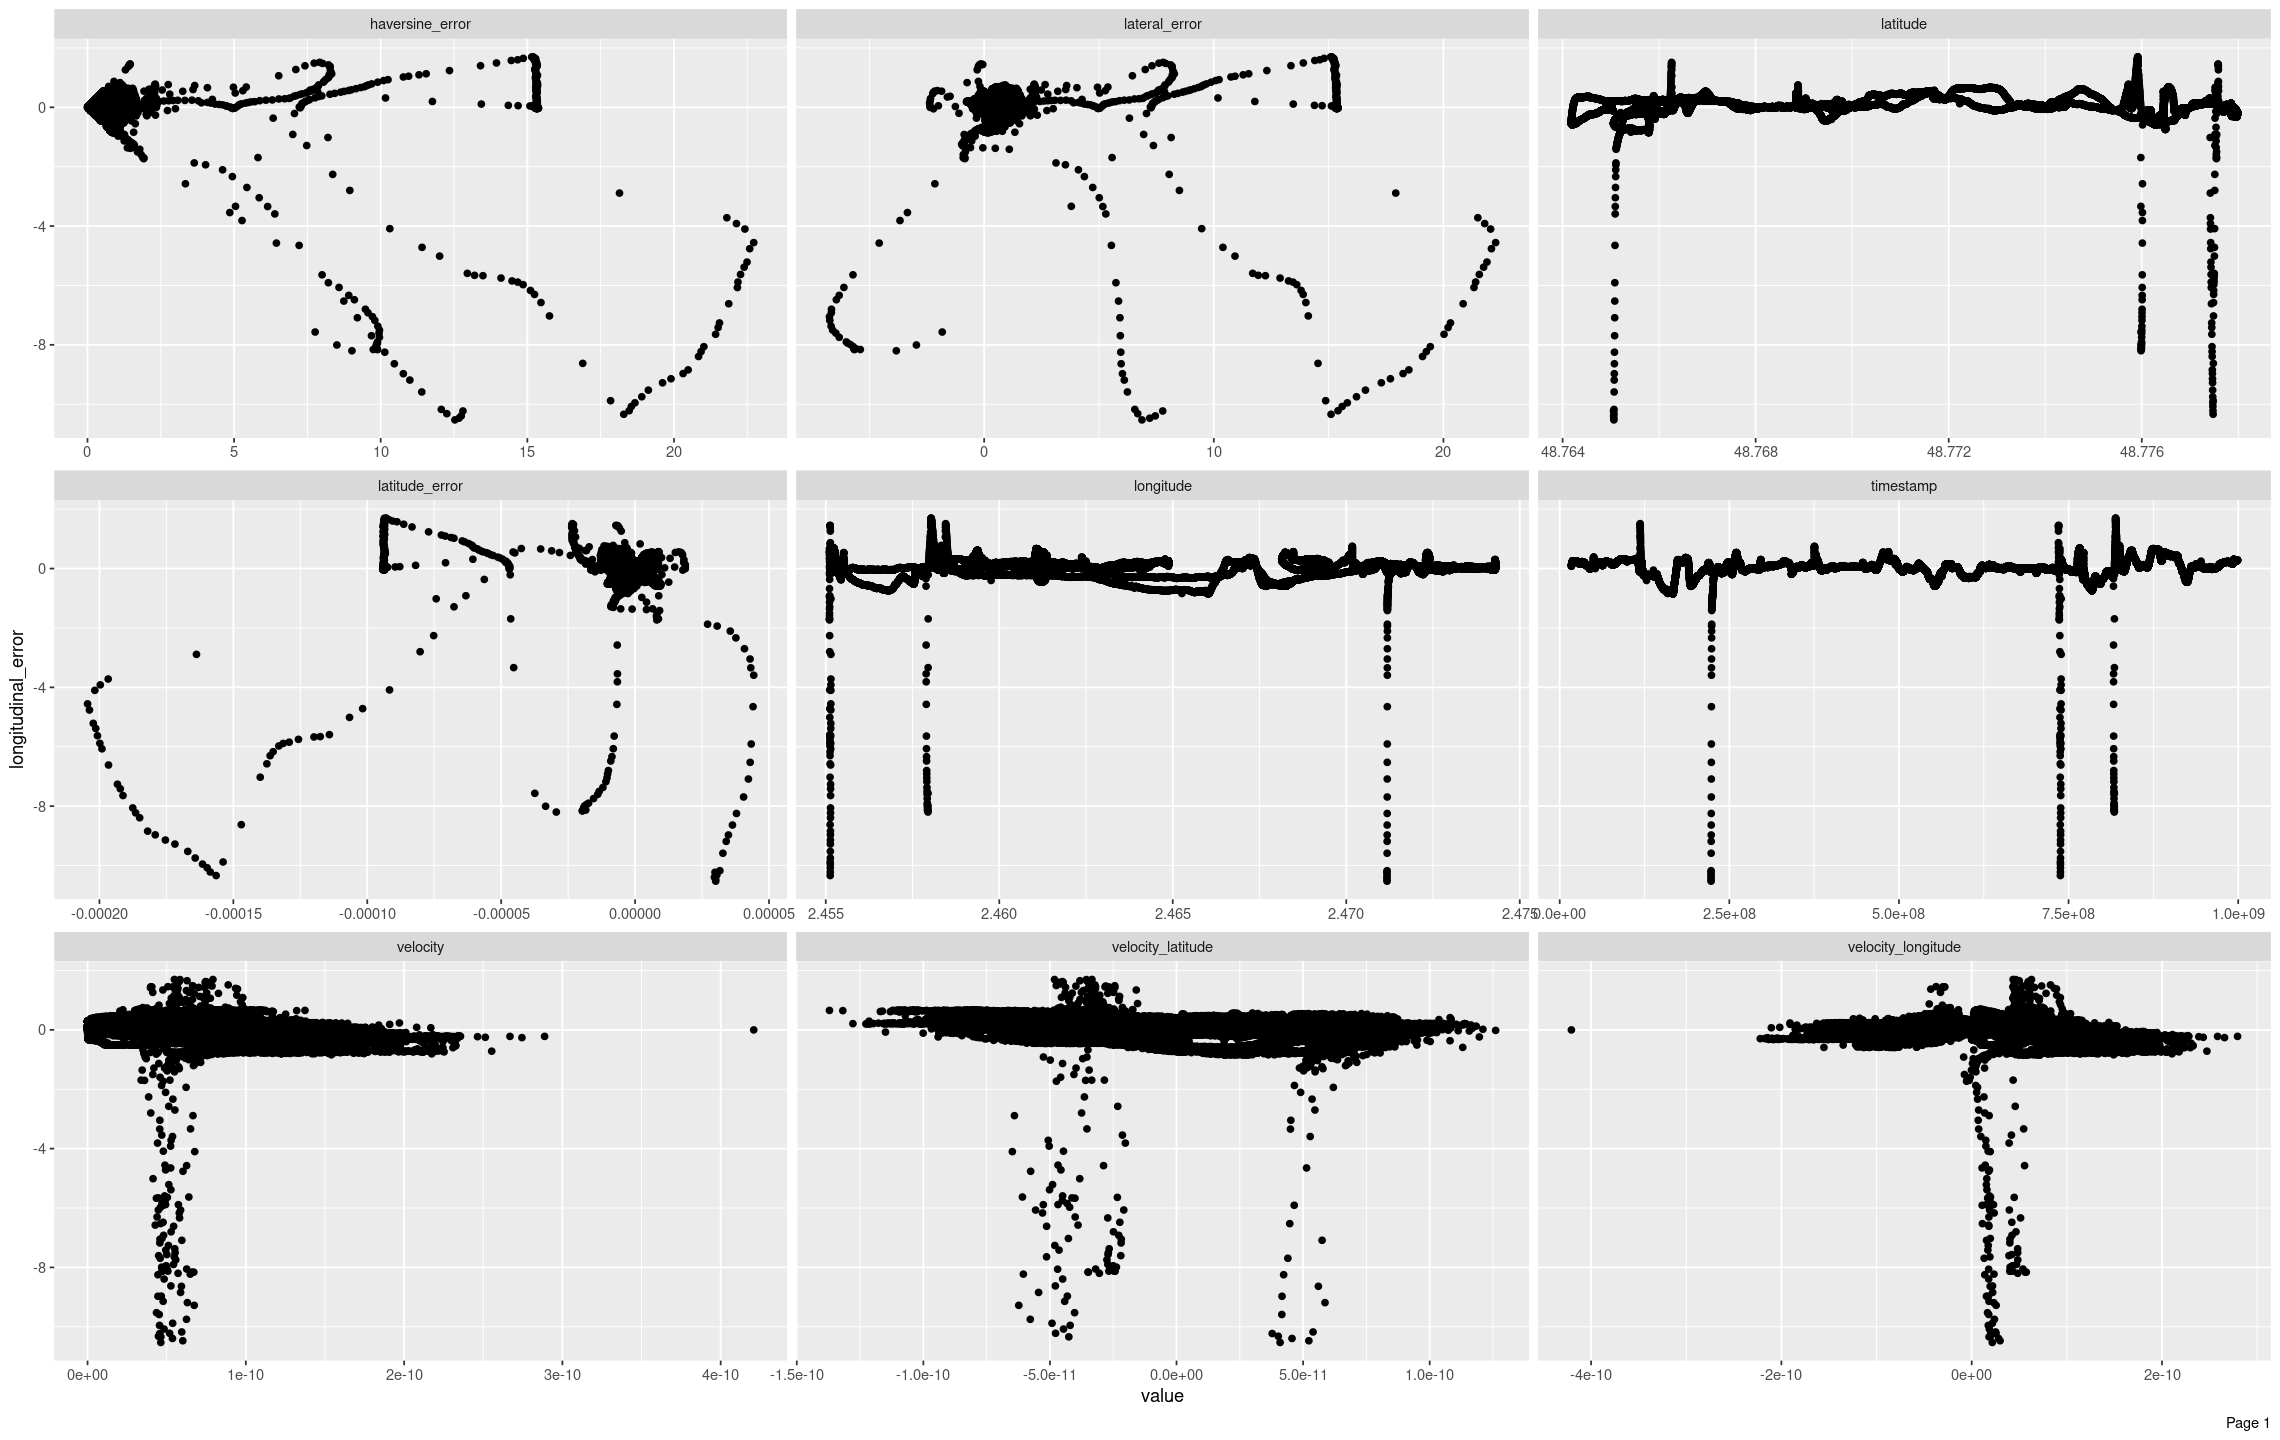

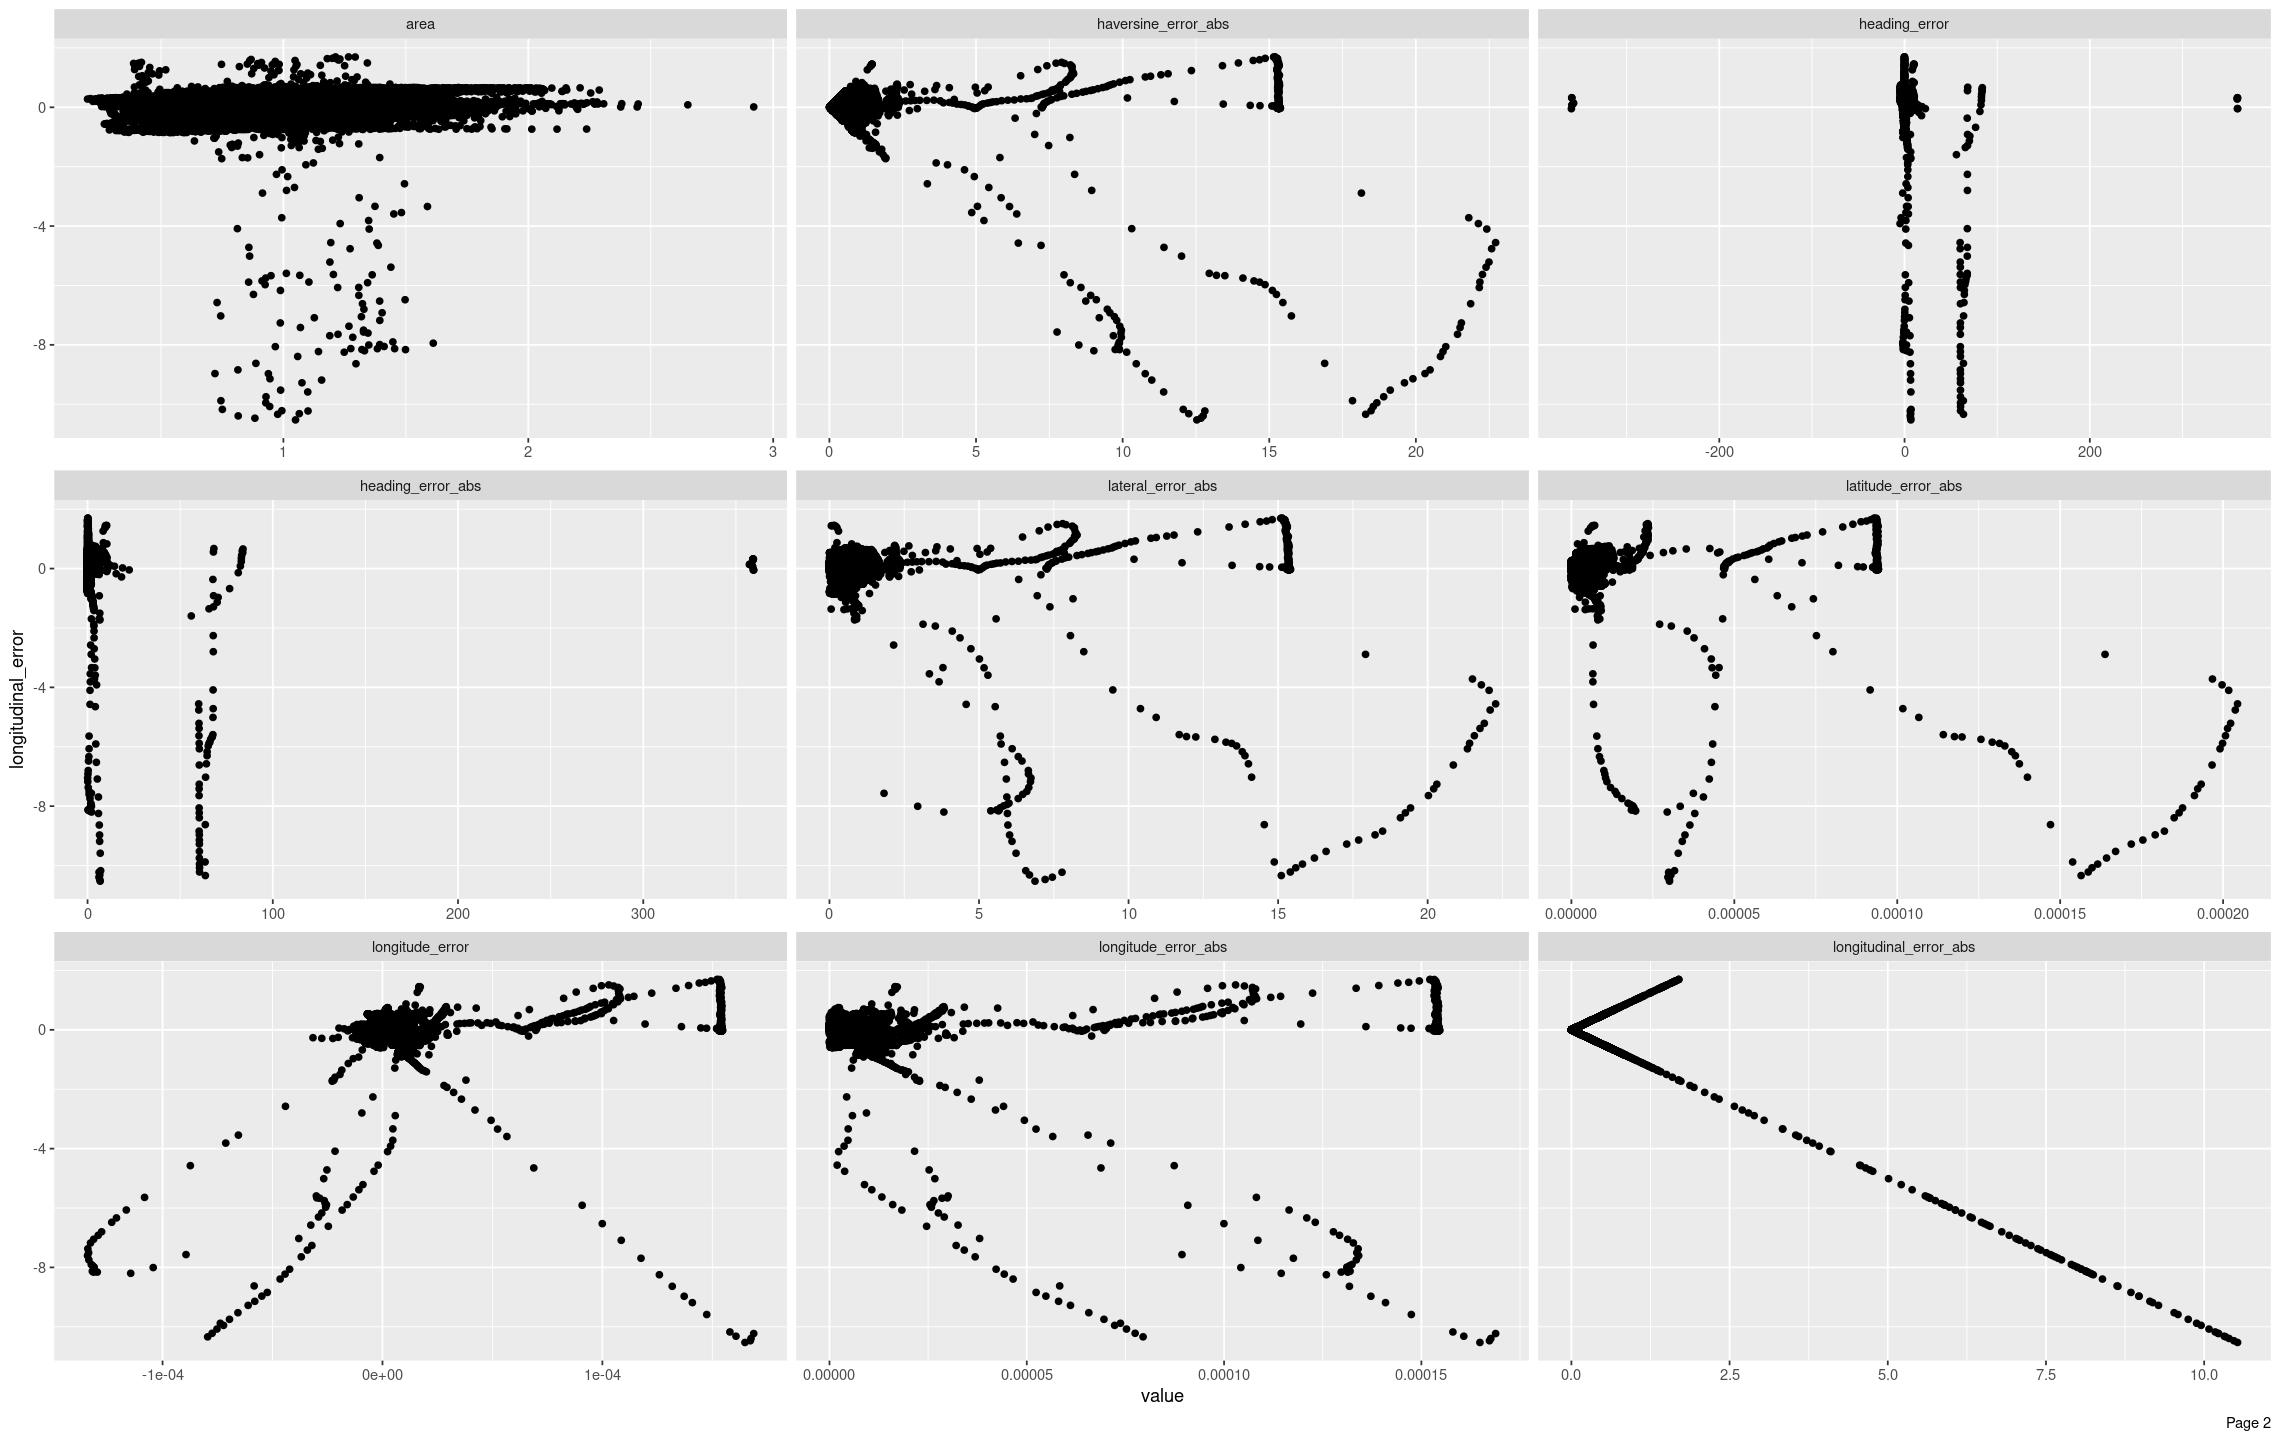

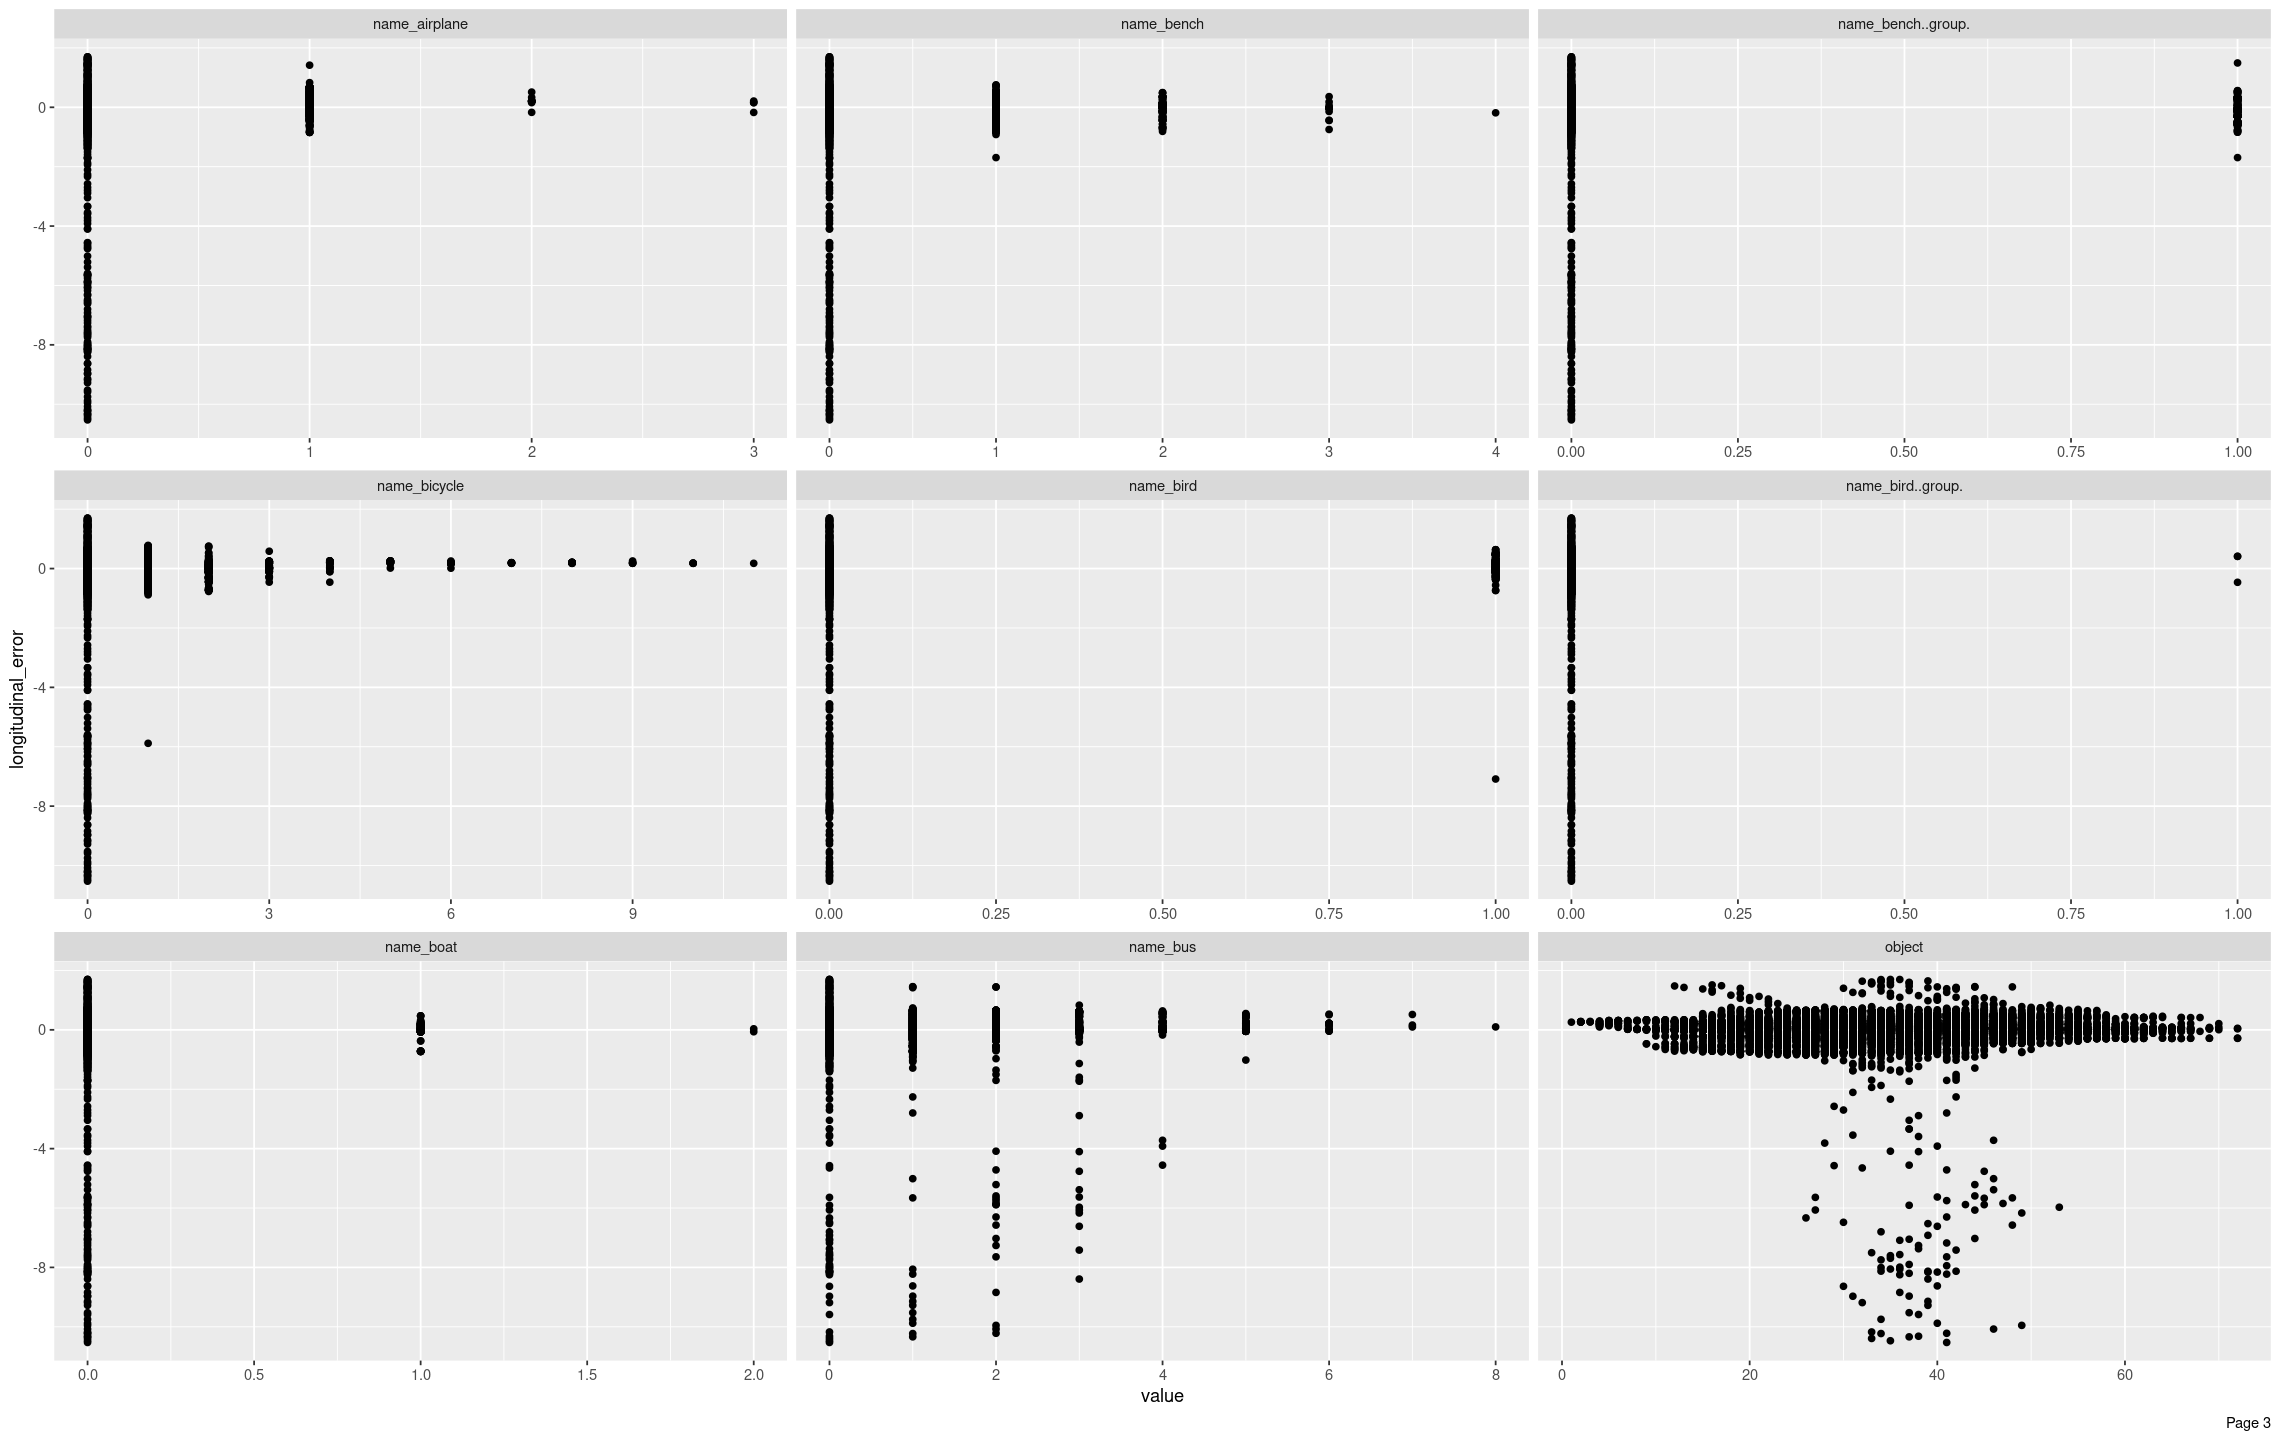

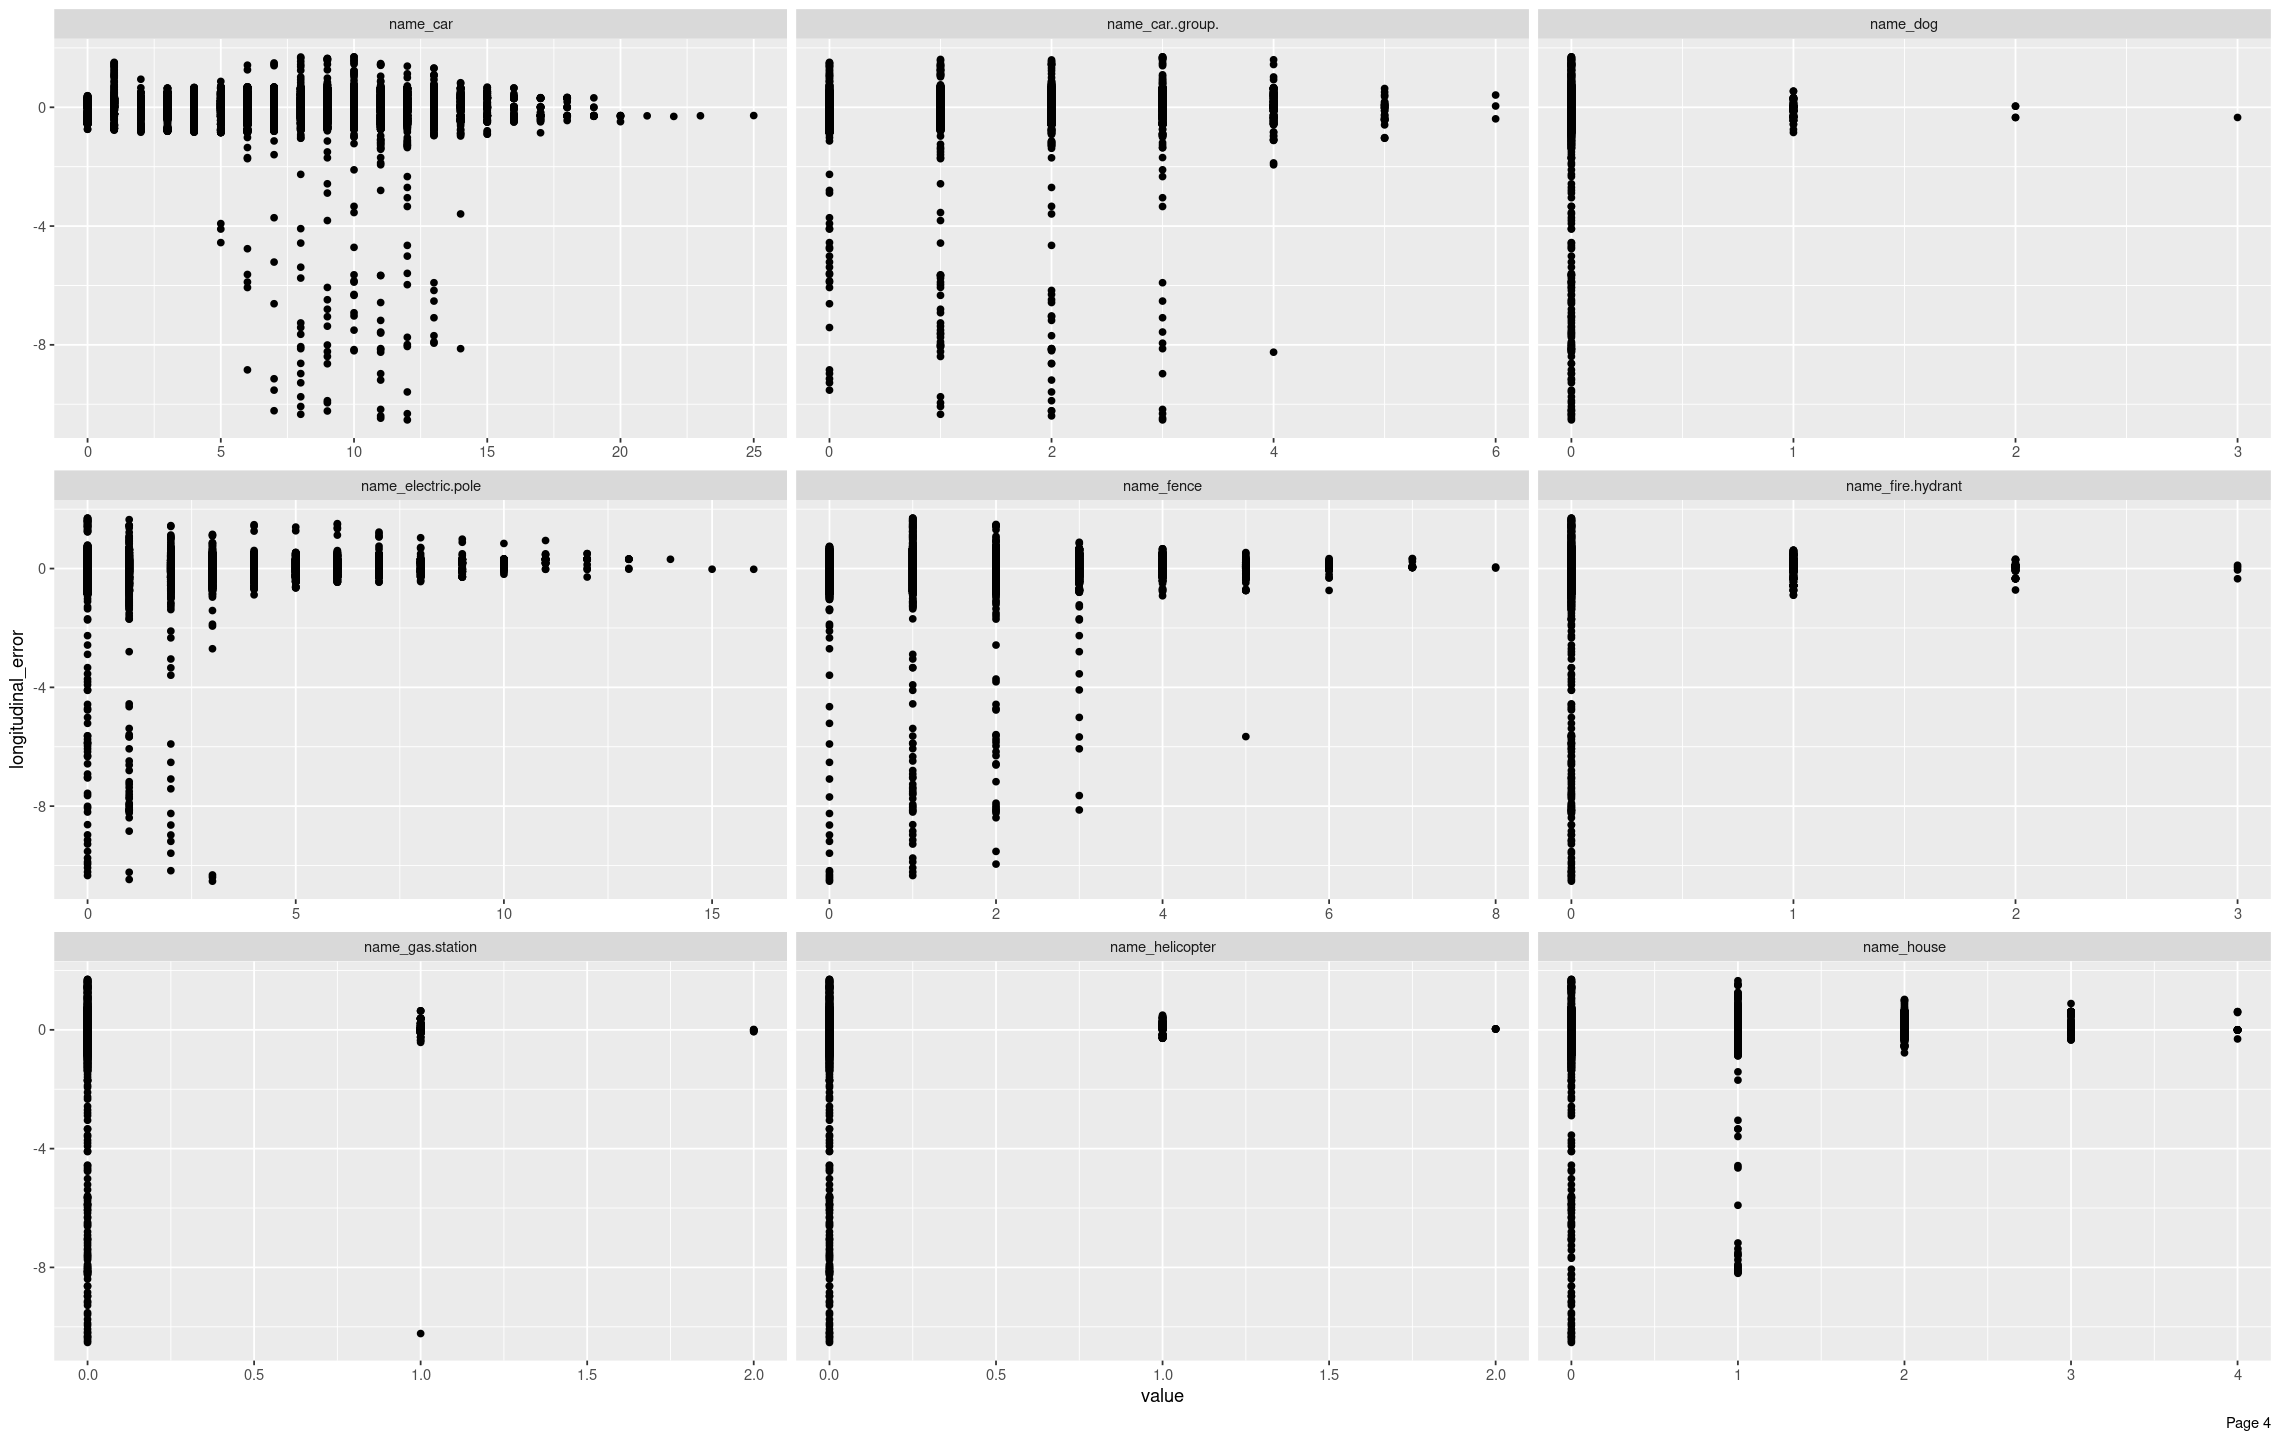

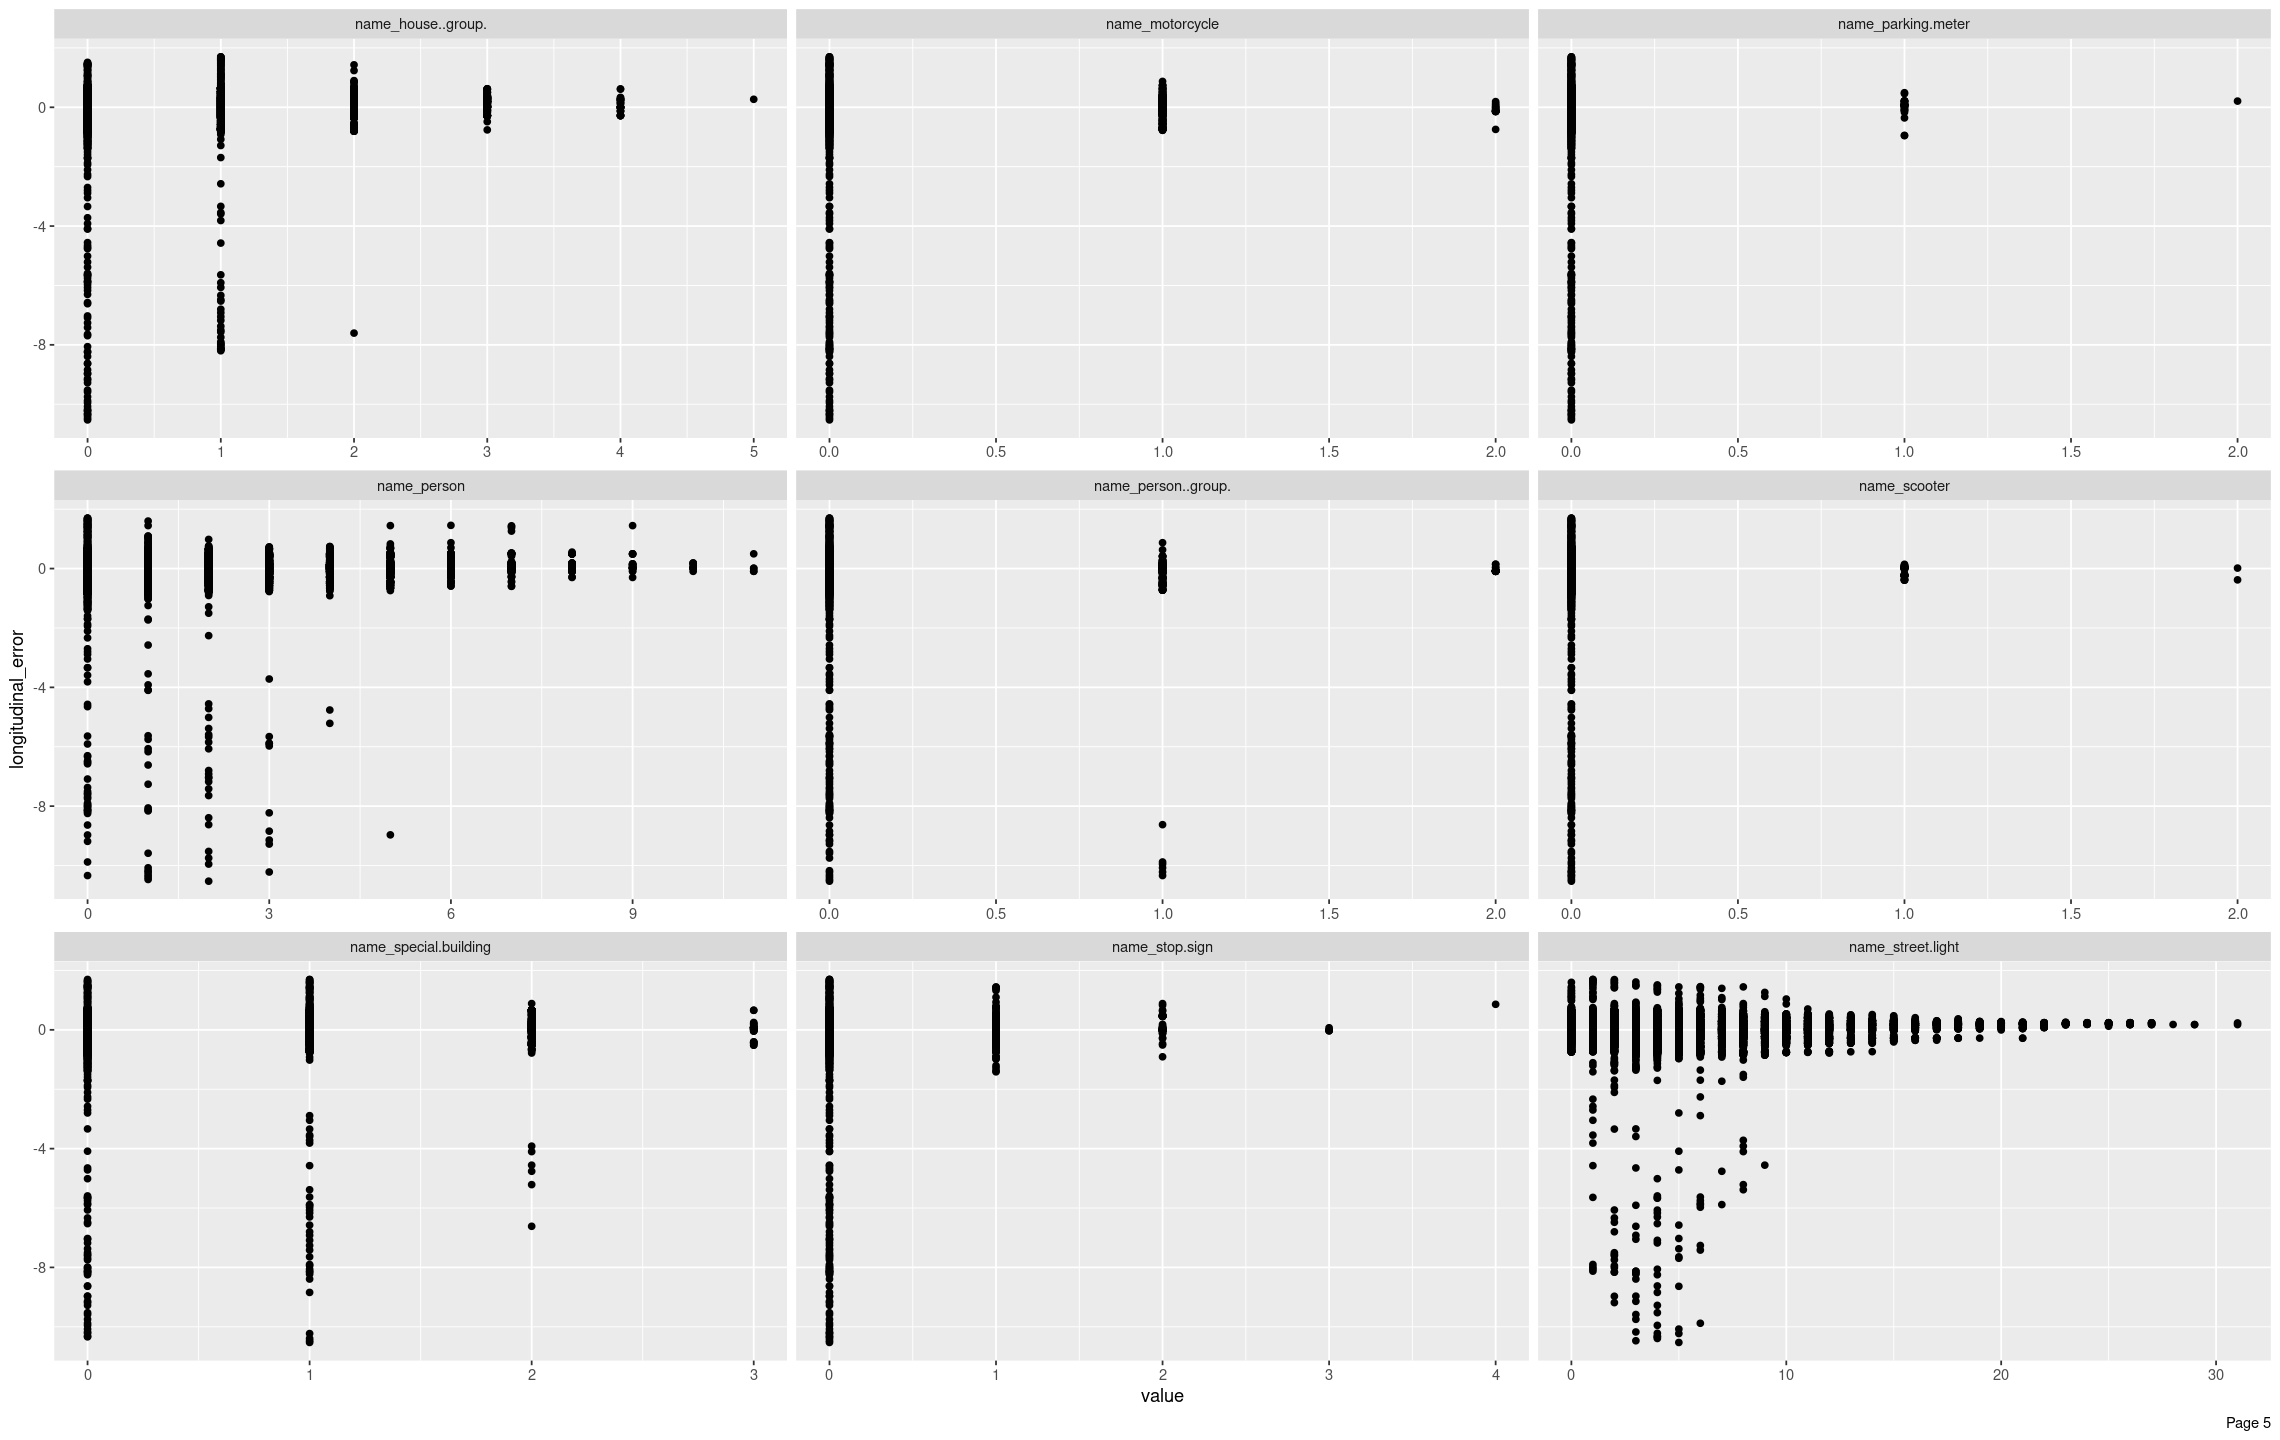

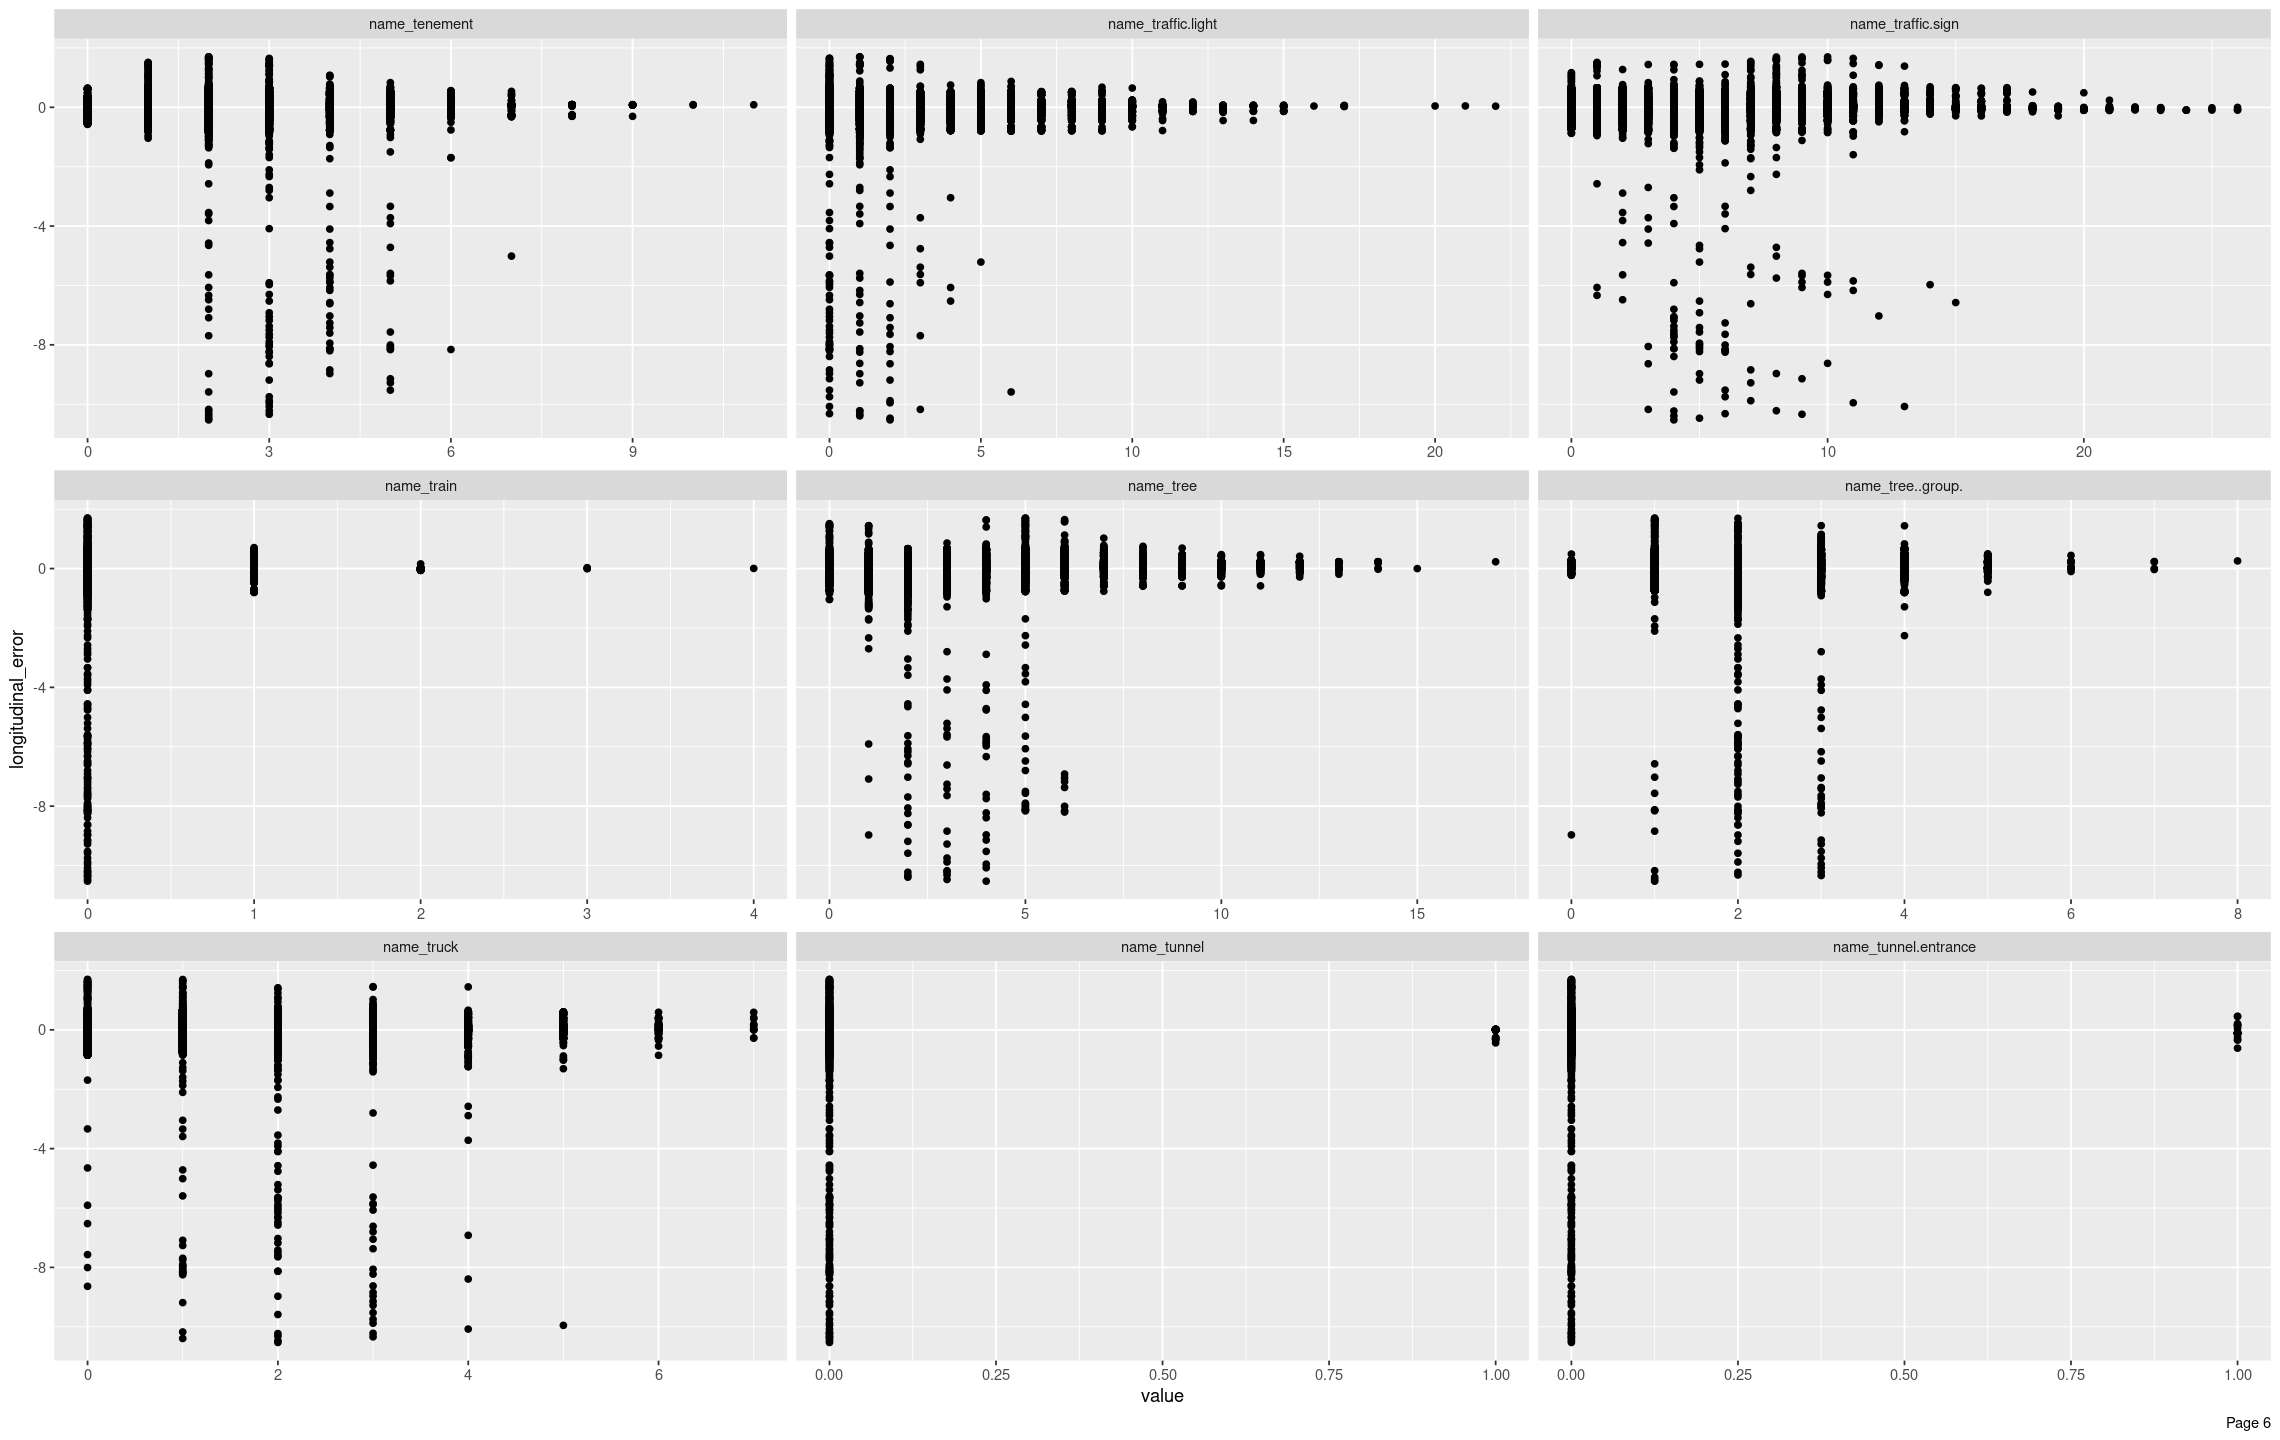

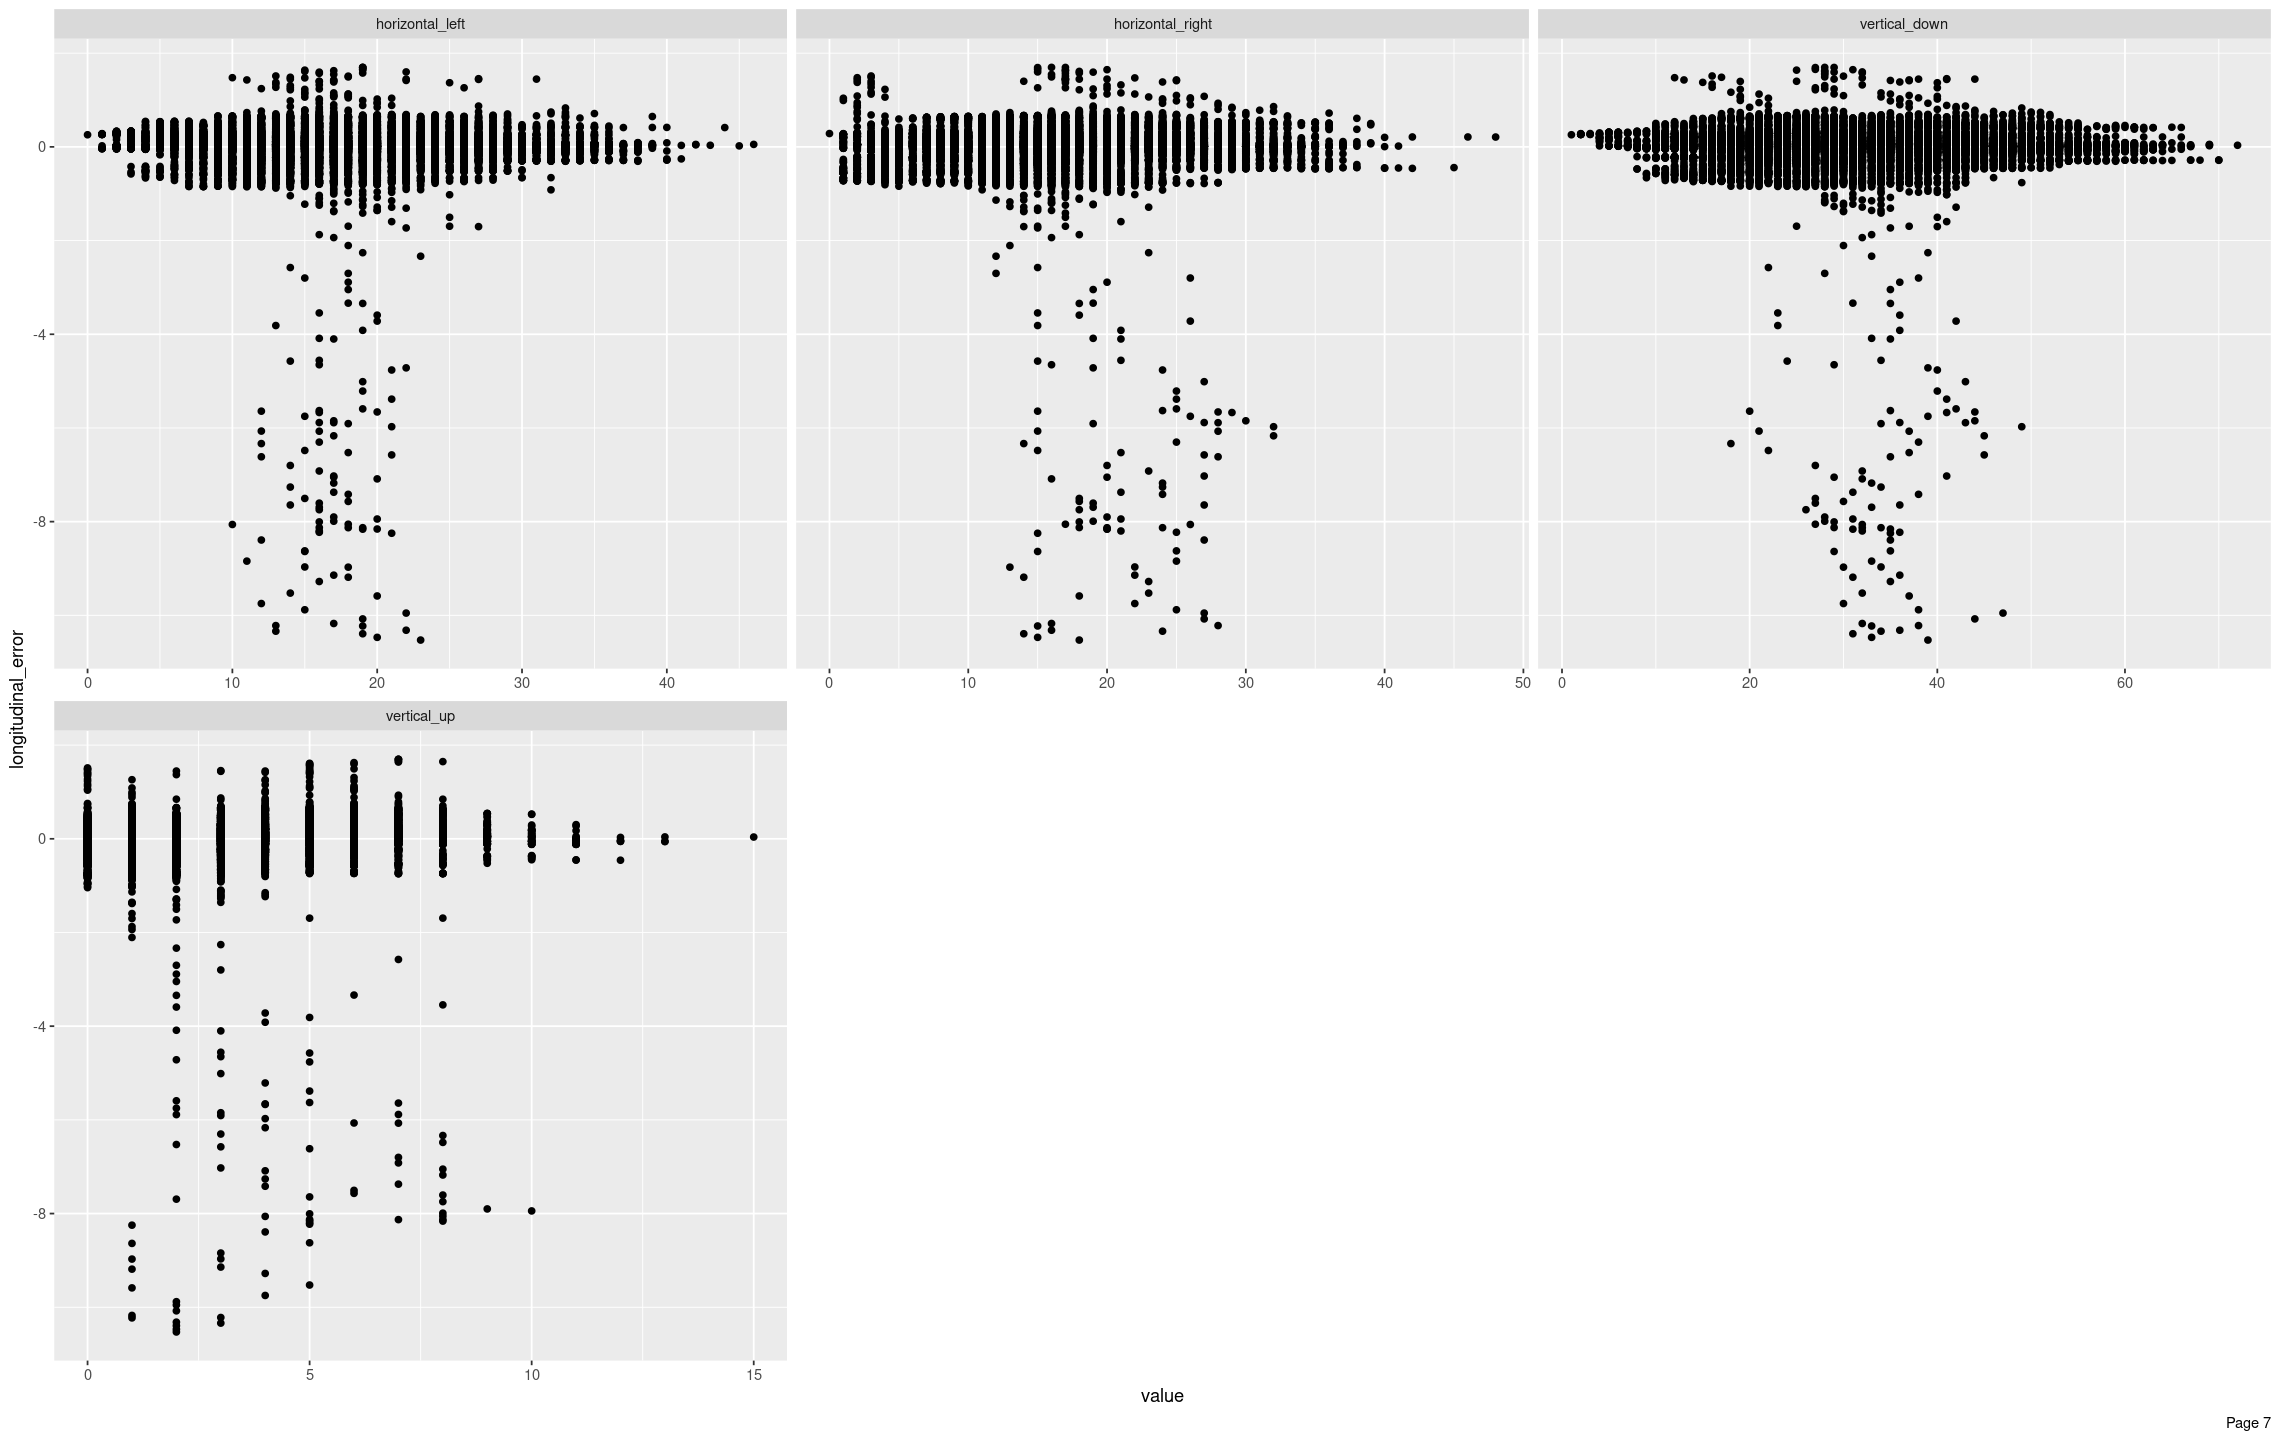

In [35]:
plot_scatterplot(na.omit(data), by="longitudinal_error")

# Scatter plot 3D

## lateral_error

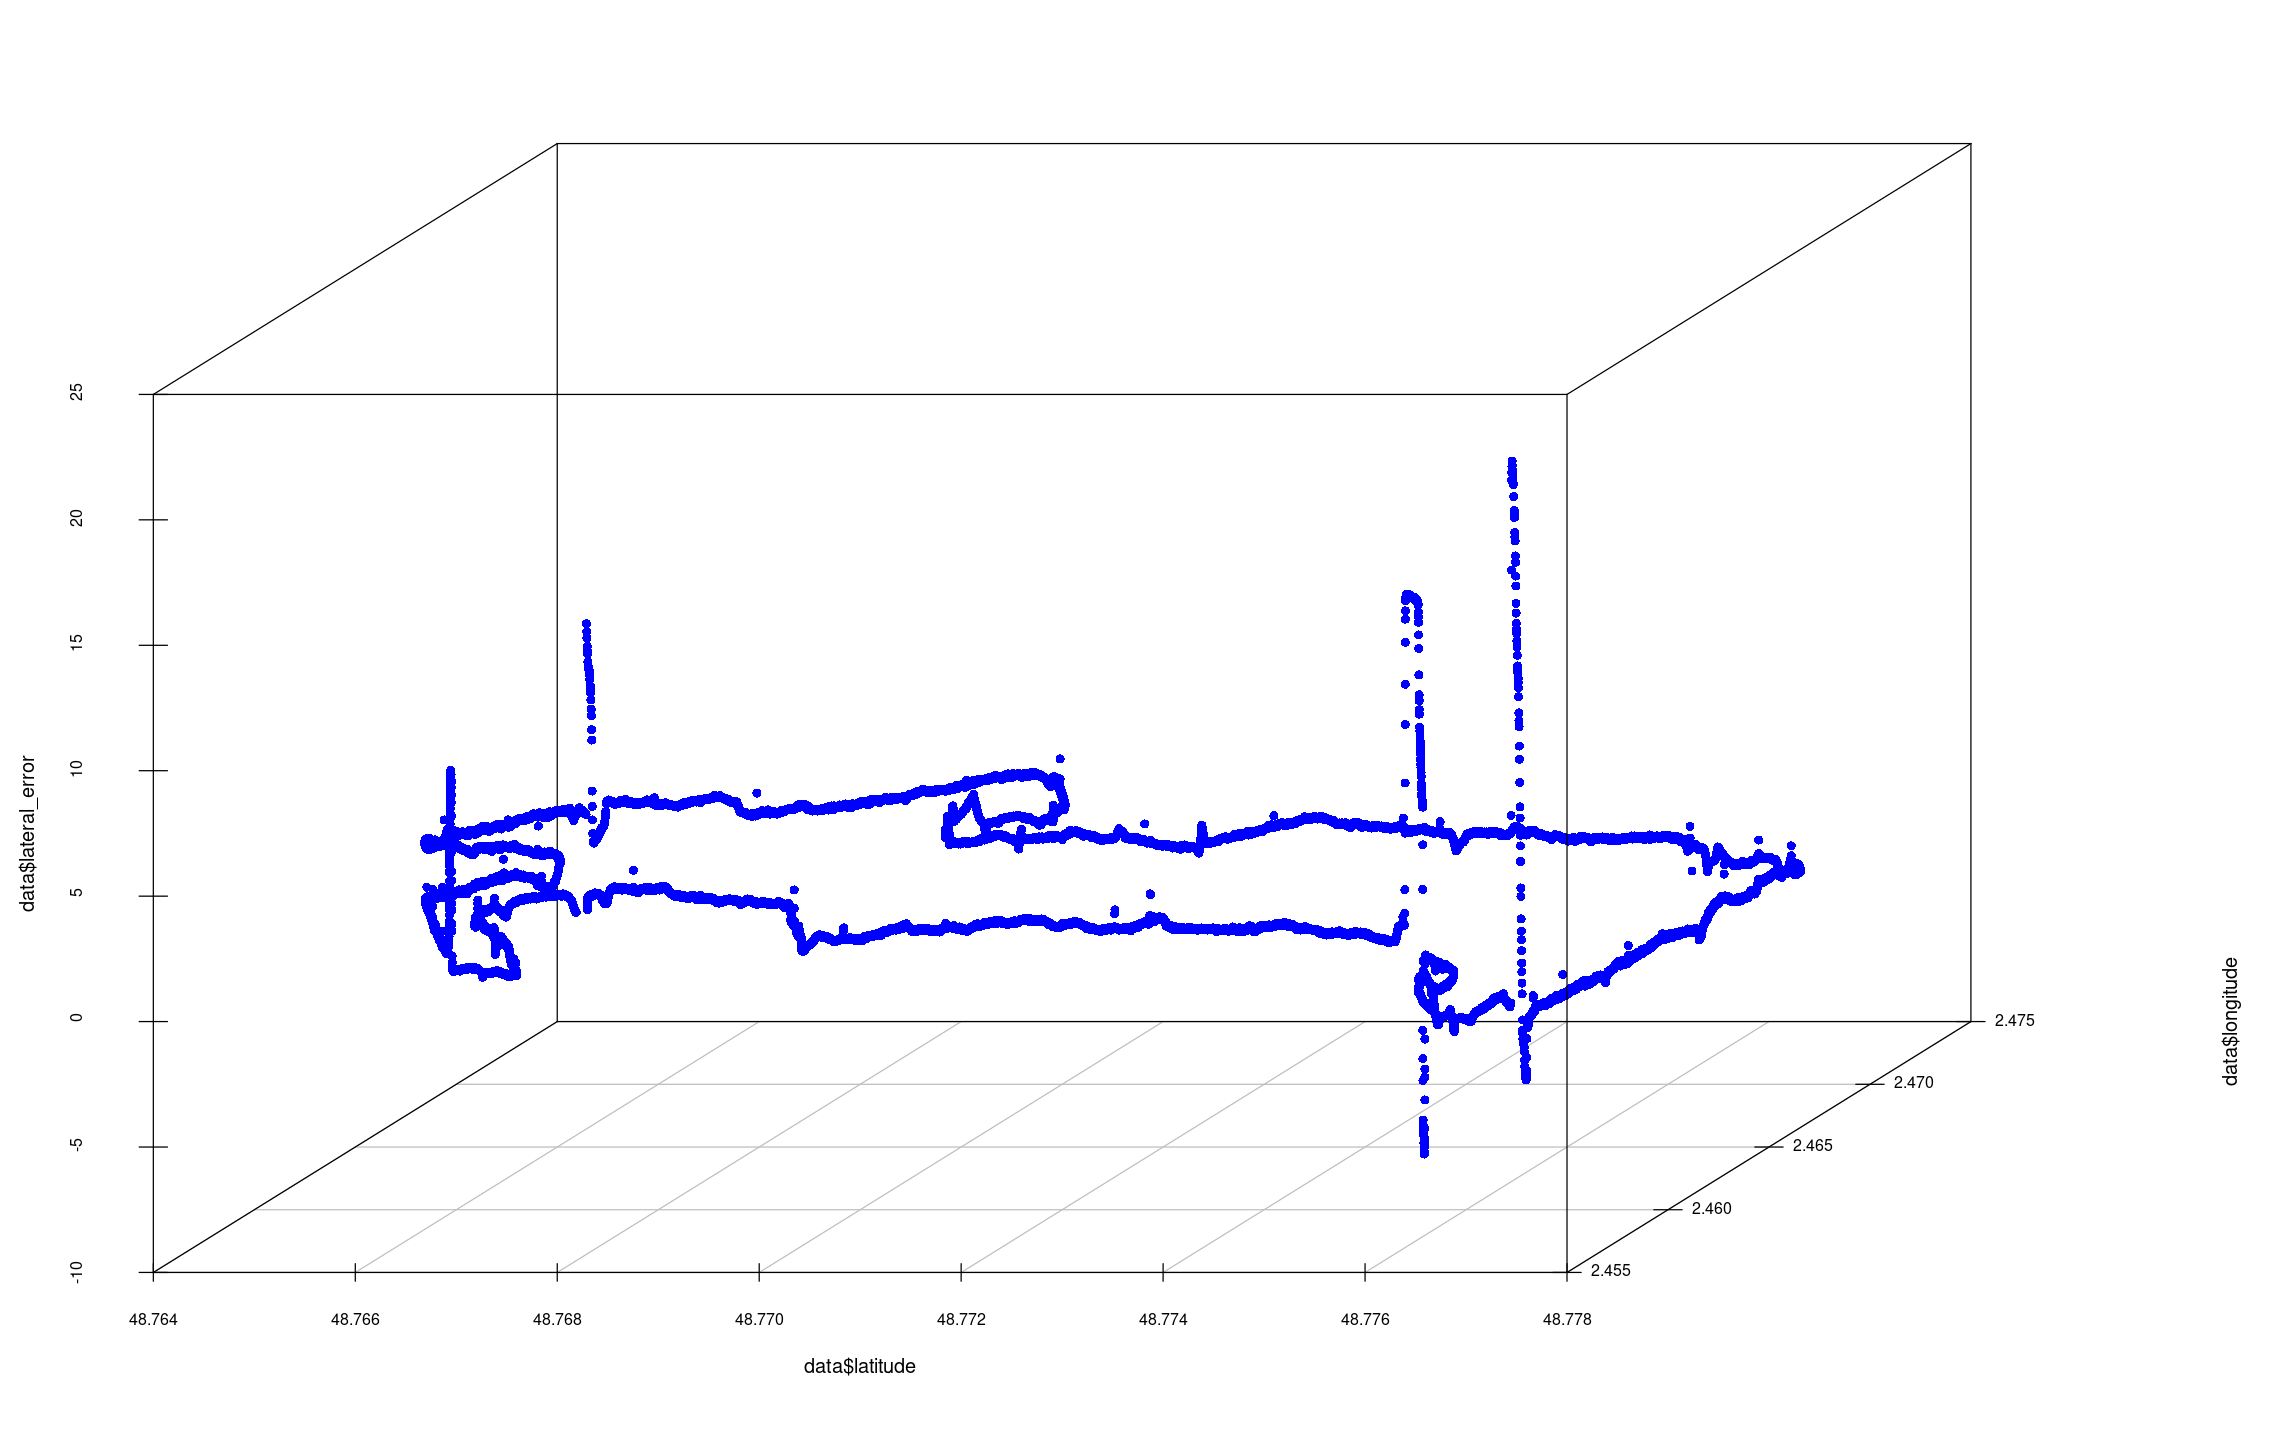

In [36]:
scatterplot3d(x = data$latitude, 
              y = data$longitude, 
              z = data$lateral_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

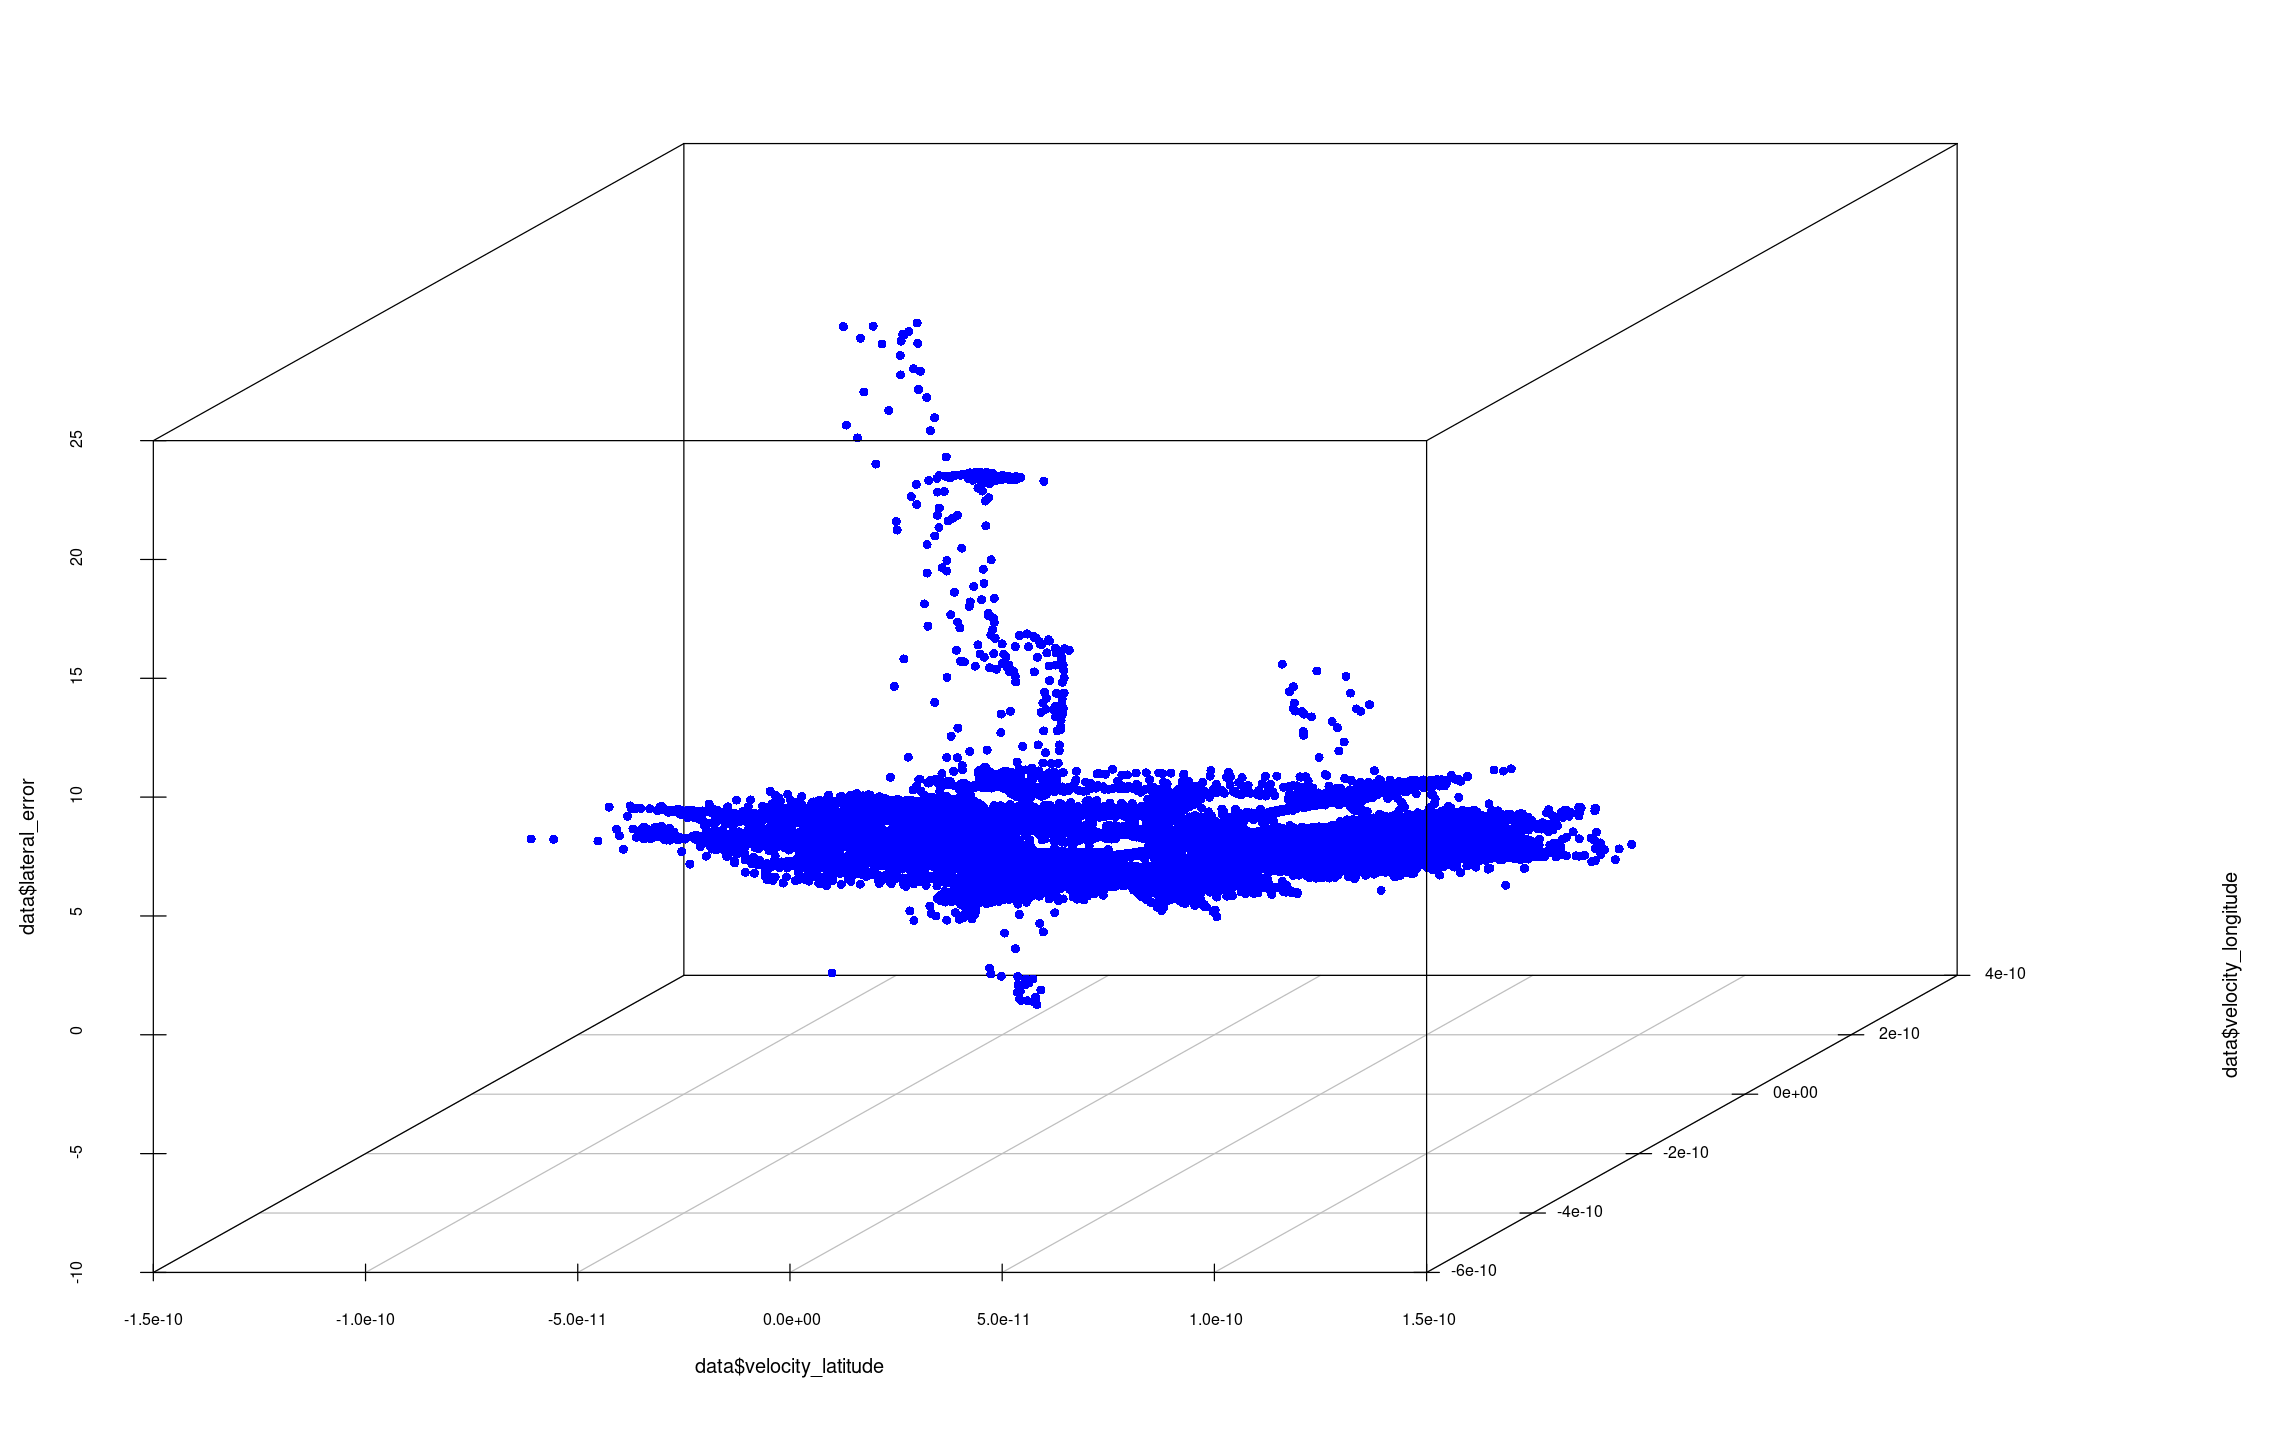

In [37]:
scatterplot3d(x = data$velocity_latitude, 
              y = data$velocity_longitude, 
              z = data$lateral_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

## longitudinal_error

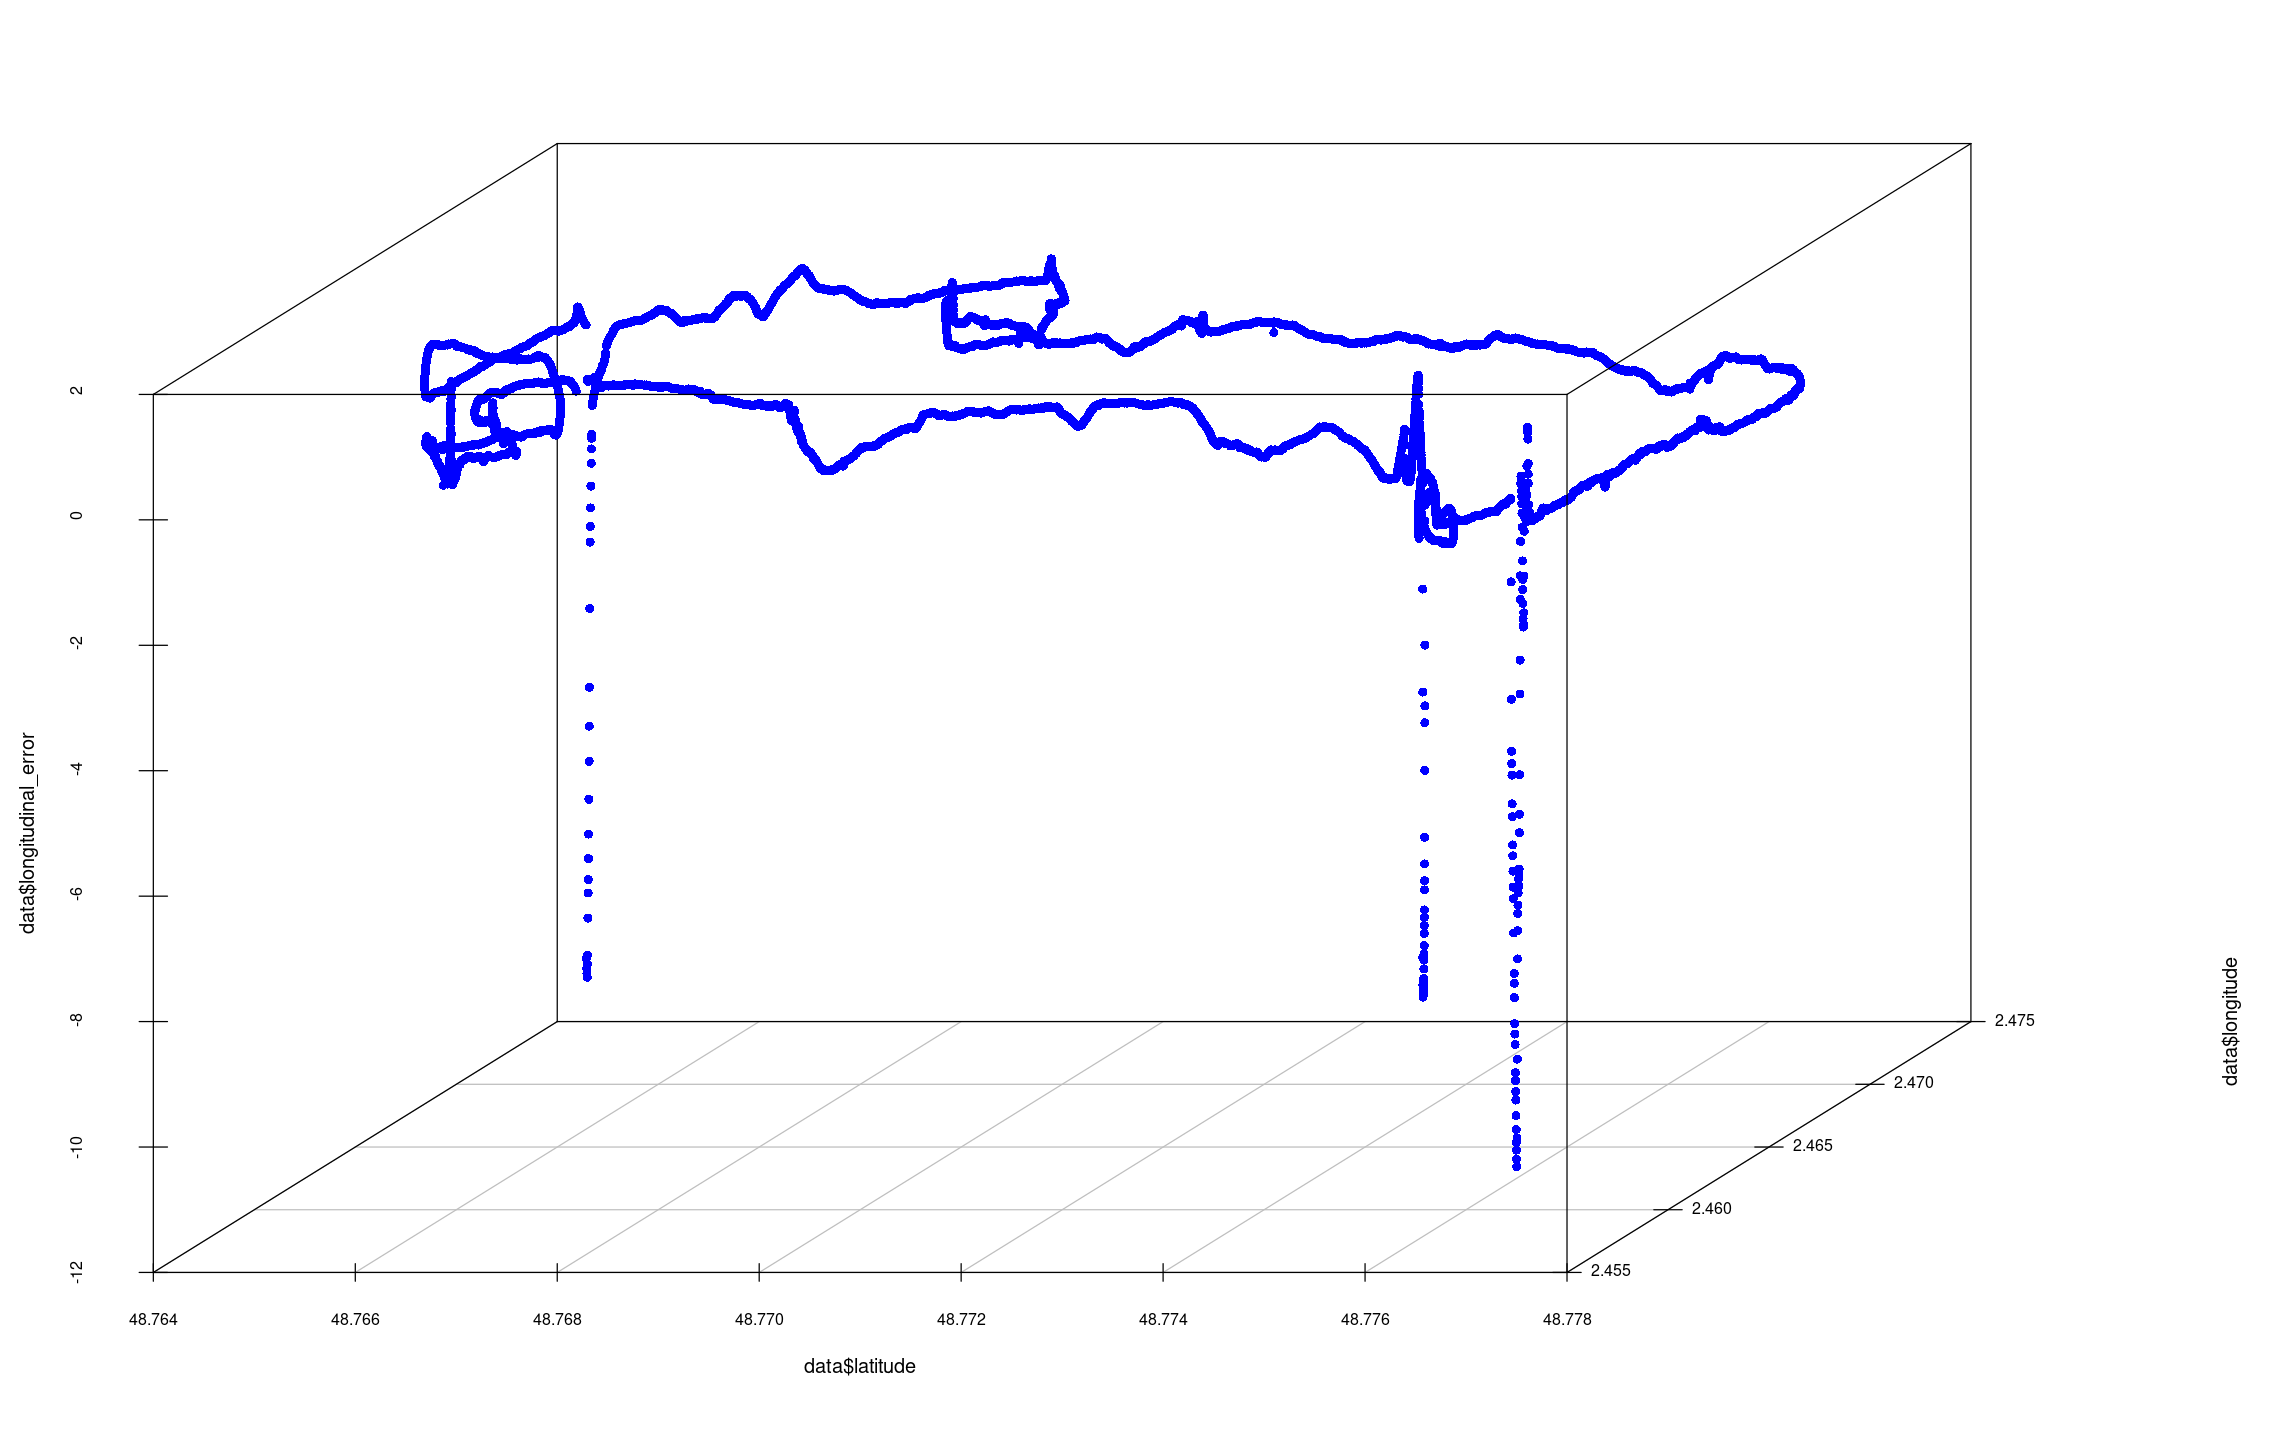

In [38]:
scatterplot3d(x = data$latitude, 
              y = data$longitude, 
              z = data$longitudinal_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

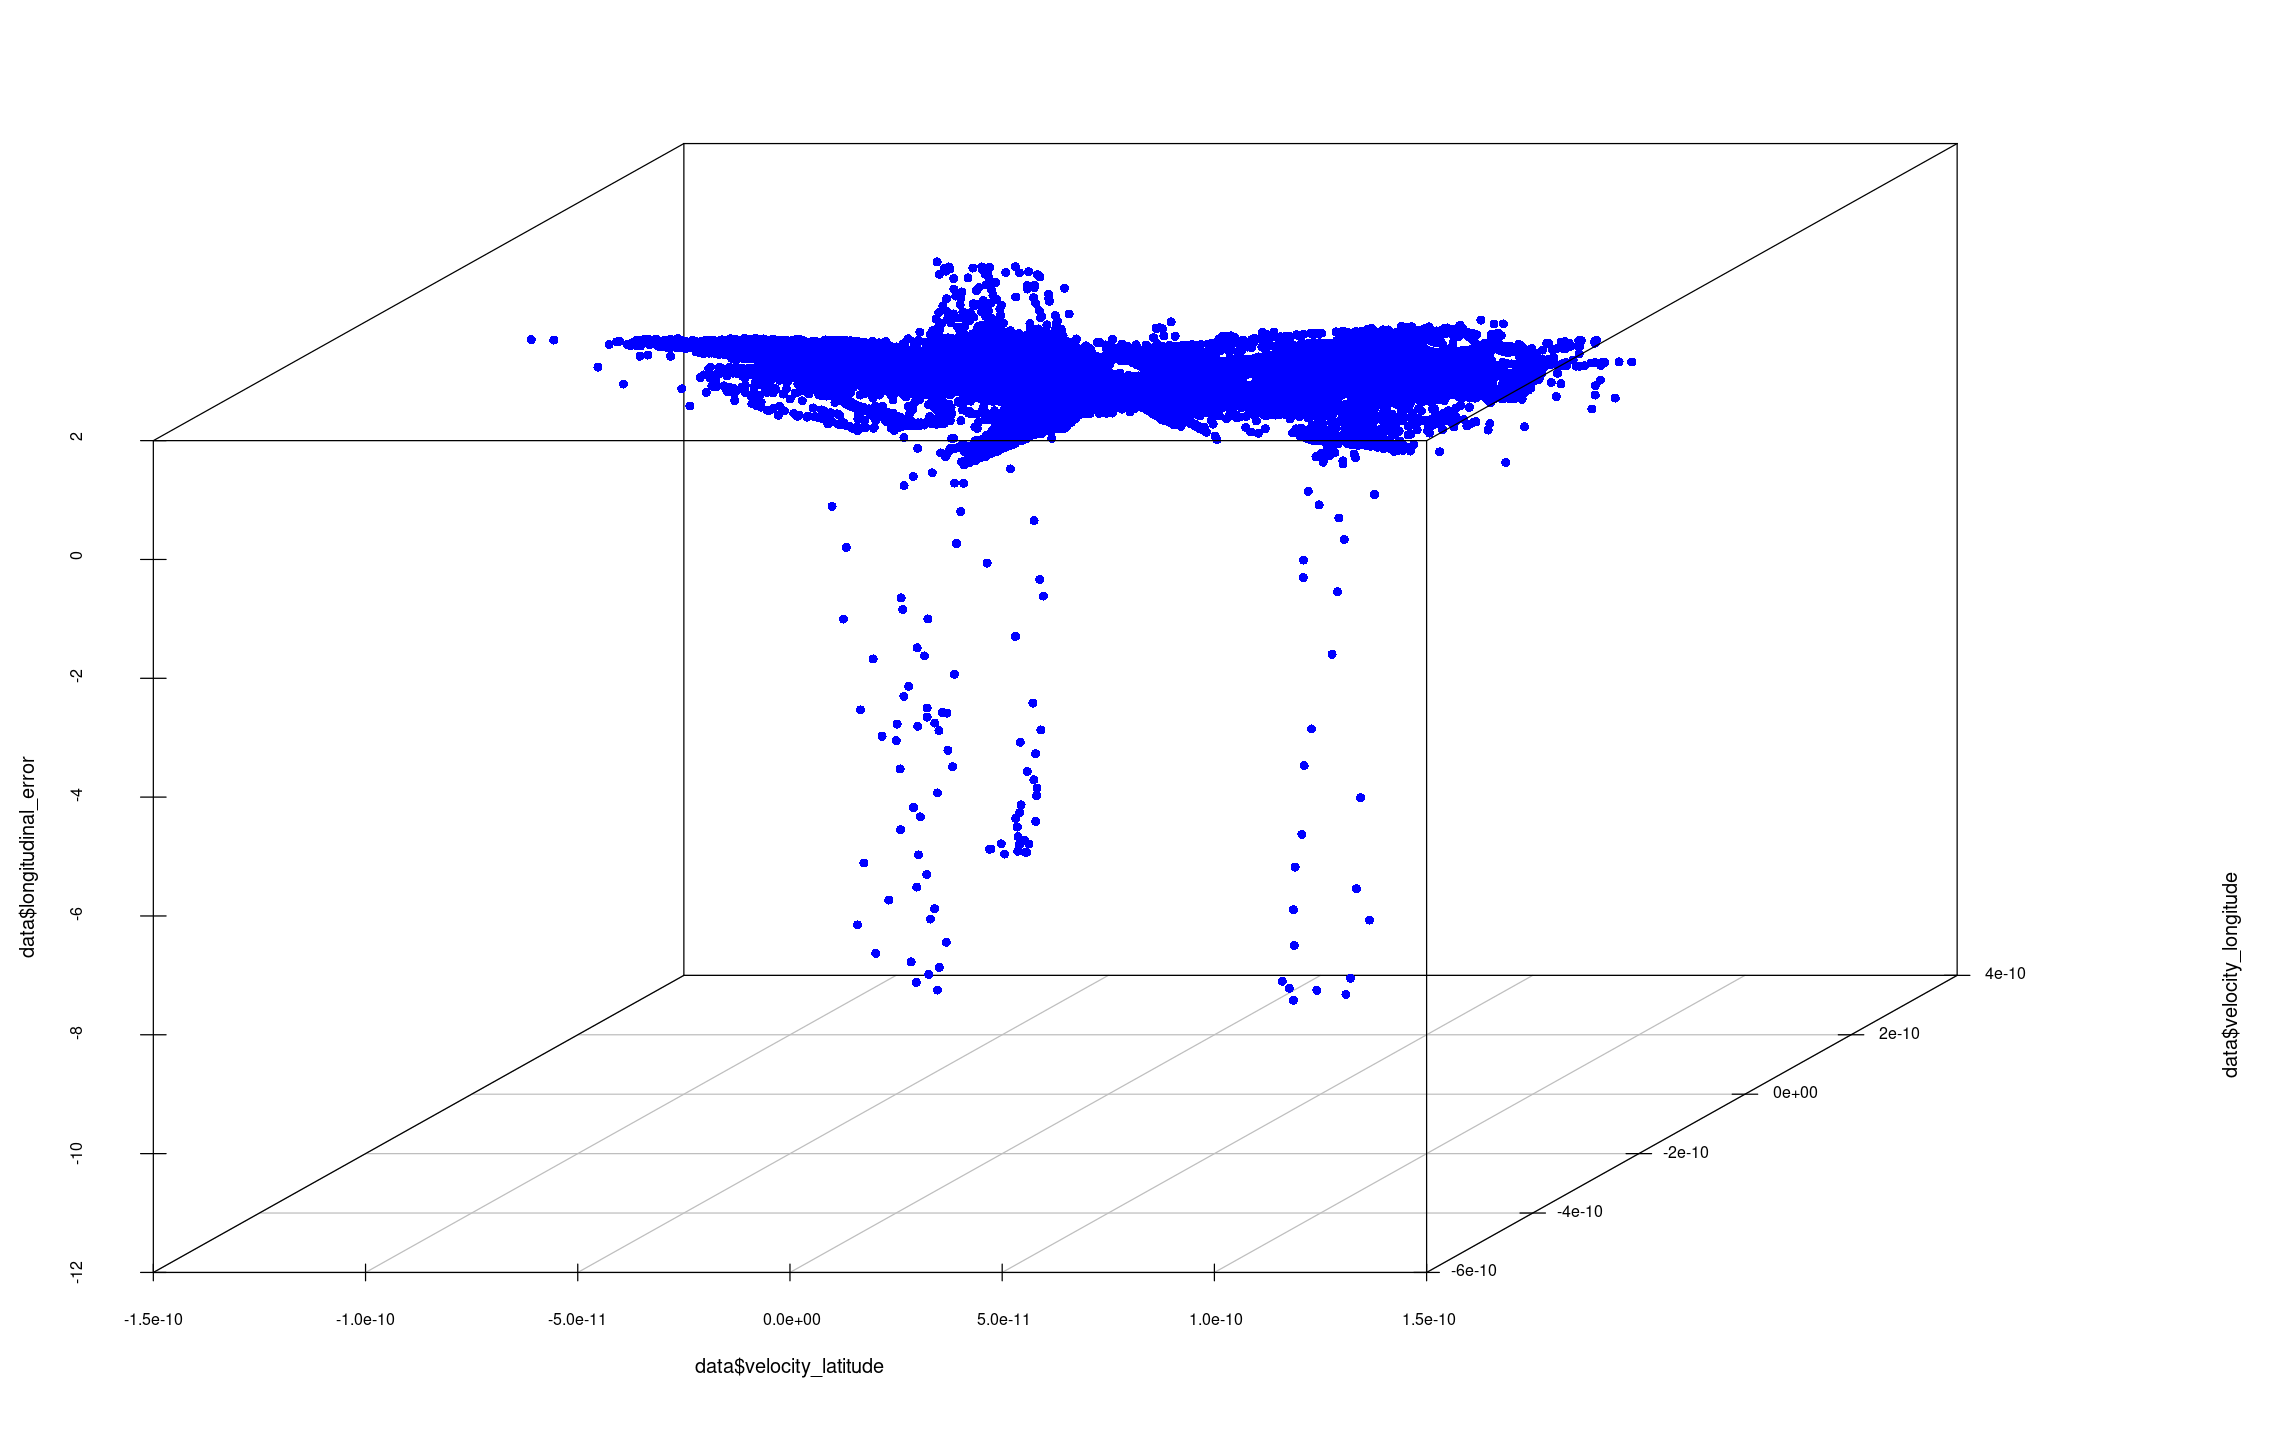

In [39]:
scatterplot3d(x = data$velocity_latitude, 
              y = data$velocity_longitude, 
              z = data$longitudinal_error, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

# Driving trajectory

In [ ]:
data_bis <- data %>% select(c(latitude, longitude))

plot(y = data_bis$latitude, 
     x = data_bis$longitude,
     main = "driving trajectory",
     type = "l",
     col = 4,
     lwd = 2)

points(y = data_bis$latitude[1],
       x = data_bis$longitude[1],
       pch = 19,
       col = 3,
       lwd = 2)

n <- nrow(data_bis)

points(y = data_bis$latitude[n],
       x = data_bis$longitude[n],
       pch = 19,
       col = 2,
       lwd = 2)